In [1]:
import matplotlib
matplotlib.use('Agg')

import numpy as np
import collections
from os.path import expanduser
from tqdm import tqdm
import csv

from scipy.stats import sem
from scipy.stats import pearsonr

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.style.use('deepretina')

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/home/lane/.local/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/lane/.local/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/home/lane/.local/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/style/core.py:53: UserWarning: Style includes a parameter, 'interactive', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))
/home/lane/.local/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/style/core.py:53: UserWarning: Style includes a parameter, 'timezone', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


In [2]:
data_path = expanduser('~/data/katie/')
control_name = '010917_control_normalized.csv'
experimental_name = '010917_experimental_normalized.csv'

In [3]:
# control_list = []
# with open(data_path + control_name, 'rb') as controlfile:
#     control_reader = csv.reader(controlfile)
#     for row in control_reader:
#         control_list.append(row)

In [6]:
controlfile = open(data_path + control_name, 'r')
control_reader = csv.reader(controlfile)

In [7]:
control_list = collections.defaultdict(list)
labels = []
for idl,line in enumerate(control_reader):
    if idl == 0:
        for l in line:
            labels.append(l)
    else:
        if line[0] != '':
            print(line[0])
            for idi,l in enumerate(line):
                if l == '':
                    control_list[labels[idi]].append(np.nan)
                elif idi > 0:
                    control_list[labels[idi]].append(float(l))
                elif idi == 0:
                    control_list[labels[idi]].append(l)

1
2
3
4
5
6
7
6.1
7.1
6.2
7.2
6.3
7.3
6.4
7.4
6.5
7.5
6.6
7.6
6.7
7.7
6.8
7.8
6.9
7.9
6.10
7.10
6.11
7.11
6.12
7.12
6.13
7.13
6.14
7.14
6.15
7.15
6.16
7.16
6.17
7.17
6.18
7.18
6.19
7.19
6.20
7.20
6.21
7.21
6.22
7.22
6.23
7.23
6.24
7.24
6.25
7.25


In [8]:
for m in control_list['Mouse']:
    # mouse id x day
    this_split = m.split('.')
    control_list['mouse_id'] = this_split[0]

In [9]:
variables = [k for k in control_list.keys() if k not in ['mouse_id', 'Mouse', 'DPI', 'Infected (1/0)',
                                                        'Parasitemia', 'Parasite Density', 'Accuri', 'Cells',
                                                        'palmitoyl-arachidonoyl-glycerol (16:0/20:4) [2]*',
                                                        'palmitoyl-linoleoyl-glycerol (16:0/18:2) [1]*']]

In [10]:
variables

['IL-13',
 'trimethylamine N-oxide',
 'genistein',
 '1-oleoylglycerol (18:1)',
 'S-(3-hydroxypropyl)mercapturic acid (HPMA)',
 'docosahexaenoate (DHA; 22:6n3)',
 'arachidate (20:0)',
 '1-arachidonoyl-GPC (20:4n6)*',
 'spermidine',
 'glycerol 3-phosphate',
 'sphingomyelin (d18:1/22:1, d18:2/22:0, d16:1/24:1)*',
 'retinol (Vitamin A)',
 'sphingomyelin (d18:1/24:1, d18:2/24:0)*',
 'ursodeoxycholate',
 'N-acetylcitrulline',
 'IP-10',
 'RANTES',
 '1-(1-enyl-stearoyl)-2-arachidonoyl-GPE (P-18:0/20:4)*',
 'choline phosphate',
 'AST',
 'behenoylcarnitine (C22)*',
 '2-hydroxy-3-methylvalerate',
 '1-oleoyl-2-linoleoyl-GPE (18:1/18:2)*',
 'IL-27',
 'gamma-glutamylisoleucine*',
 'Total Bilirubin',
 'lignoceroyl sphingomyelin (d18:1/24:0)',
 'N-acetylasparagine',
 'suberate (octanedioate)',
 'urate',
 'sphingomyelin (d18:1/18:1, d18:2/18:0)',
 'arachidonoylcarnitine (C20:4)',
 'glycosyl-N-tetracosadienoyl-sphingosine (d18:1/24:2)*',
 'carboxyethyl-GABA',
 '6-hydroxyindole sulfate',
 '2-oxoadipate',

In [11]:
control_list[variables[6]]

[1.0038,
 0.9454,
 0.6808,
 1.2872,
 1.0768,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.2174,
 0.7224,
 nan,
 nan,
 nan,
 nan,
 1.1538,
 1.0687,
 nan,
 nan,
 0.9636,
 0.8809,
 nan,
 nan,
 1.6318,
 0.9973,
 nan,
 nan,
 nan,
 nan,
 1.1662,
 1.1327,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.3062,
 0.999,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.8291,
 0.7]

In [12]:
time = control_list['DPI']

In [13]:
from aesthetics import plotting

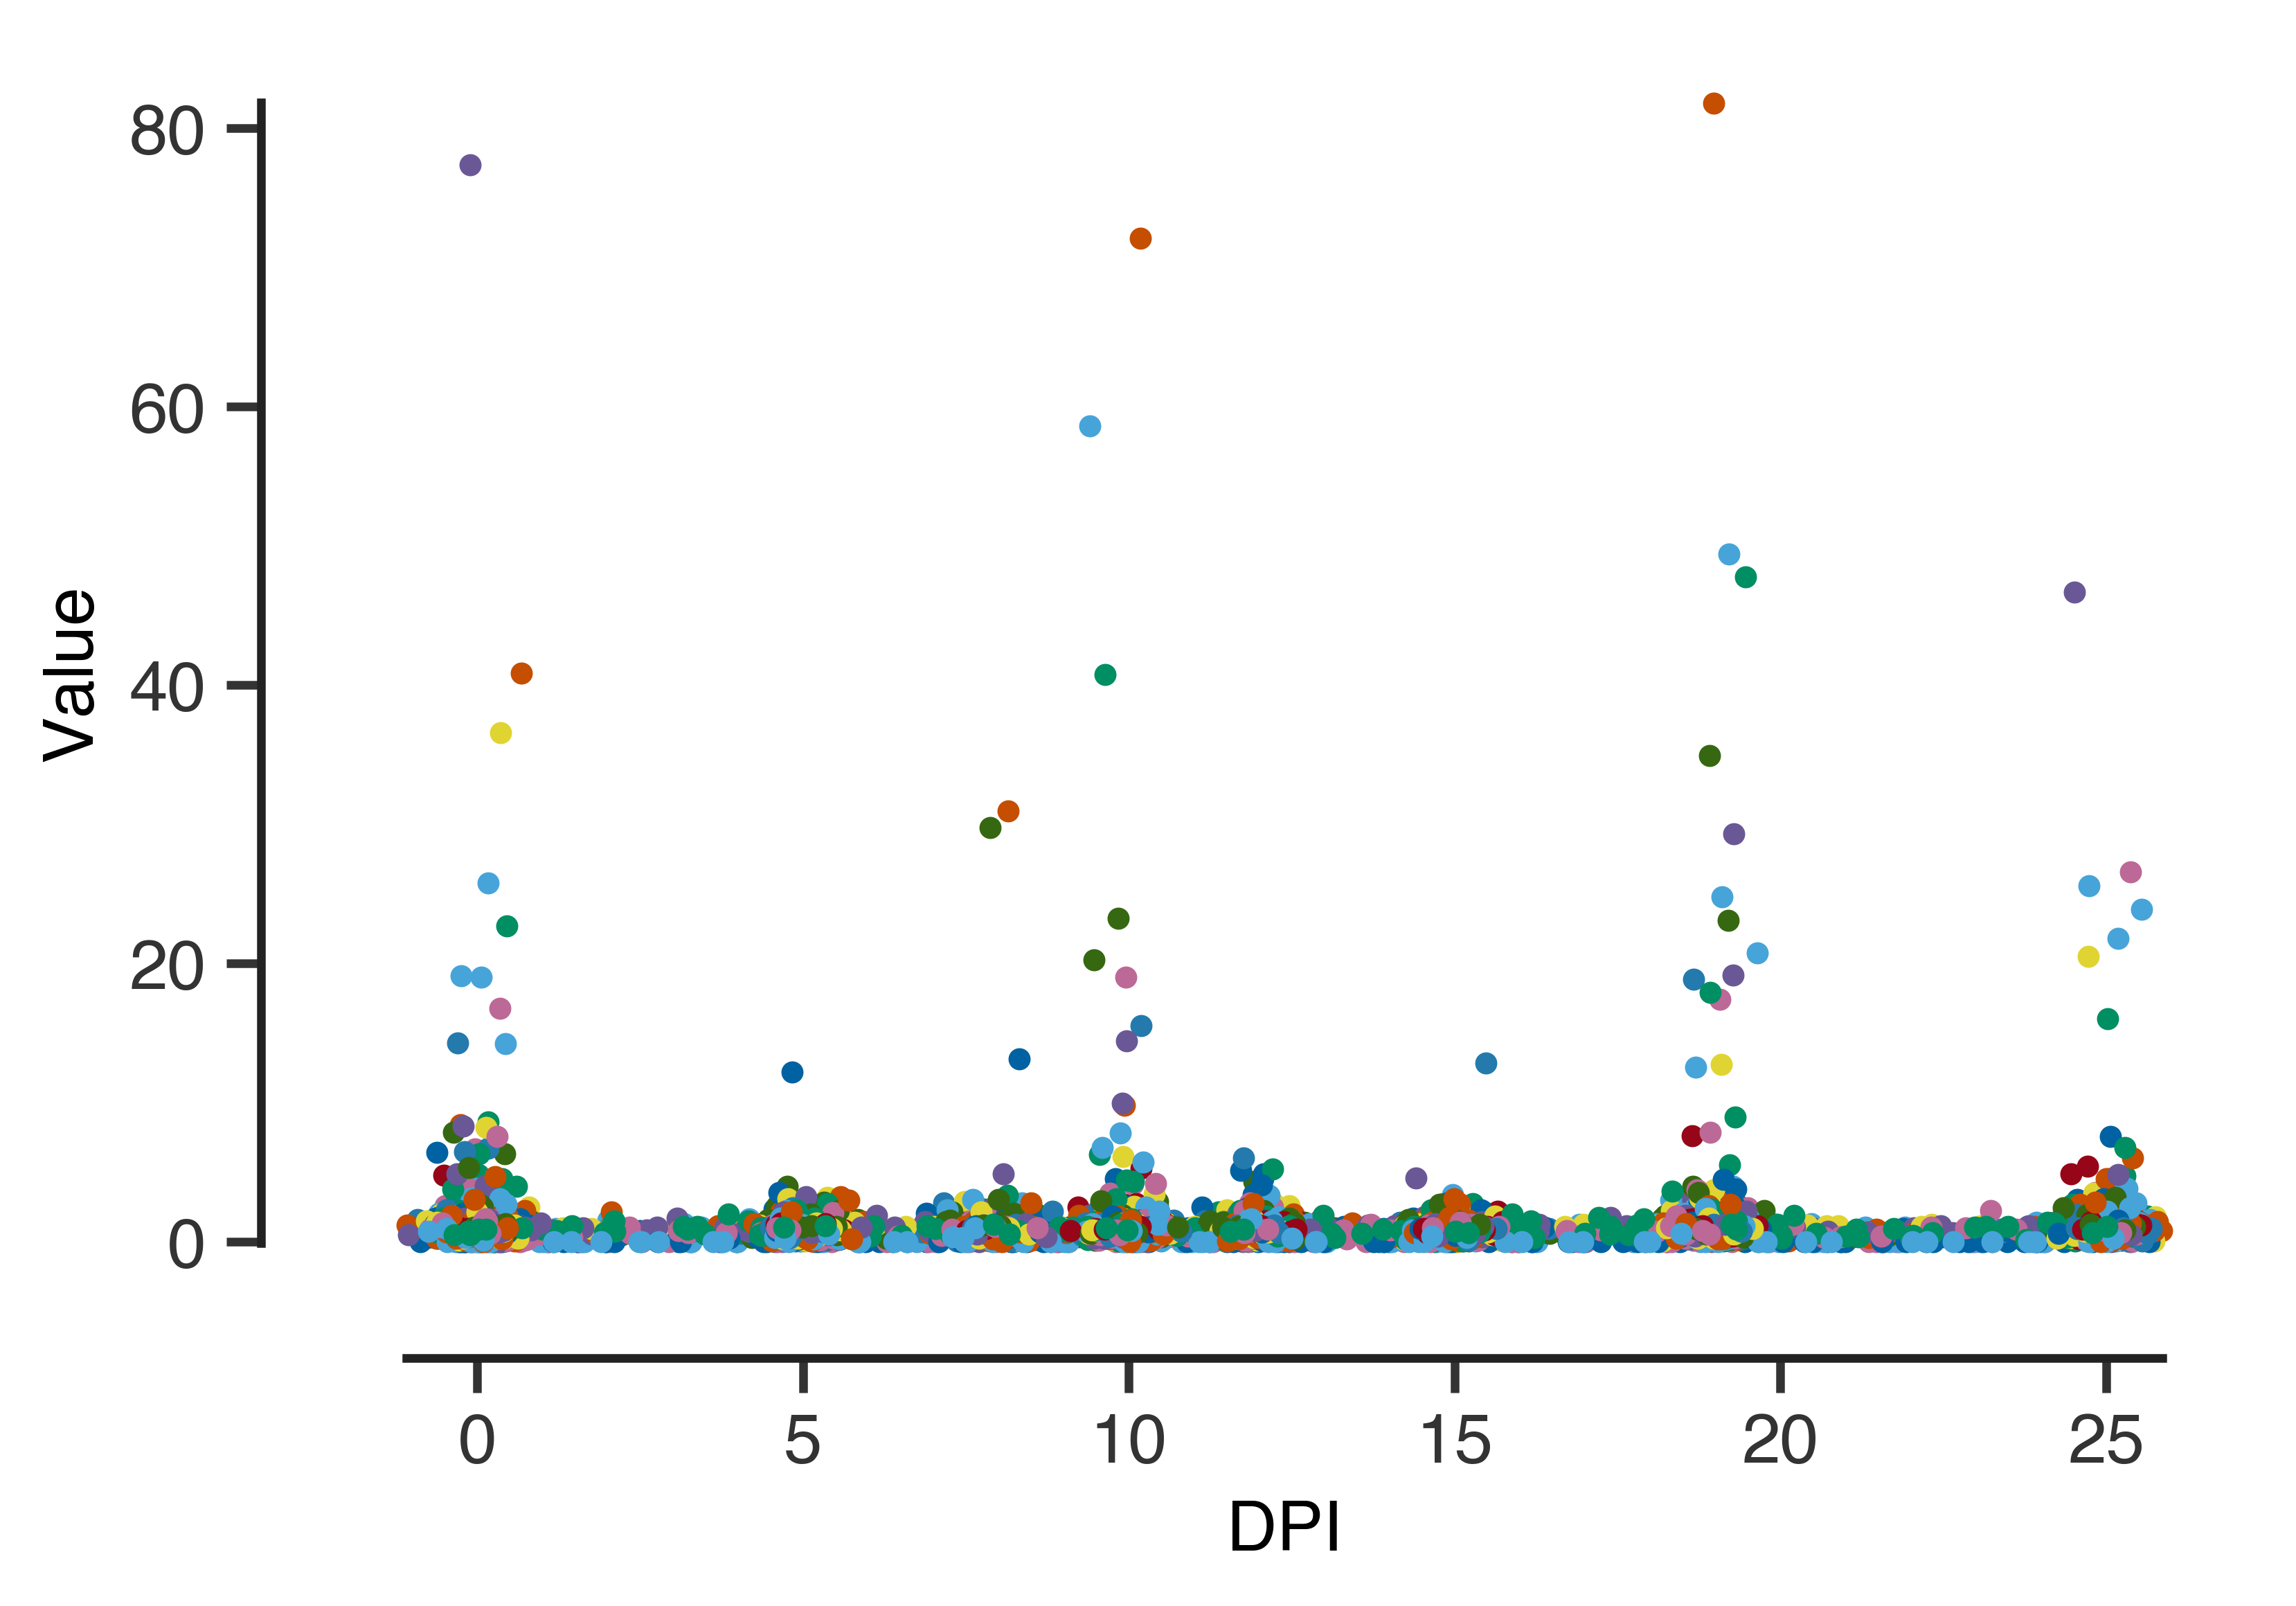

In [14]:
size = 8
for v in variables:
    plt.scatter(time+0.3*np.random.randn(len(control_list[v])), control_list[v], s=size)
    
# plt.scatter(time, control_list[variables[2]], s=size)
# plt.scatter(time, control_list[variables[6]], s=size)
plt.xlabel('DPI')
plt.ylabel('Value')
plotting.adjust_spines(plt.gca())

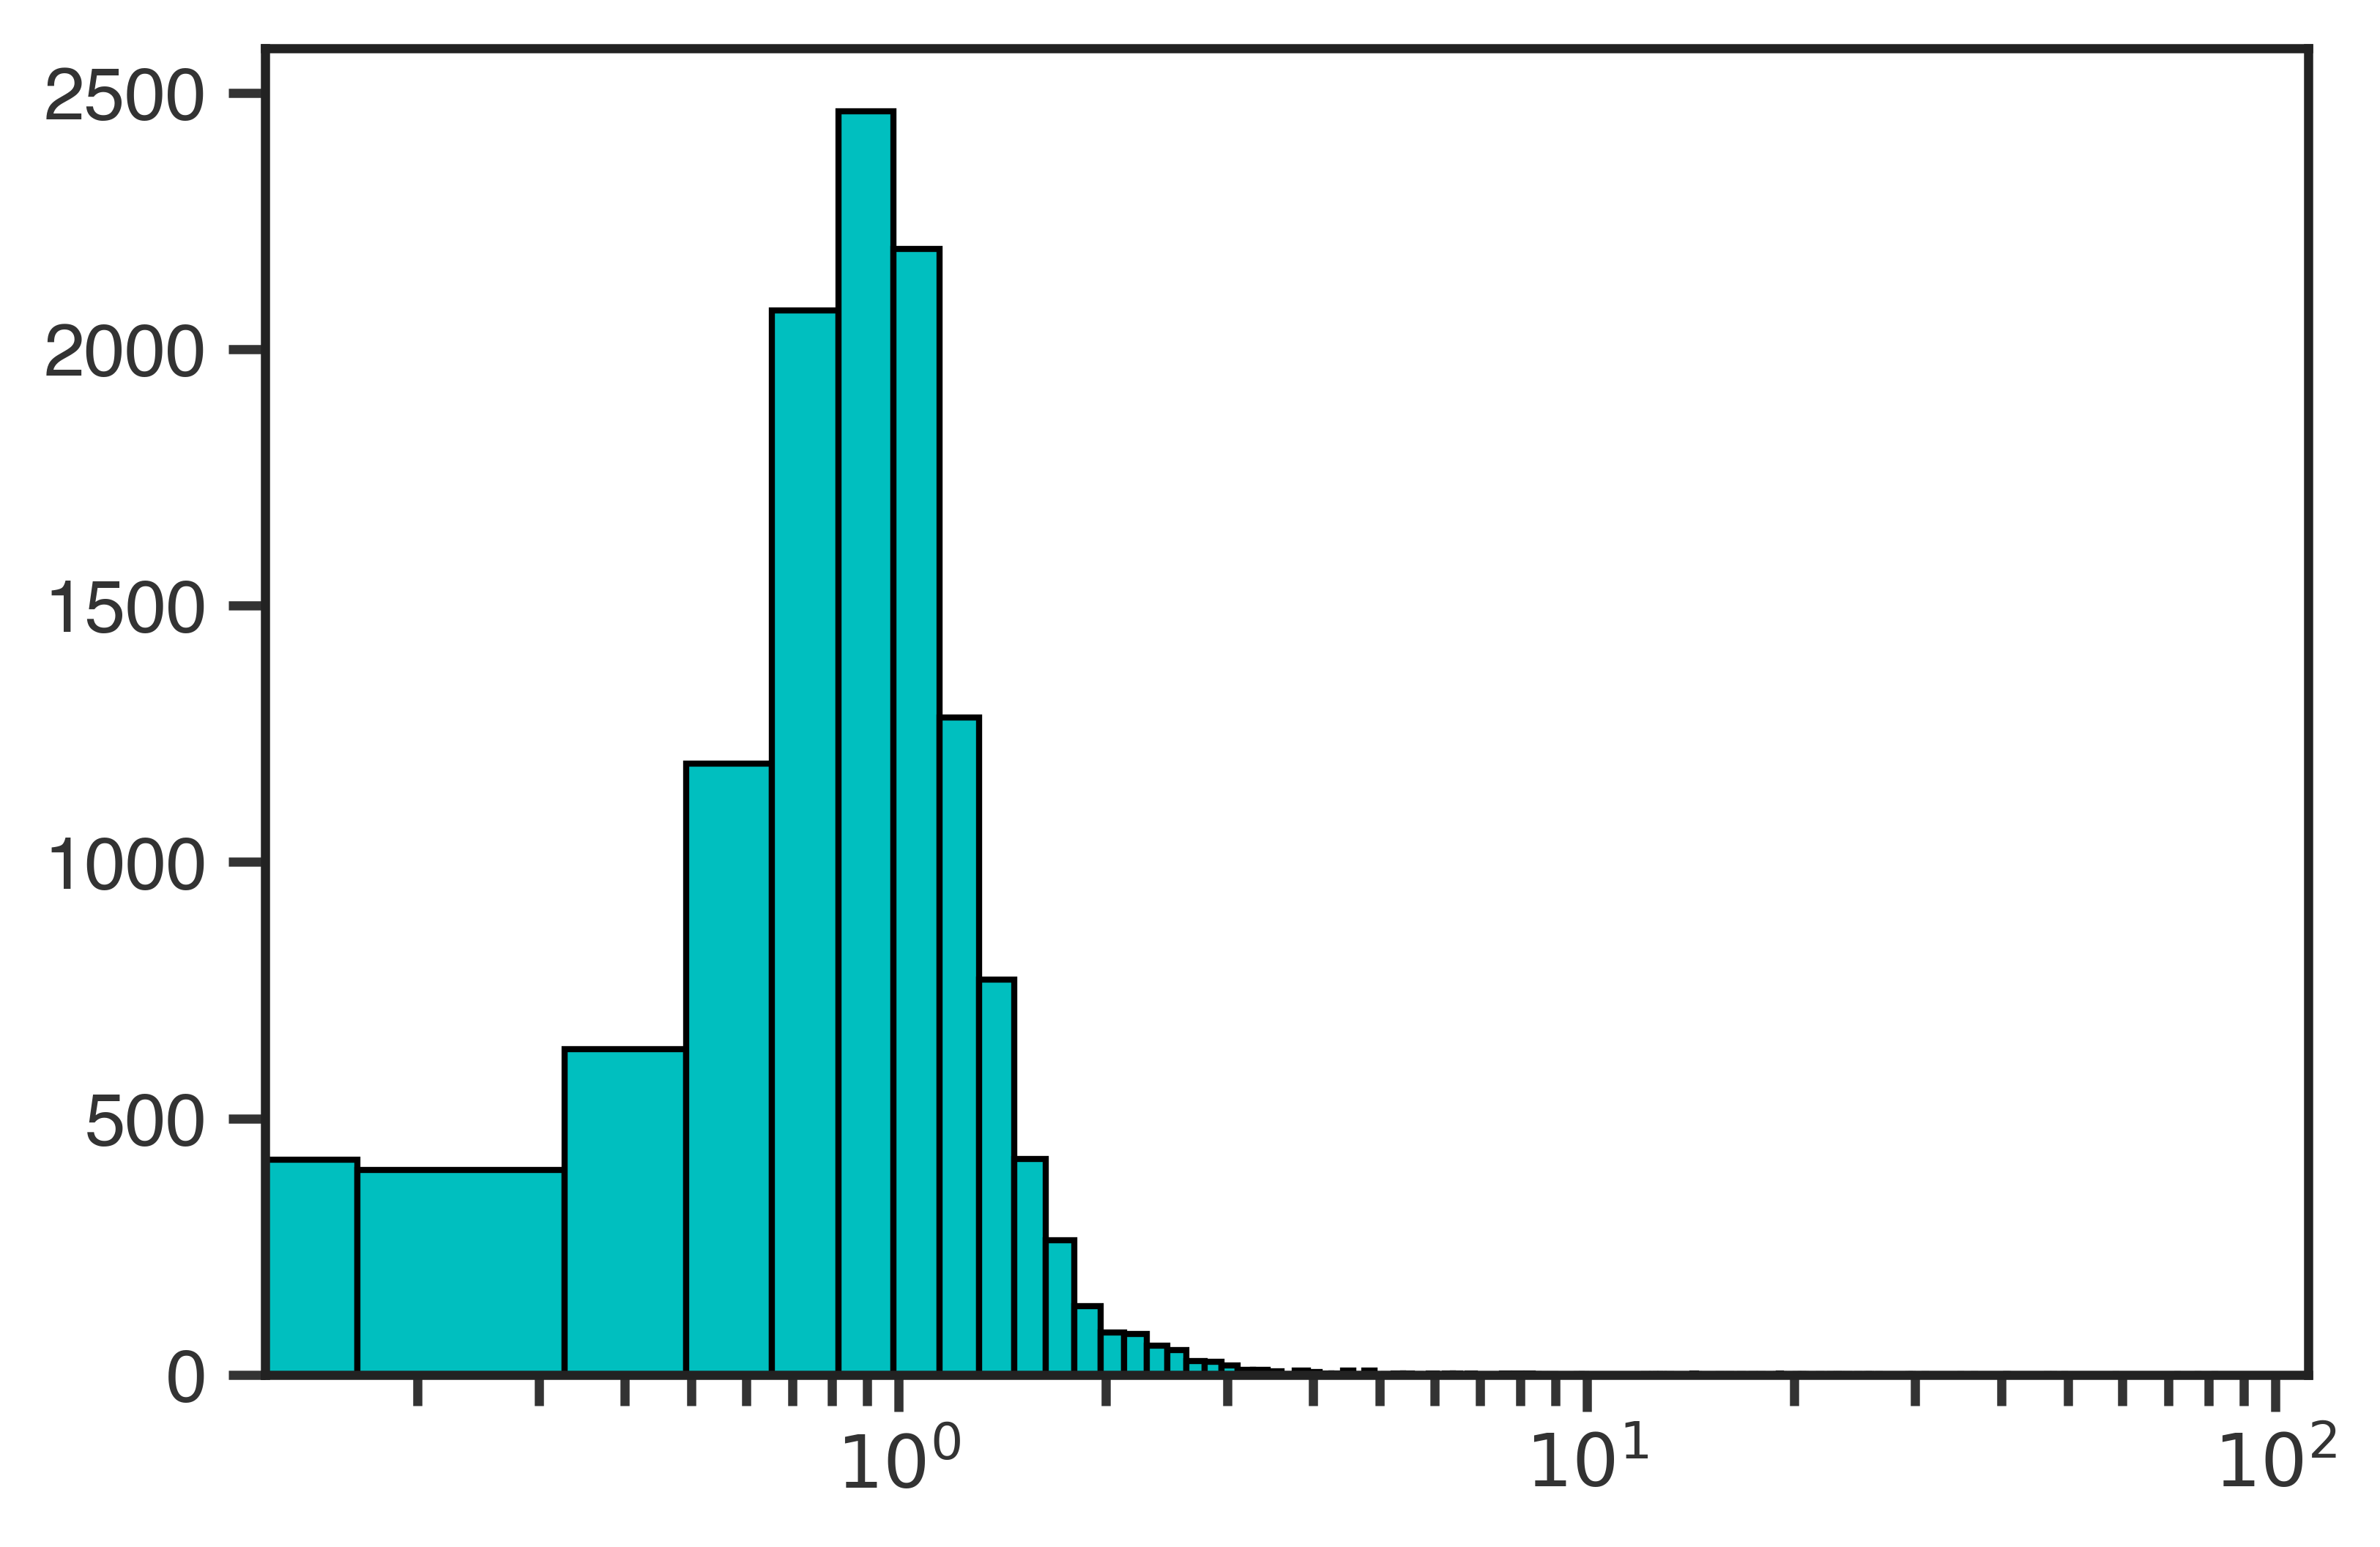

In [15]:
all_control_values = np.array([control_list[v] for v in variables]).flatten()
all_control_values = all_control_values[~np.isnan(all_control_values)]
count, bins = np.histogram(all_control_values, bins=500)
bin_width = np.mean(np.diff(bins))
plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='c', edgecolor='k')
plt.xscale('log')

In [16]:
control_means = collections.defaultdict(list)
control_std = collections.defaultdict(list)
control_variance = collections.defaultdict(list)
for v in variables:
    control_means[v] = np.nanmean(control_list[v])
    control_std[v] = np.nanstd(control_list[v])
    control_variance[v] = np.nanvar(control_list[v])

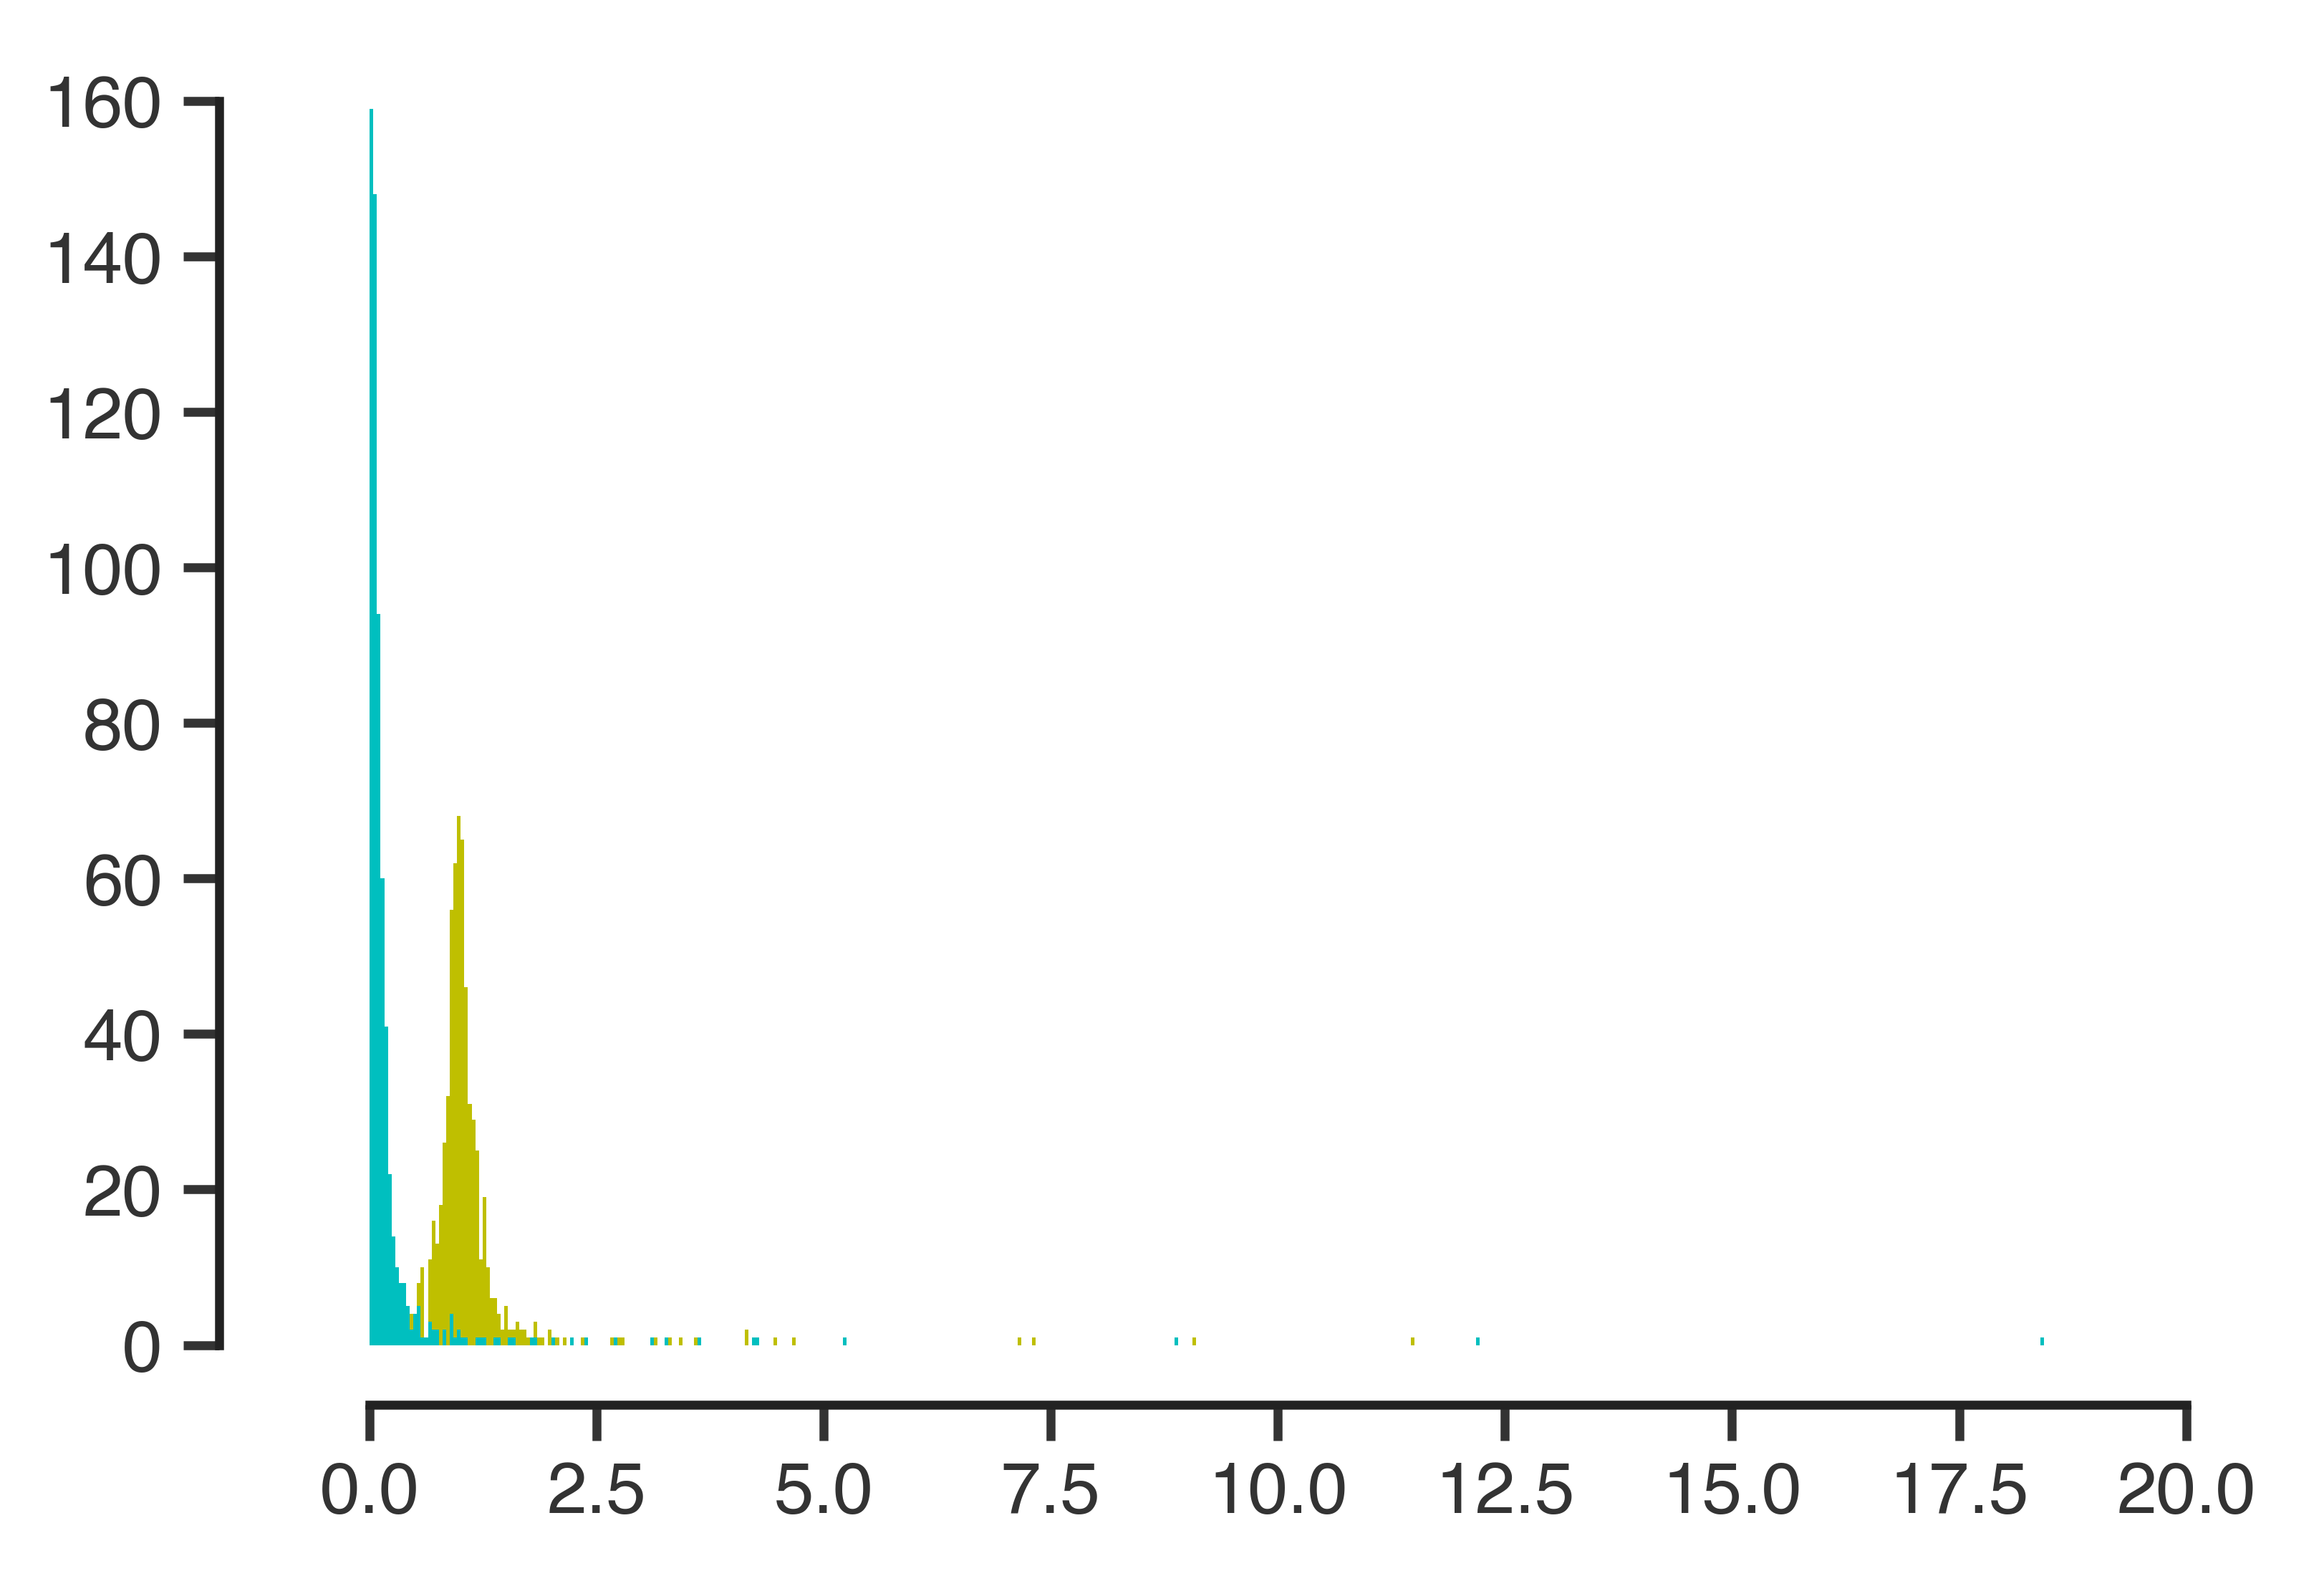

In [17]:
all_control_means = np.array([control_means[v] for v in variables]).flatten()
all_control_variances = np.array([control_variance[v] for v in variables]).flatten()

bins = np.linspace(0,20,500)
bin_width = np.mean(np.diff(bins))

count_means, bins = np.histogram(all_control_means, bins=bins)
count_variances, bins = np.histogram(all_control_variances, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_means, width=bin_width, color='y')
plt.bar(bins[:-1] + bin_width/2.0, count_variances, width=bin_width, color='c')
# plt.xscale('log')
plotting.adjust_spines(plt.gca())

In [18]:
np.min(all_control_variances)

0.0

In [19]:
for v in variables:
    if control_variance[v] == 0.0:
        print(v)

lactosyl-N-palmitoyl-sphingosine (d18:1/16:0)
Direct Bilirubin
cerotoylcarnitine (C26)*
GGT


### Modify variables to include variables that have zero variance

In [20]:
variables = [k for k in control_list.keys() if k not in ['mouse_id', 'Mouse', 'DPI', 'Infected (1/0)',
                                                        'Parasitemia', 'Parasite Density', 'Accuri', 'Cells',
                                                        'palmitoyl-arachidonoyl-glycerol (16:0/20:4) [2]*',
                                                        'palmitoyl-linoleoyl-glycerol (16:0/18:2) [1]*',
                                                        'Direct Bilirubin', 
                                                         'lactosyl-N-palmitoyl-sphingosine (d18:1/16:0)',
                                                         'cerotoylcarnitine (C26)*', 'GGT']]

# Z-score these babies

In [21]:
from scipy.stats import zscore

In [22]:
normalized_control = collections.defaultdict(list)
for v in variables:
    normalized_control[v] = (control_list[v] - np.nanmean(control_list[v]))/np.nanstd(control_list[v])

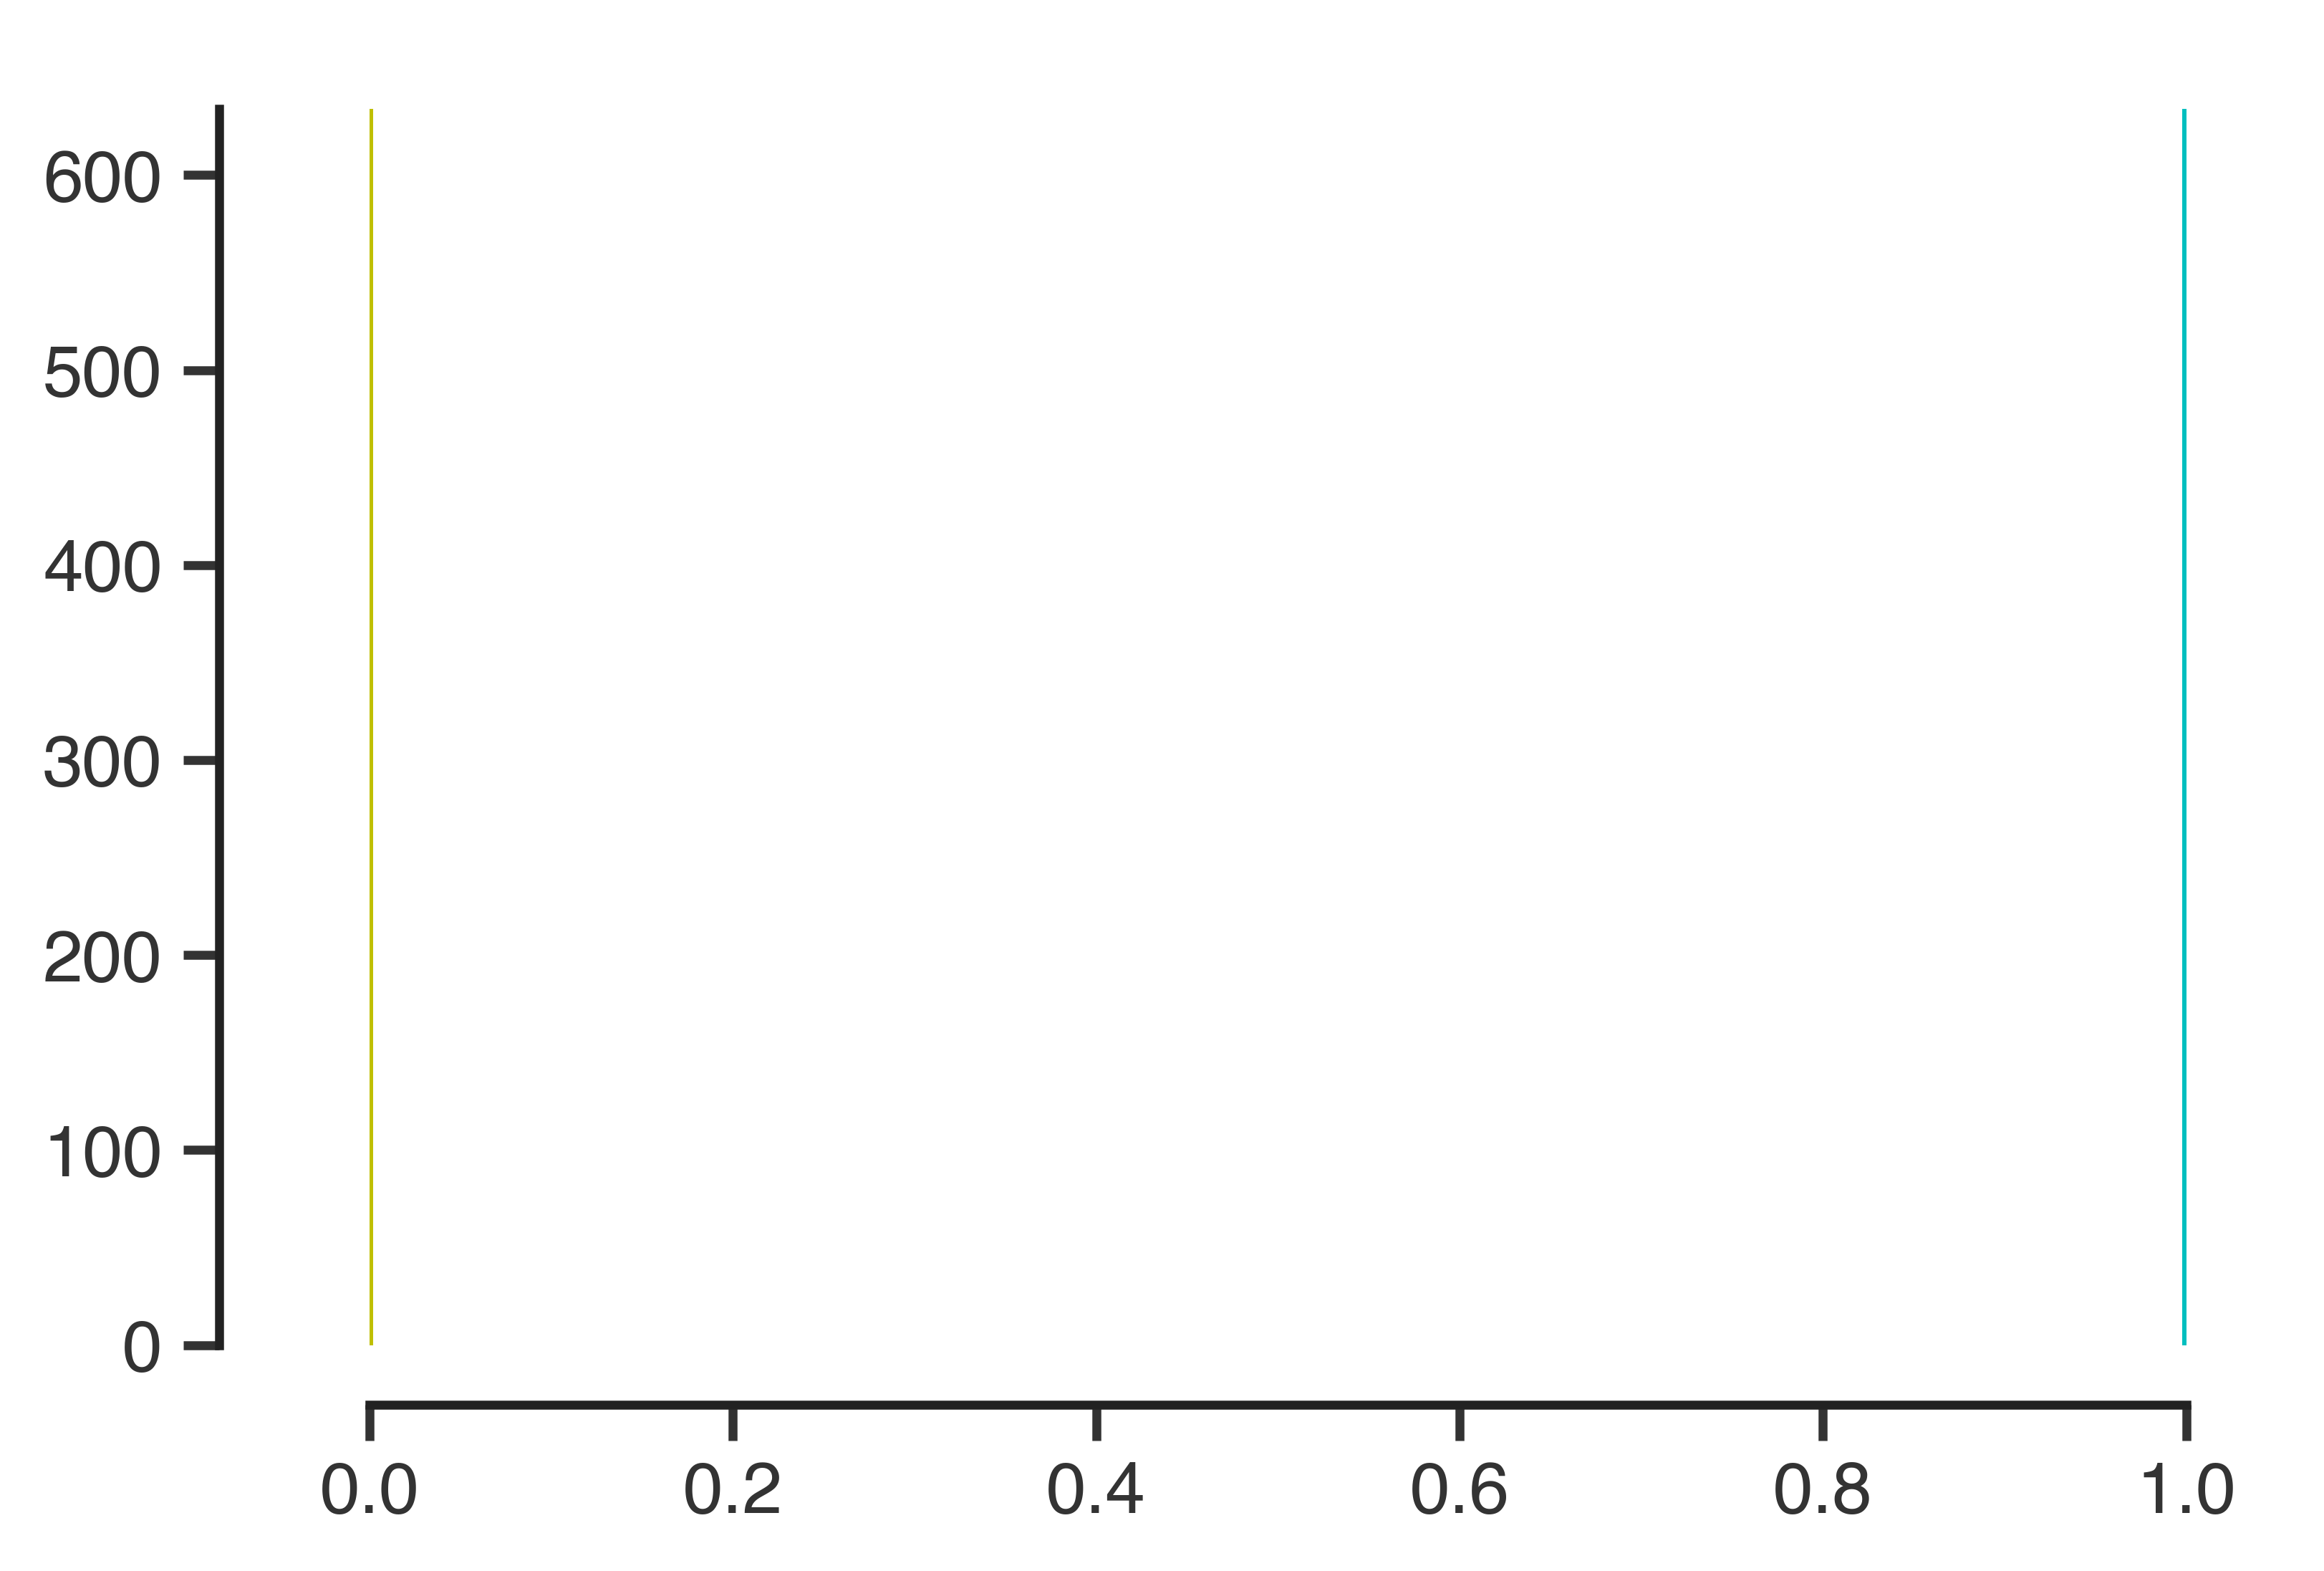

In [23]:
all_control_means = np.array([np.nanmean(normalized_control[v]) for v in variables]).flatten()
all_control_variances = np.array([np.nanvar(normalized_control[v]) for v in variables]).flatten()

bins = np.linspace(min([min(all_control_means), min(all_control_variances)]),
                   max([max(all_control_means), max(all_control_variances)]),500)

bin_width = np.mean(np.diff(bins))

count_means, bins = np.histogram(all_control_means, bins=bins)
count_variances, bins = np.histogram(all_control_variances, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_means, width=bin_width, color='y')
plt.bar(bins[:-1] + bin_width/2.0, count_variances, width=bin_width, color='c')
# plt.xscale('log')
plotting.adjust_spines(plt.gca())

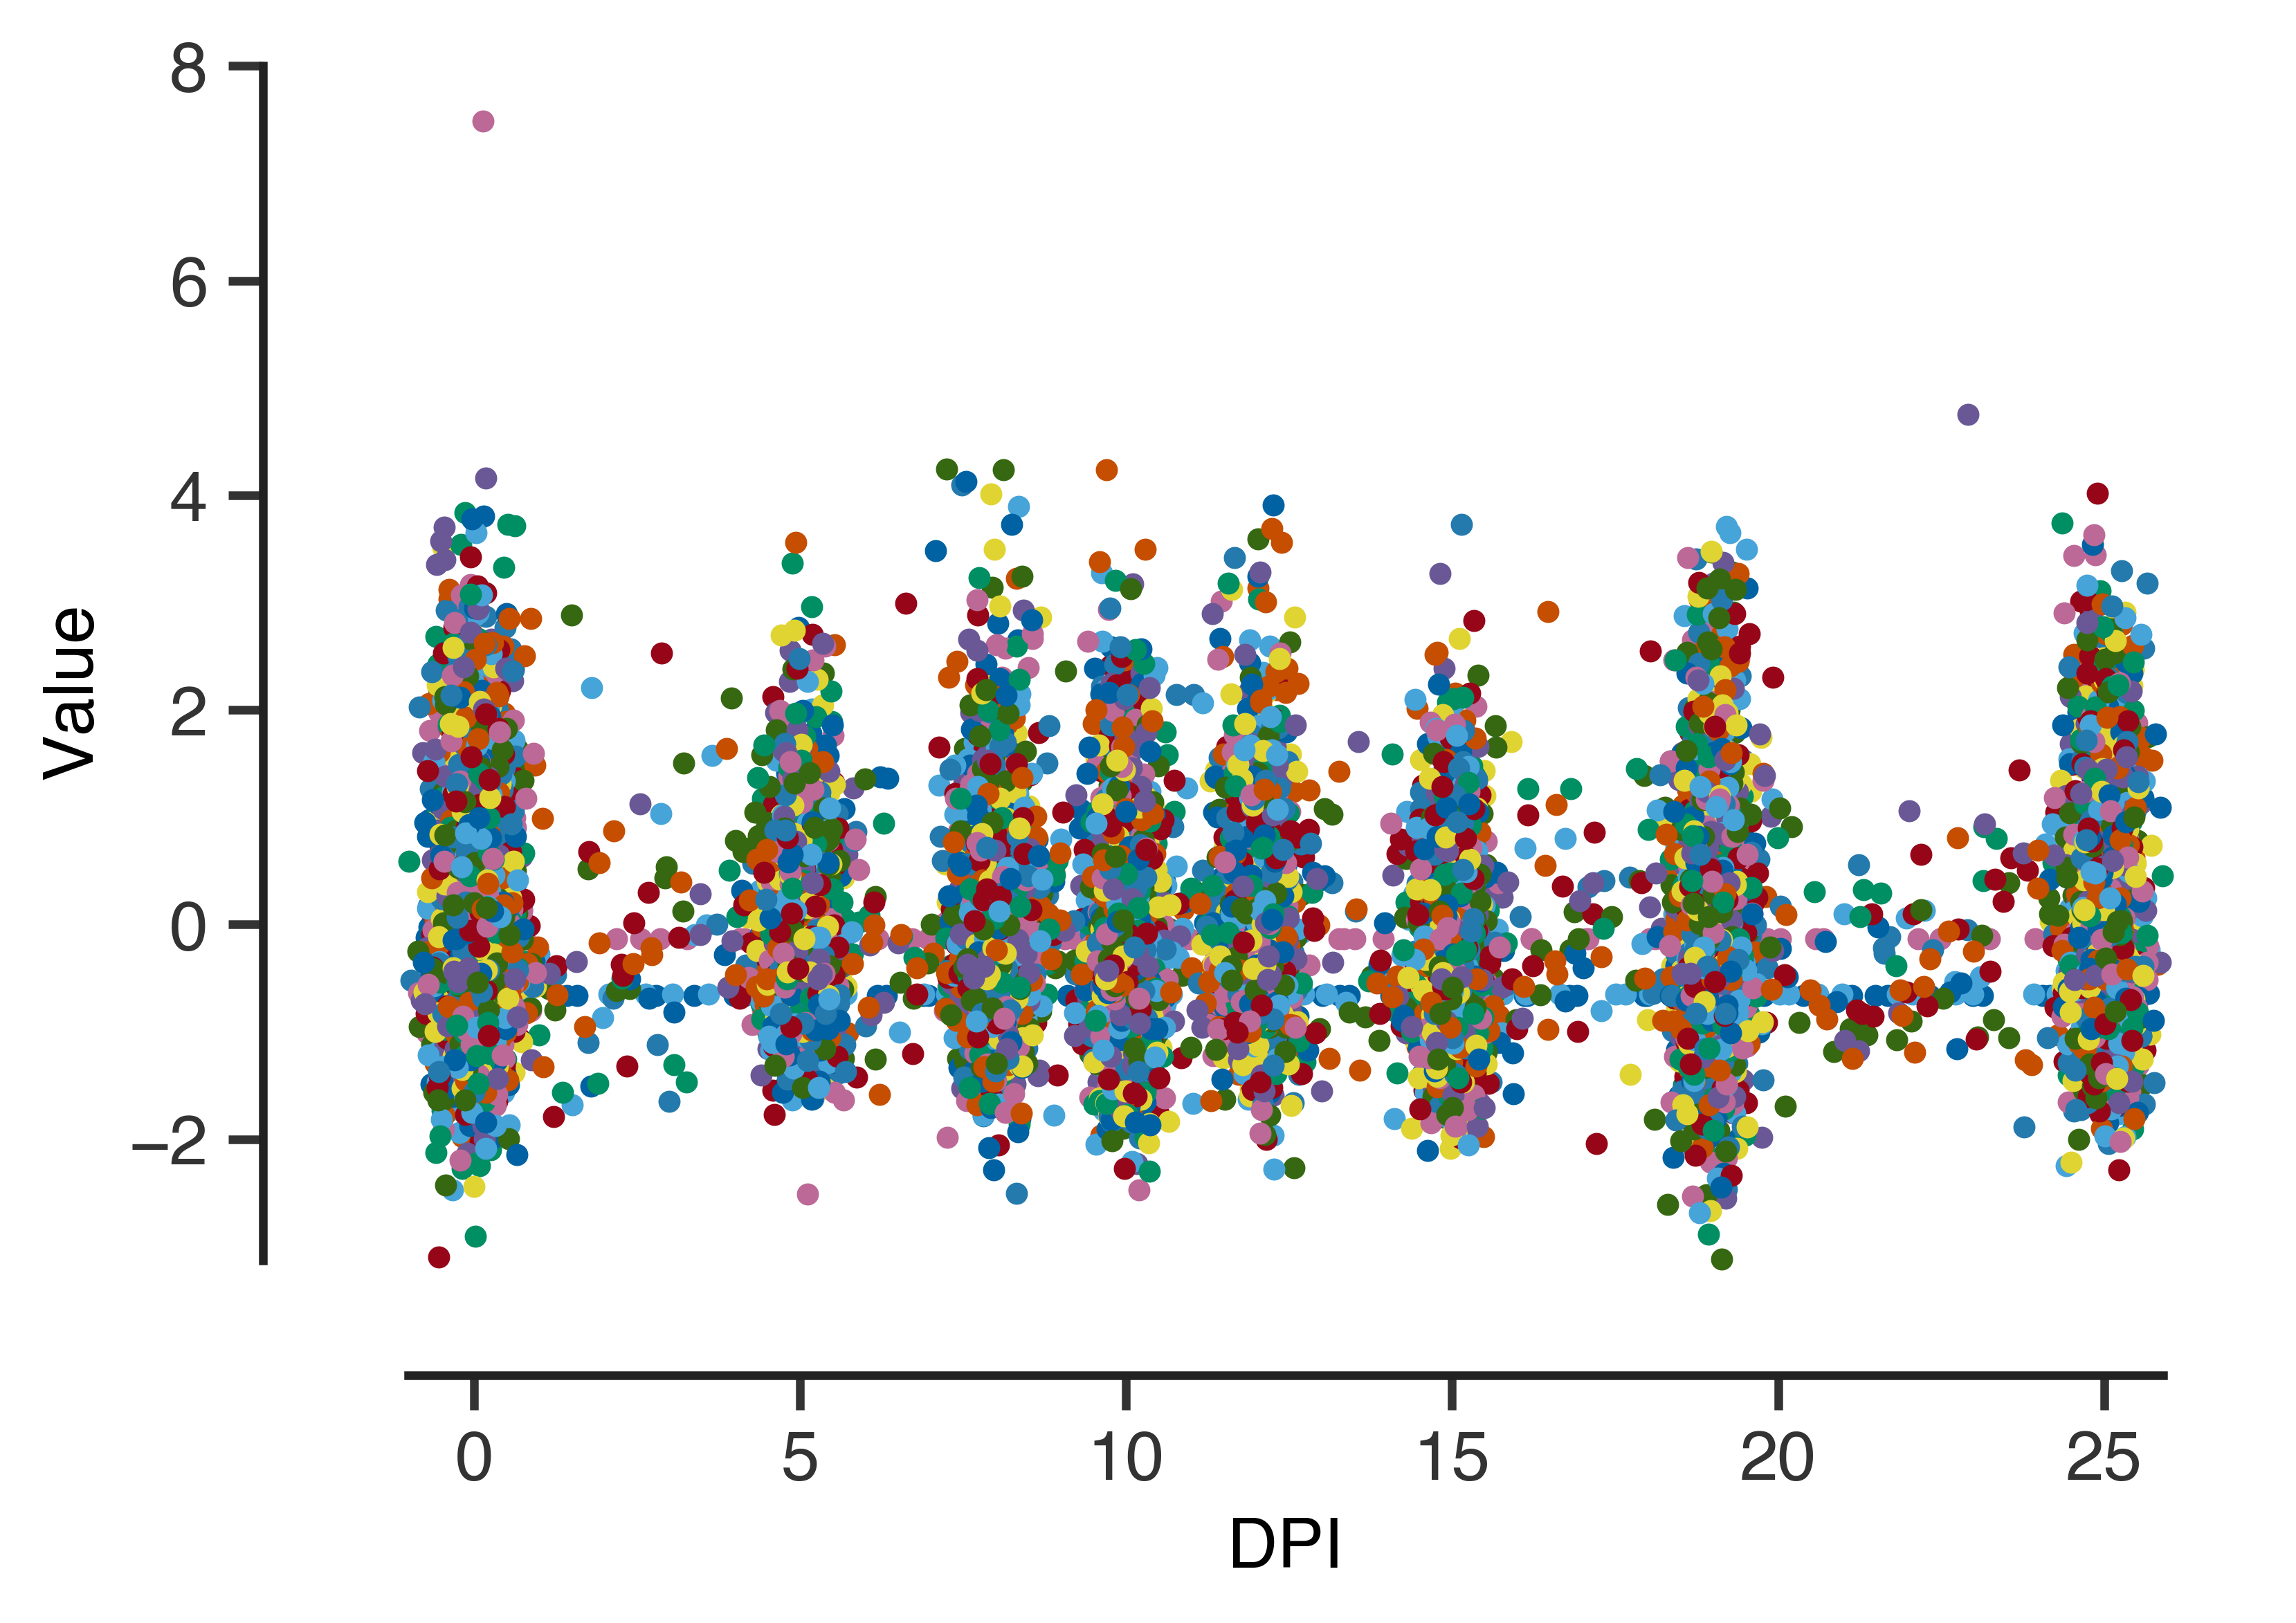

In [24]:
size = 8
for v in variables:
    plt.scatter(time+0.3*np.random.randn(len(normalized_control[v])), normalized_control[v], s=size)
    
# plt.scatter(time, control_list[variables[2]], s=size)
# plt.scatter(time, control_list[variables[6]], s=size)
plt.xlabel('DPI')
plt.ylabel('Value')
plotting.adjust_spines(plt.gca())

# Load the experimental data!!!

In [25]:
experimental_file = open(data_path + experimental_name, 'r')
experimental_reader = csv.reader(experimental_file)

In [26]:
experimental_list = collections.defaultdict(list)
labels = []
for idl,line in enumerate(experimental_reader):
    if idl == 0:
        for l in line:
            labels.append(l)
    else:
        if line[0] != '':
            print(line[0])
            for idi,l in enumerate(line):
                if l == '':
                    experimental_list[labels[idi]].append(np.nan)
                elif idi > 0:
                    experimental_list[labels[idi]].append(float(l))
                elif idi == 0:
                    experimental_list[labels[idi]].append(l)

1.1
2.1
3.1
4.1
5.1
1.2
2.2
3.2
4.2
5.2
1.3
2.3
3.3
4.3
5.3
1.4
2.4
3.4
4.4
5.4
1.5
2.5
3.5
4.5
5.5
1.6
2.6
3.6
4.6
5.6
1.7
2.7
3.7
4.7
5.7
1.8
2.8
3.8
4.8
5.8
1.9
2.9
3.9
4.9
5.9
1.10
2.10
3.10
4.10
5.10
1.11
2.11
3.11
4.11
5.11
1.12
2.12
3.12
4.12
5.12
1.13
2.13
3.13
4.13
5.13
1.14
2.14
3.14
4.14
5.14
1.15
2.15
3.15
4.15
5.15
1.16
2.16
3.16
4.16
5.16
1.17
2.17
3.17
4.17
5.17
1.18
2.18
3.18
4.18
5.18
1.19
2.19
3.19
4.19
5.19
1.20
2.20
3.20
4.20
5.20
1.21
2.21
3.21
4.21
5.21
1.22
2.22
3.22
4.22
5.22
1.23
2.23
3.23
4.23
5.23
1.24
2.24
3.24
4.24
5.24
1.25
2.25
3.25
4.25
5.25


In [27]:
for m in experimental_list['Mouse']:
    # mouse id x day
    this_split = m.split('.')
    experimental_list['mouse_id'] = this_split[0]

In [28]:
experimental_means = collections.defaultdict(list)
experimental_variance = collections.defaultdict(list)
for v in variables:
    experimental_means[v] = np.nanmean(experimental_list[v])
    experimental_variance[v] = np.nanvar(experimental_list[v])

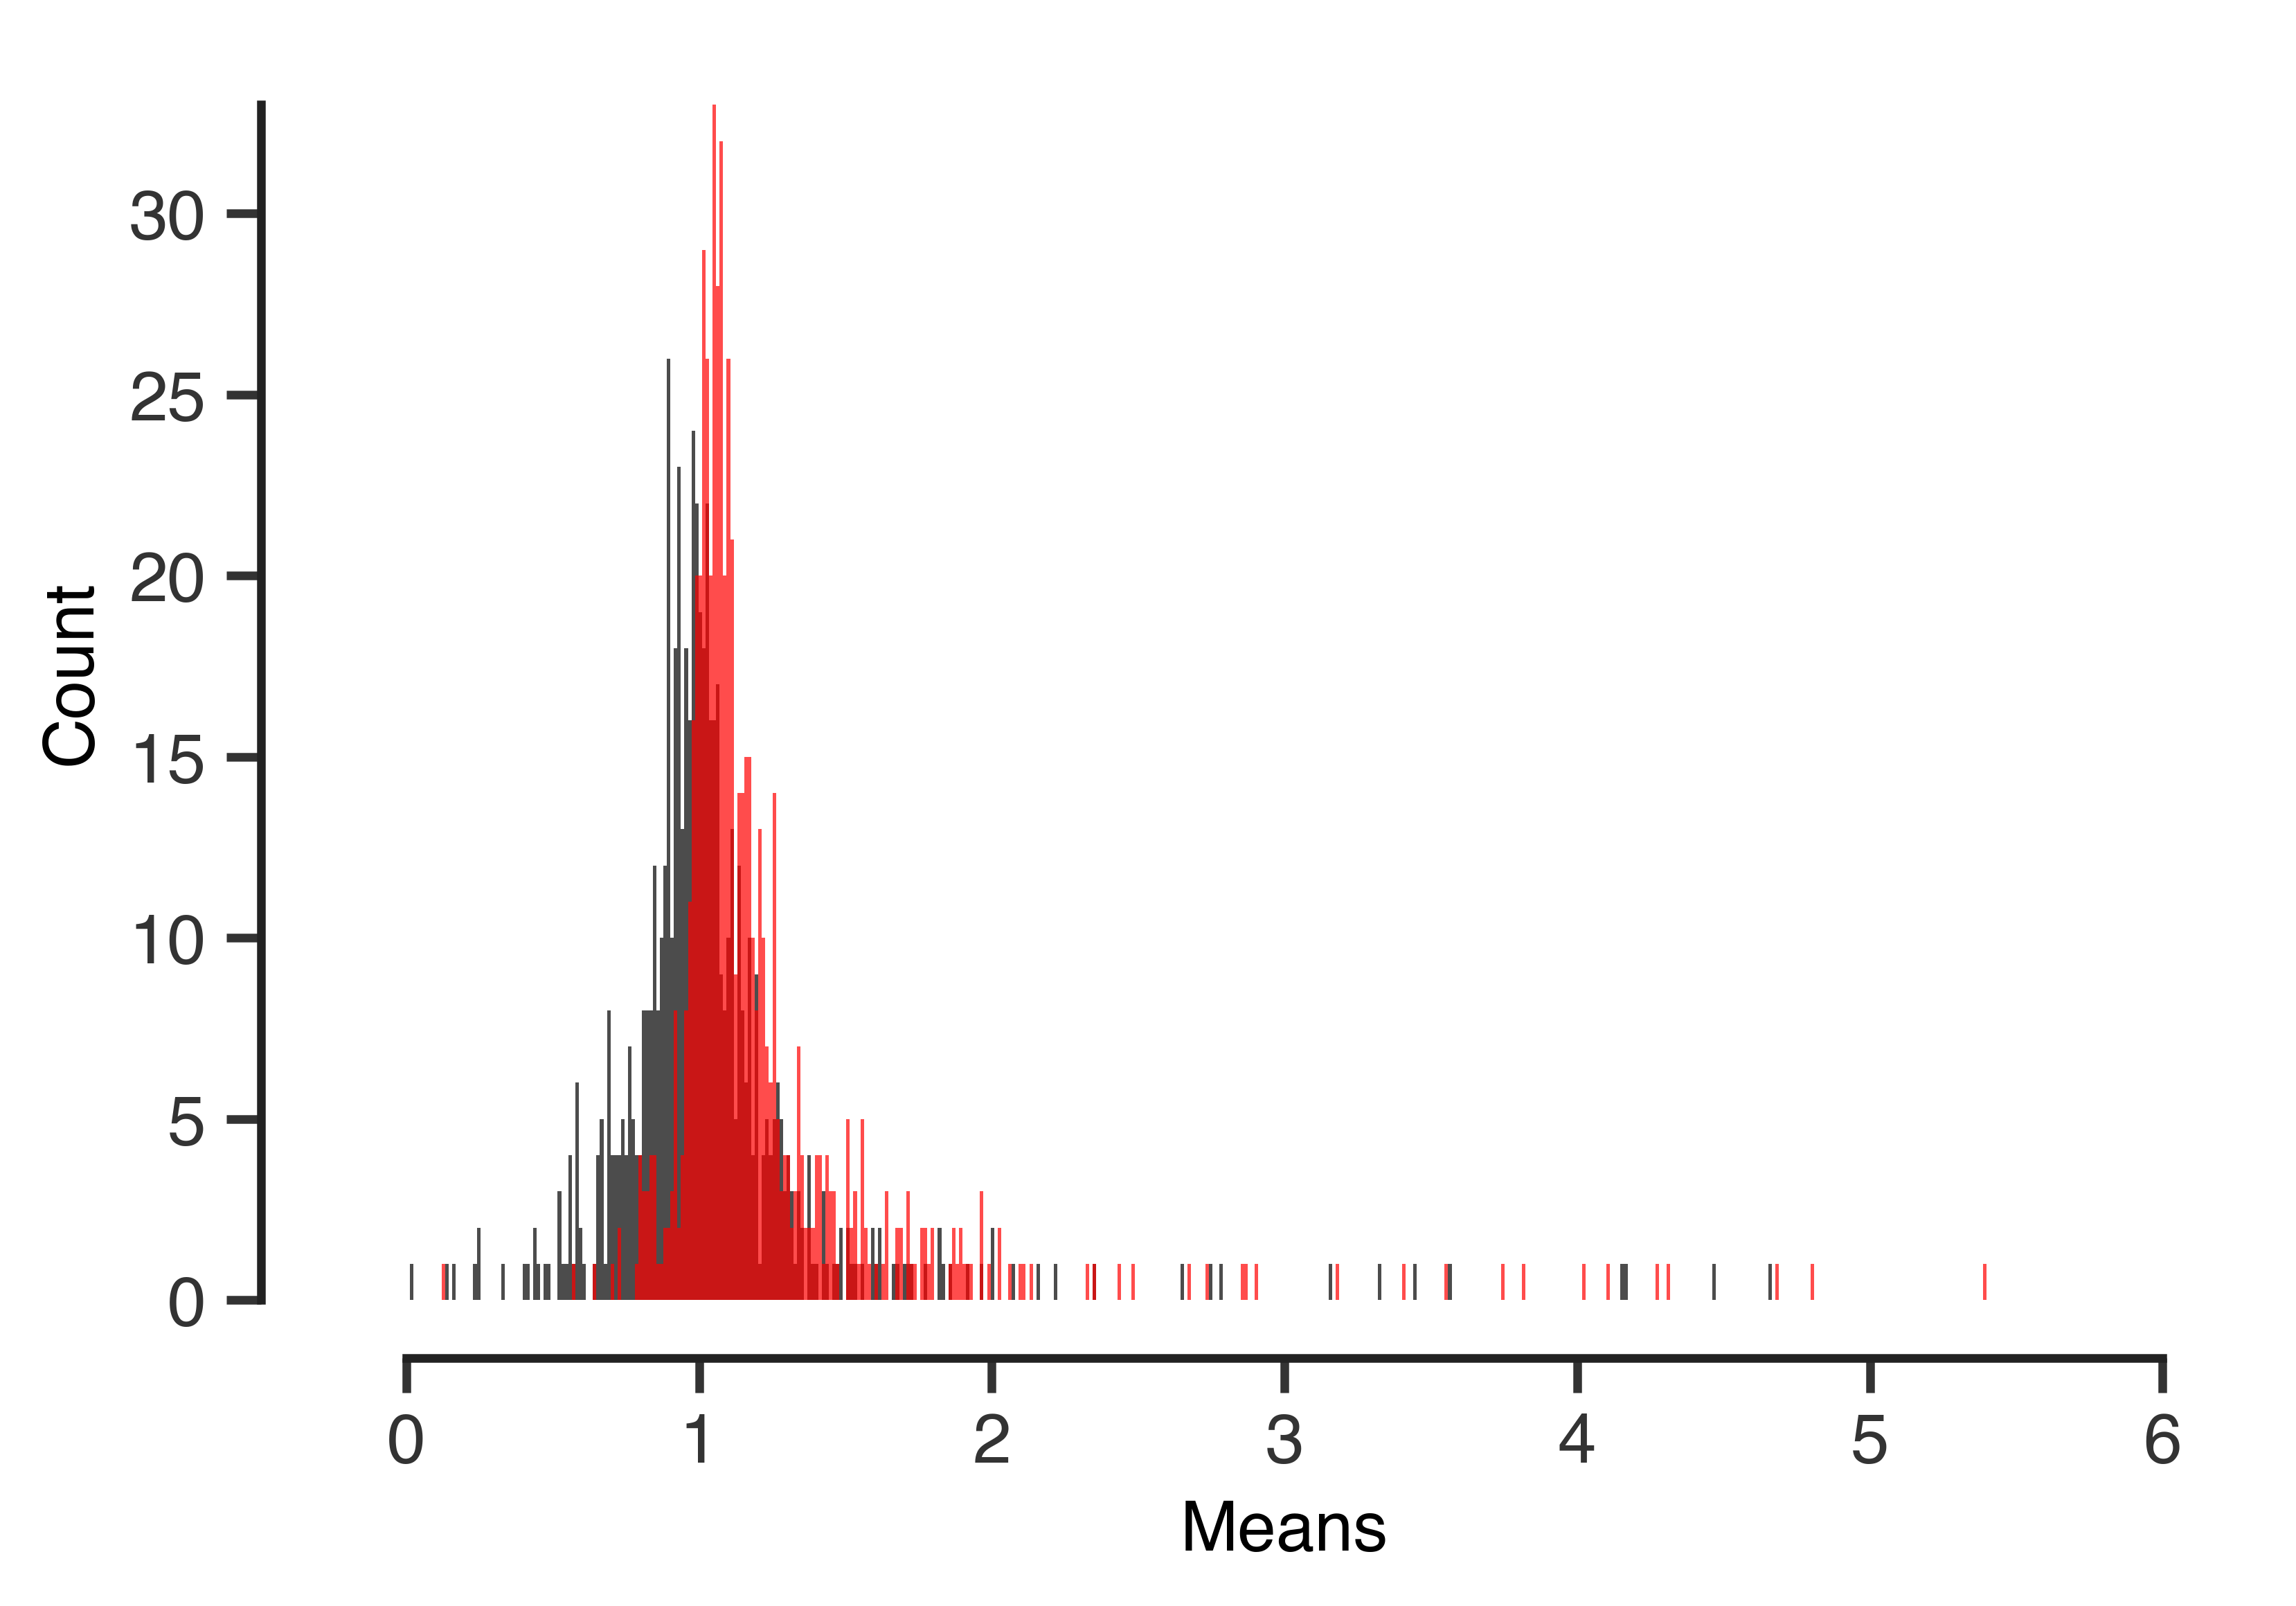

In [29]:
all_control_means = np.array([control_means[v] for v in variables]).flatten()
all_experimental_means = np.array([experimental_means[v] for v in variables]).flatten()
# all_control_variances = np.array([control_variance[v] for v in variables]).flatten()

bins = np.linspace(0,6,500)
bin_width = np.mean(np.diff(bins))

count_control, bins = np.histogram(all_control_means, bins=bins)
count_experimental, bins = np.histogram(all_experimental_means, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_control, width=bin_width, color='k', alpha=.7)
plt.bar(bins[:-1] + bin_width/2.0, count_experimental, width=bin_width, color='r', alpha=.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.xlabel('Means')
plt.ylabel('Count')

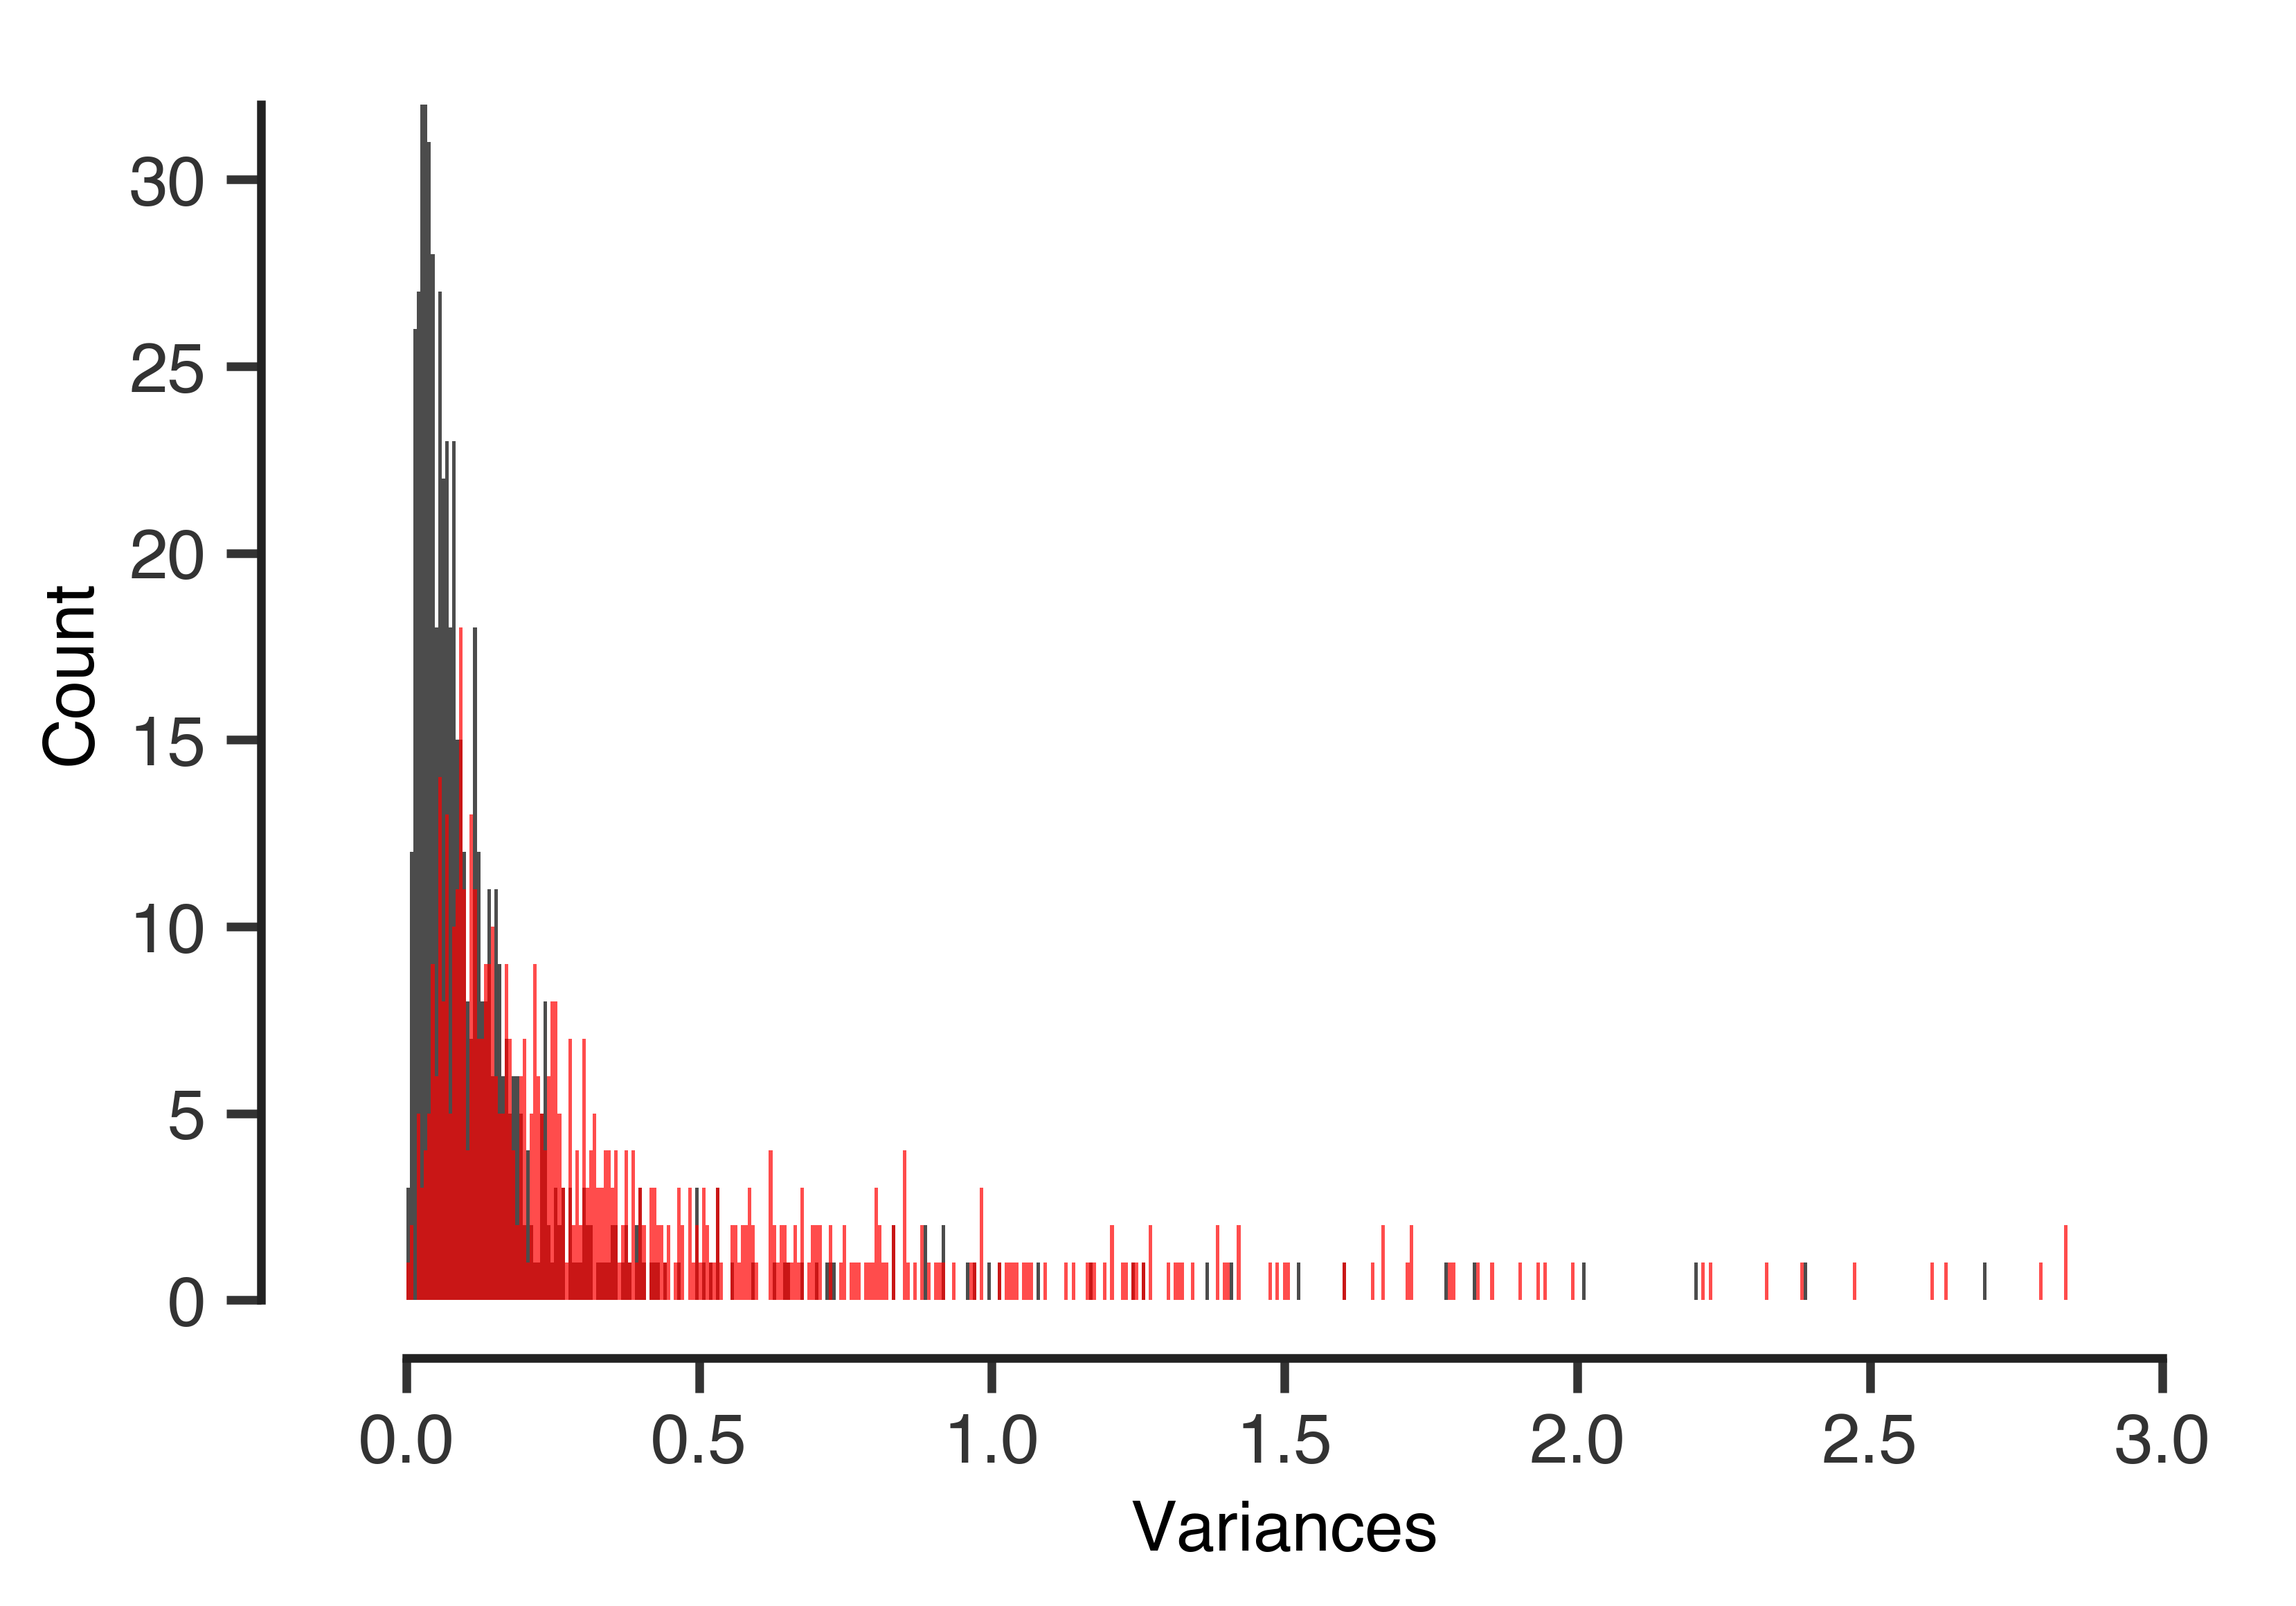

In [30]:
all_control_variances = np.array([control_variance[v] for v in variables]).flatten()
all_experimental_variances = np.array([experimental_variance[v] for v in variables]).flatten()
# all_control_variances = np.array([control_variance[v] for v in variables]).flatten()

bins = np.linspace(0,3,500)
bin_width = np.mean(np.diff(bins))

count_control, bins = np.histogram(all_control_variances, bins=bins)
count_experimental, bins = np.histogram(all_experimental_variances, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_control, width=bin_width, color='k', alpha=.7)
plt.bar(bins[:-1] + bin_width/2.0, count_experimental, width=bin_width, color='r', alpha=.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.xlabel('Variances')
plt.ylabel('Count')

#### So far so good!

Zscore now the experimental data

In [31]:
normalized_experimental = collections.defaultdict(list)
for v in variables:
    normalized_experimental[v] = (experimental_list[v] - control_means[v])/control_std[v]

In [32]:
time_experimental = experimental_list['DPI']

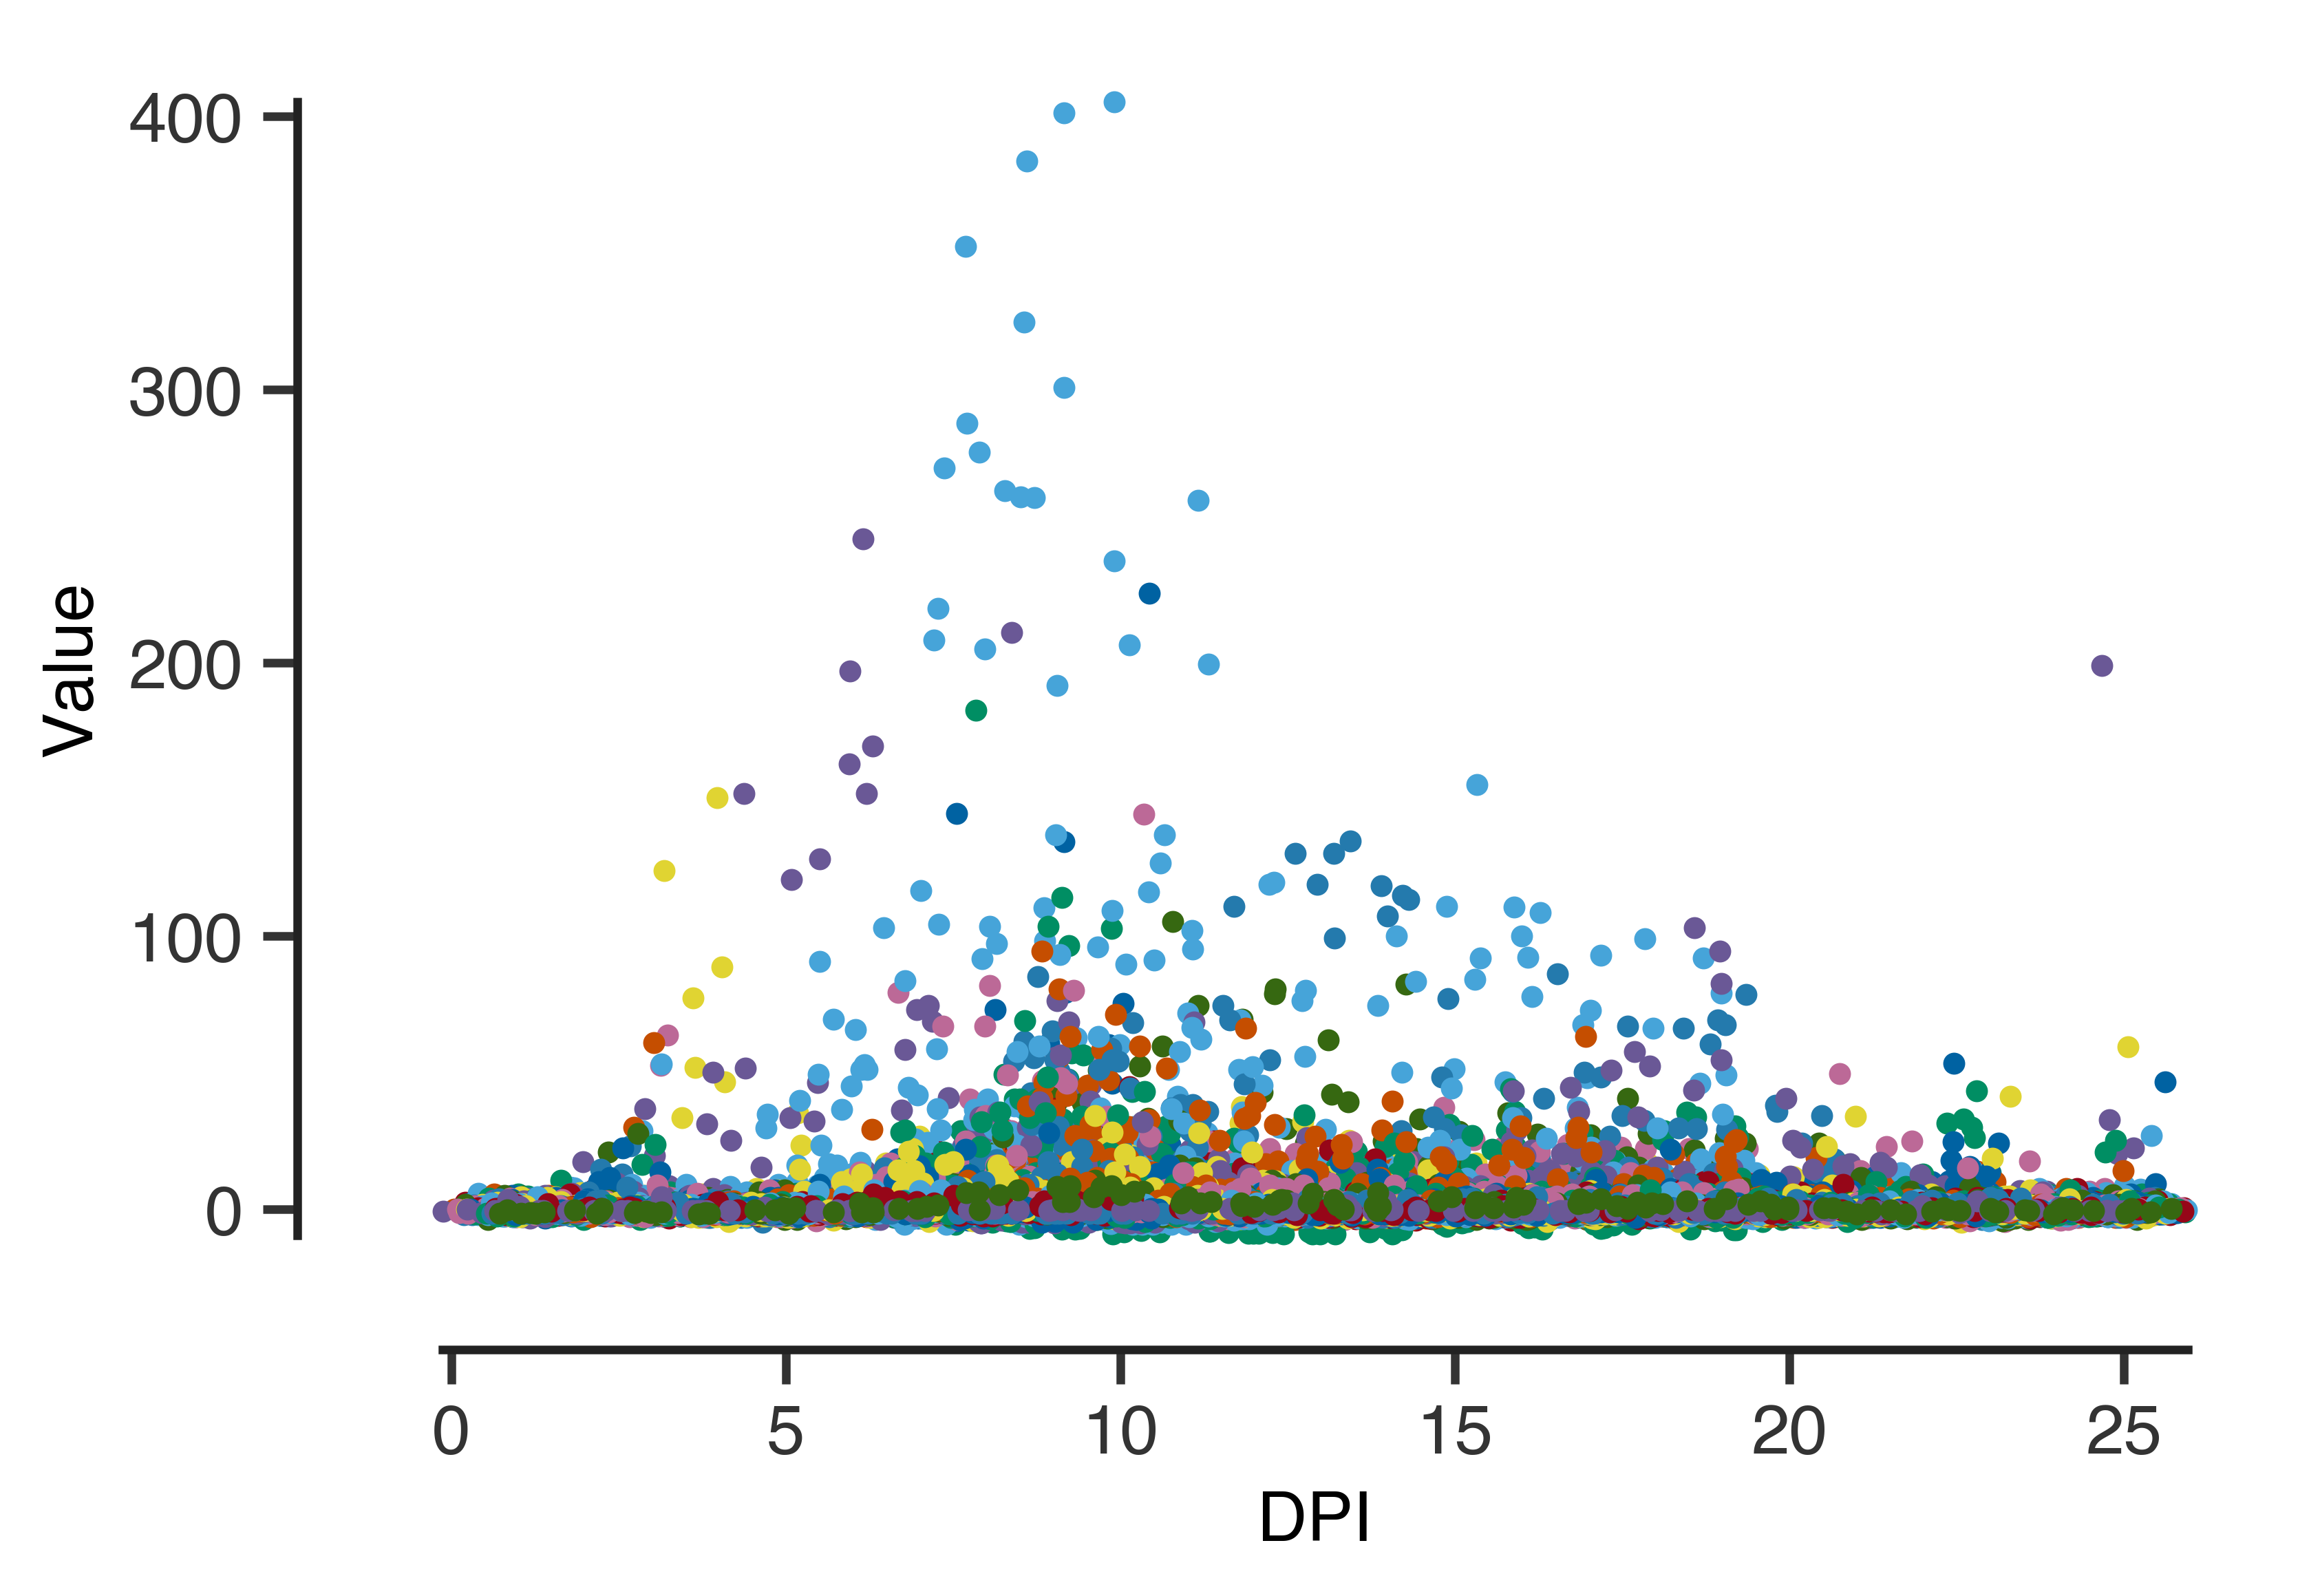

In [33]:
size = 8
for v in variables:
    plt.scatter(time_experimental+0.3*np.random.randn(len(normalized_experimental[v])),
                normalized_experimental[v], s=size)
    
# plt.scatter(time, control_list[variables[2]], s=size)
# plt.scatter(time, control_list[variables[6]], s=size)
plt.xlabel('DPI')
plt.ylabel('Value')
plotting.adjust_spines(plt.gca())

In [34]:
max(all_experimental_variances)

425.59027147242404

In [35]:
for v in variables:
    if experimental_variance[v] > 100:
        print('%s has variance %0.2f' %(v, experimental_variance[v]))

AST has variance 106.02
ALT has variance 425.59
taurochenodeoxycholate has variance 140.79
IFN-g has variance 150.67
inosine has variance 135.99


After zscoring...

In [36]:
for v in variables:
    if np.nanvar(normalized_experimental[v]) > 100:
        print('%s has variance %0.2f' %(v, np.nanvar(normalized_experimental[v])))

AST has variance 832.14
Total Bilirubin has variance 135.88
IL-12P70 has variance 335.20
orotate has variance 425.65
ALT has variance 3070.93
arachidoylcarnitine (C20)* has variance 105.58
dihomo-linoleoylcarnitine (C20:2)* has variance 144.13
IL-2 has variance 277.02
IL-23 has variance 333.02
IL-3 has variance 170.30
isobutyrylcarnitine (C4) has variance 118.32
eicosenoylcarnitine (C20:1)* has variance 289.58
itaconate has variance 8305.00
bilirubin (Z,Z) has variance 162.54
2-docosahexaenoylglycerol (22:6)* has variance 111.49
glycosyl-N-palmitoyl-sphingosine (d18:1/16:0) has variance 227.26
IL-1a has variance 114.69
Erythrocyte-B has variance 1283.37
IFN-g has variance 2098.81
stearoylcarnitine (C18) has variance 276.38
MCP-1 has variance 442.20
methylsuccinate has variance 265.28
margaroylcarnitine* has variance 191.28
g/d T Cells has variance 338.77
Erythrocyte-A has variance 186.70
formiminoglutamate has variance 300.95
pipecolate has variance 201.16


In [37]:
np.max(all_experimental_variances)

425.59027147242404

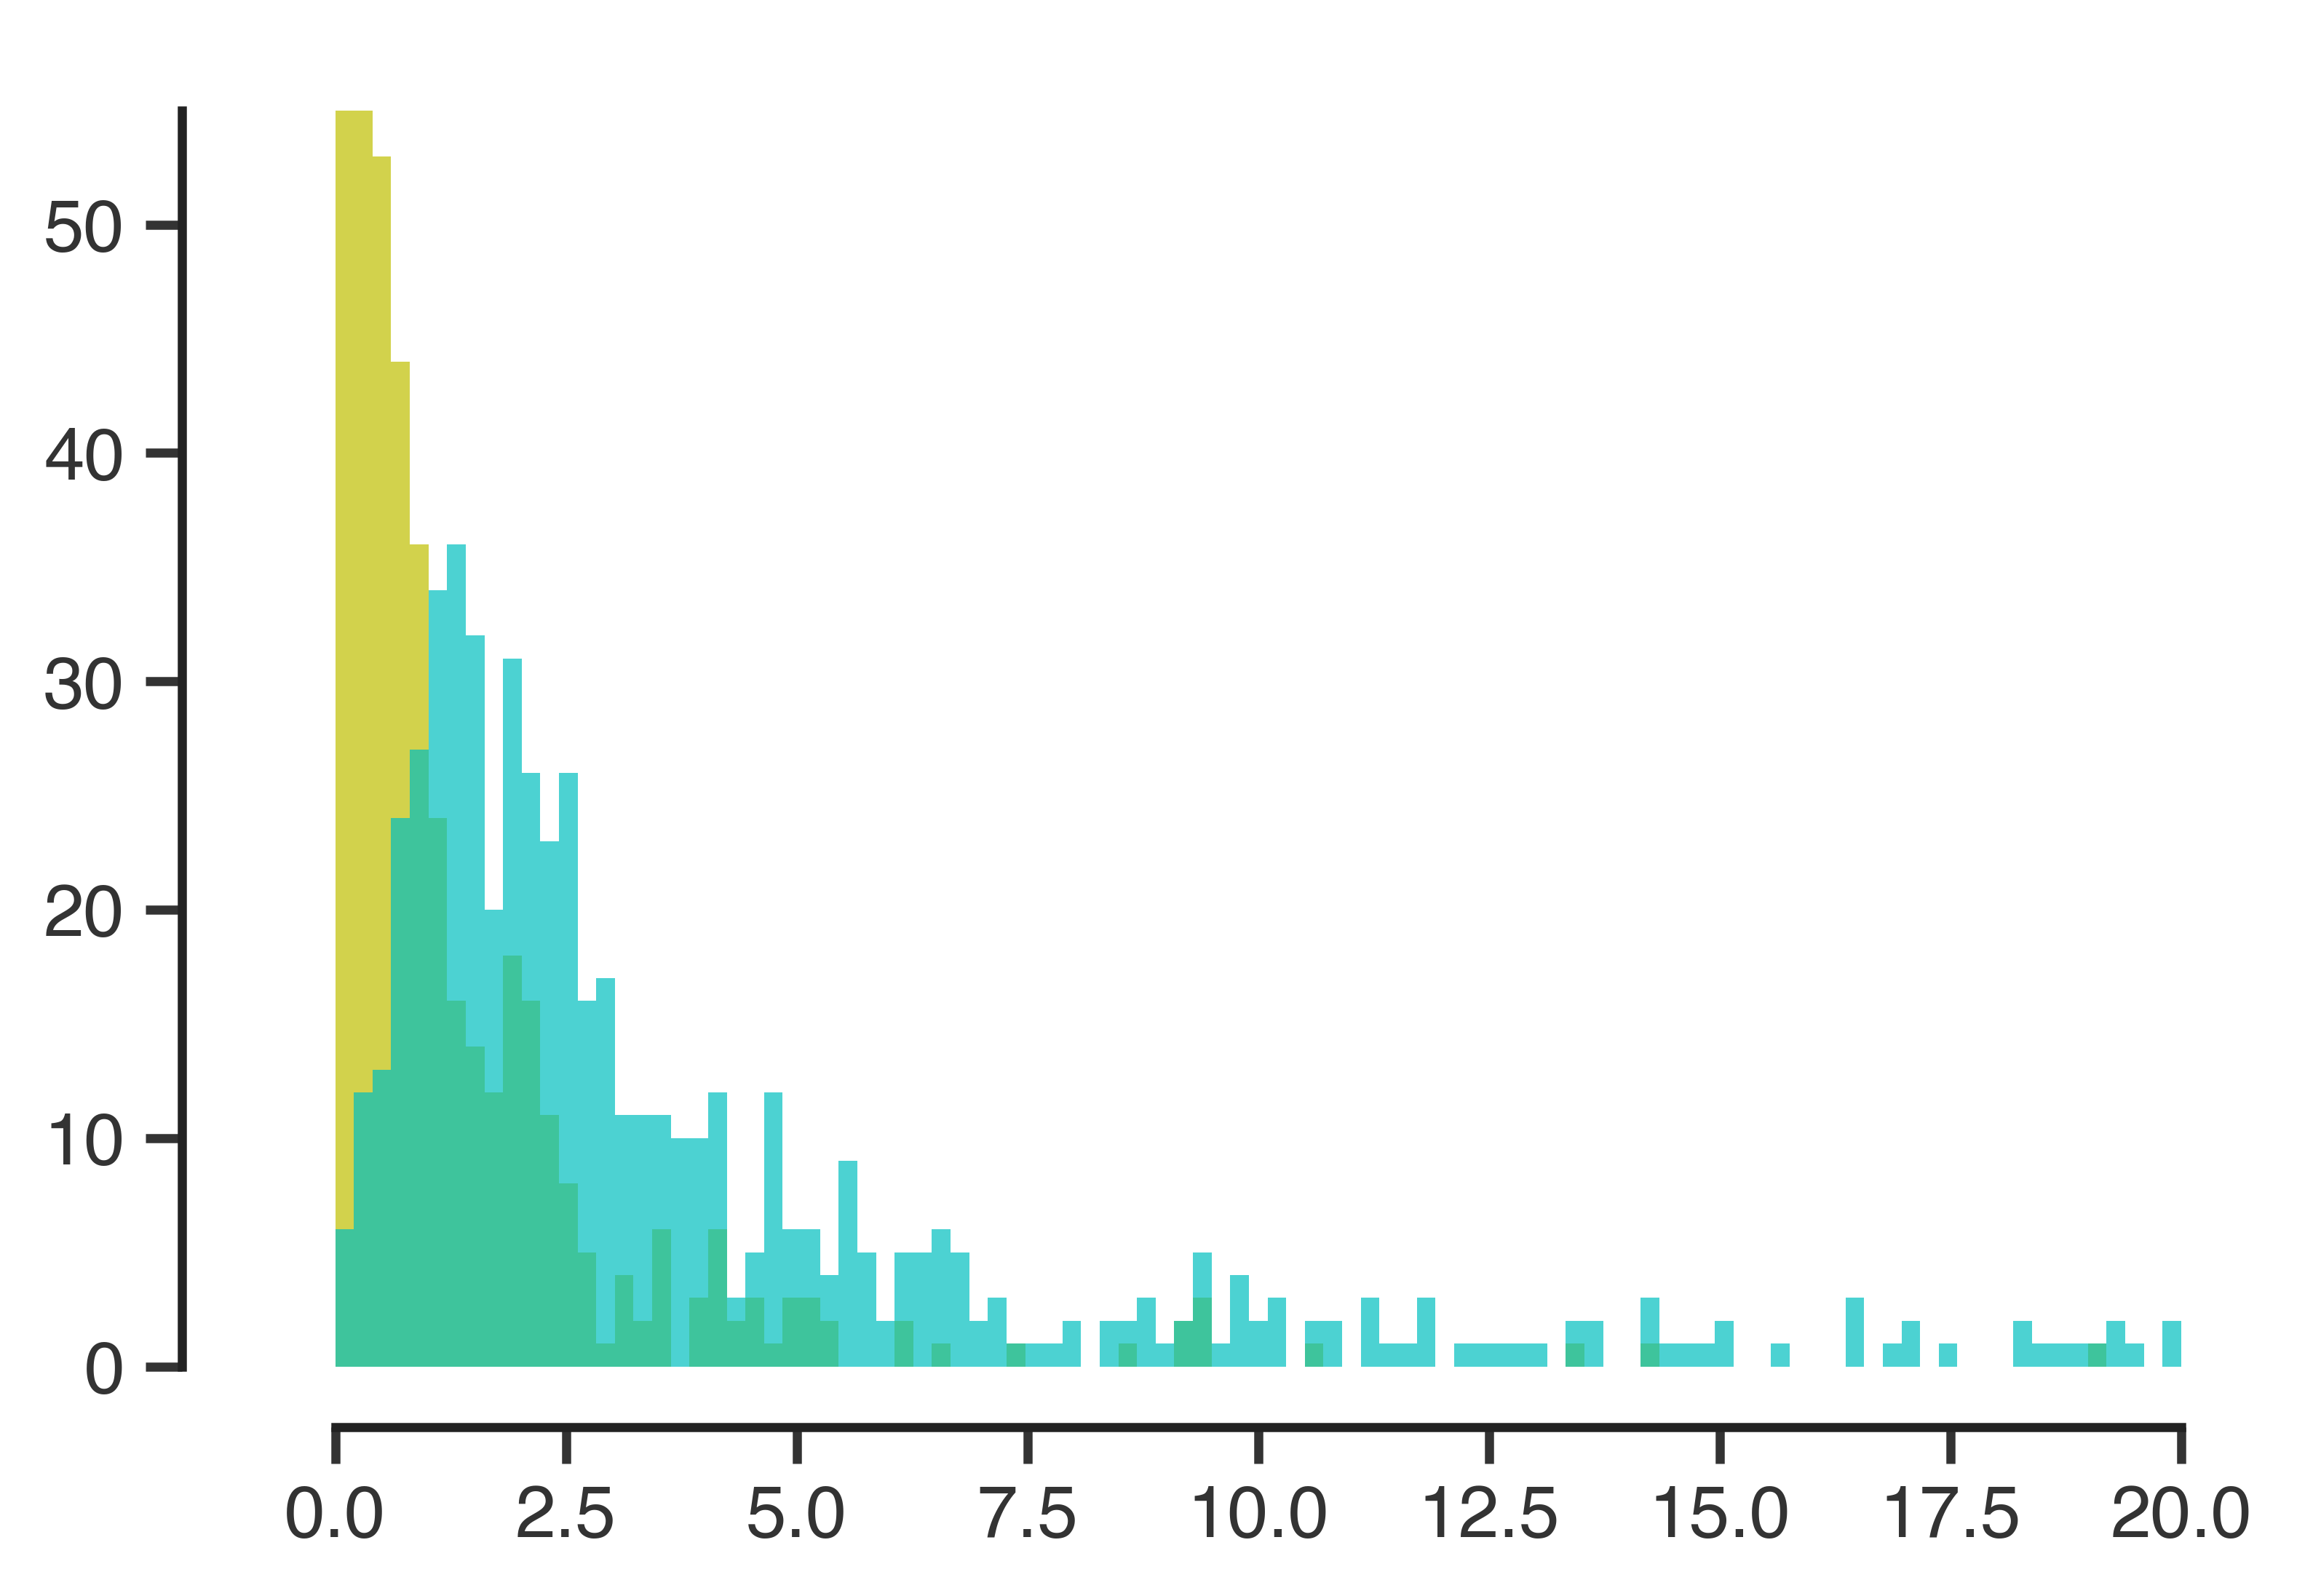

In [38]:
all_experimental_means = np.array([np.nanmean(normalized_experimental[v]) for v in variables]).flatten()
all_experimental_variances = np.array([np.nanvar(normalized_experimental[v]) for v in variables]).flatten()

# bins = np.linspace(min([min(all_experimental_means), min(all_experimental_variances)]),
#                    max([max(all_experimental_means), max(all_experimental_variances)]),500)

bins = np.linspace(0,20,100)
bin_width = np.mean(np.diff(bins))

count_means, bins = np.histogram(all_experimental_means, bins=bins)
count_variances, bins = np.histogram(all_experimental_variances, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_means, width=bin_width, color='y', alpha=0.7)
plt.bar(bins[:-1] + bin_width/2.0, count_variances, width=bin_width, color='c', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())

# negative log likelihood

\begin{align}
- \log p(\mbox{data} | \theta) &= -\log (\exp (-(x - \mu)^2/\sigma^2)) \\
&= (x - \mu)^2 / \sigma^2
\end{align}

In [39]:
import scipy.stats as ss

In [40]:
my_gaussian = ss.norm(loc=0., scale=1.)

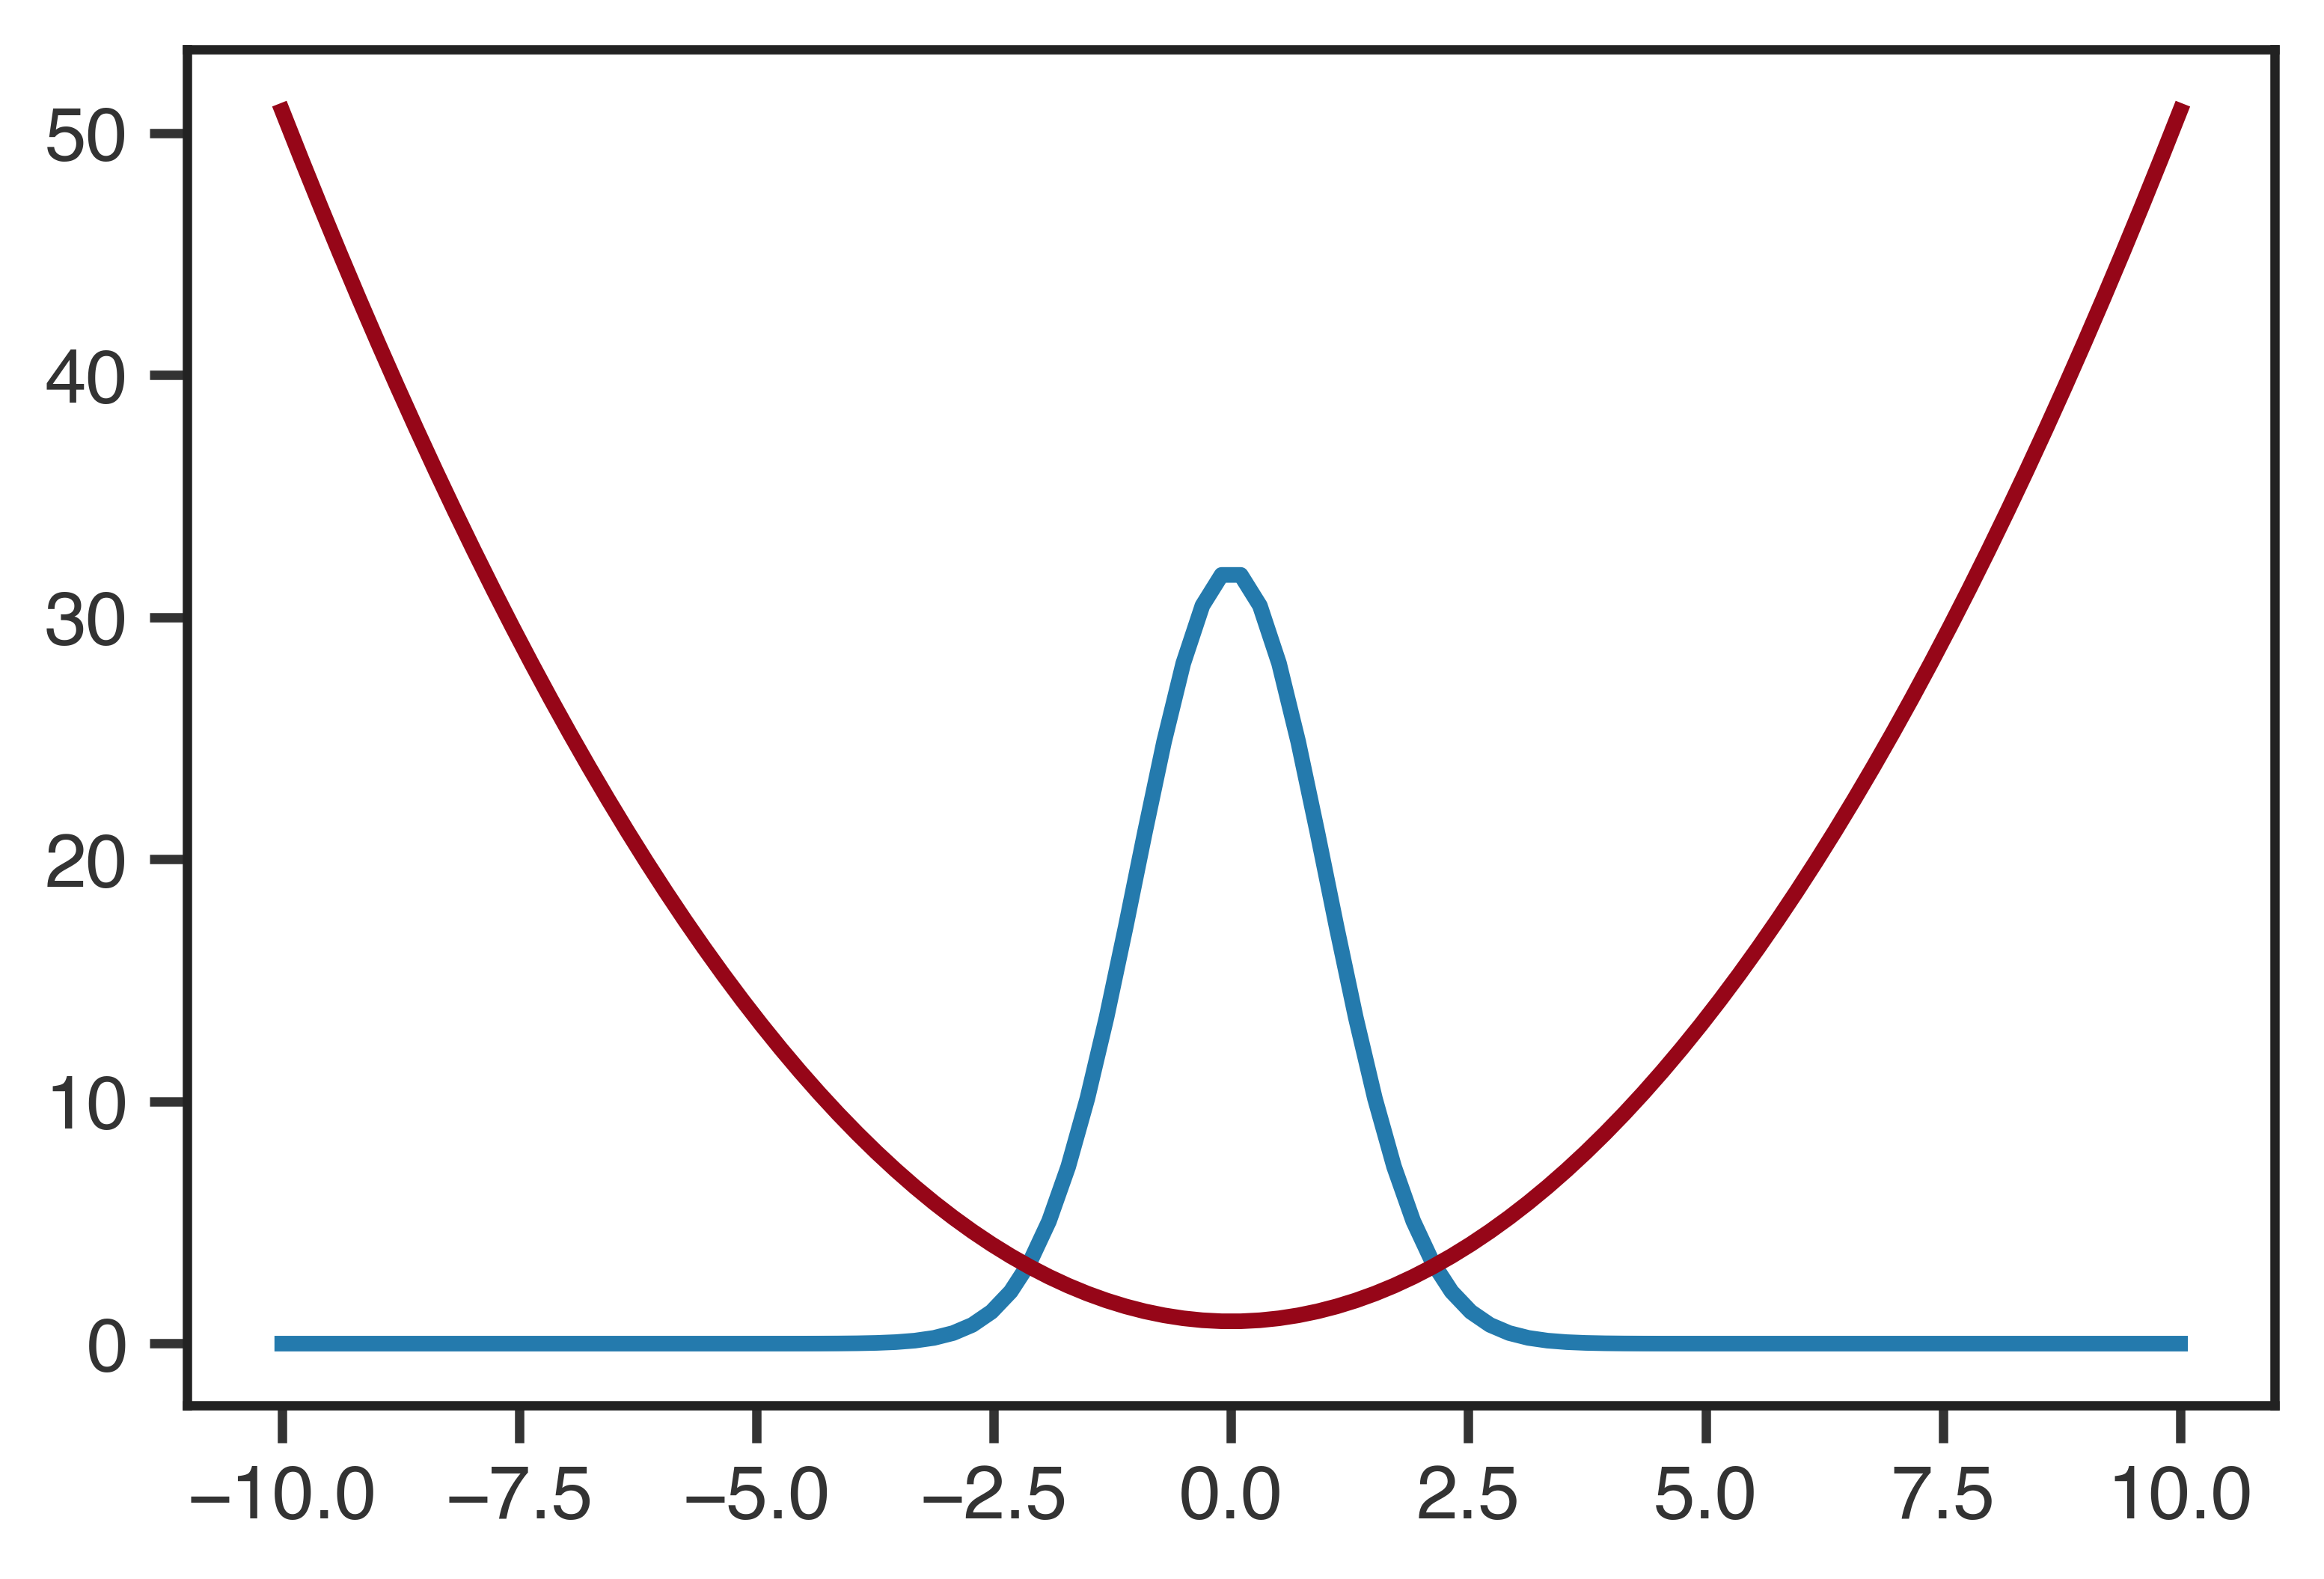

In [41]:
log_vals = [my_gaussian.logpdf([x]) for x in np.linspace(-10,10,100)]
vals = [my_gaussian.pdf([x]) for x in np.linspace(-10,10,100)]
plt.plot(np.linspace(-10,10,100), 80*np.array(vals))
plt.plot(np.linspace(-10,10,100), -np.array(log_vals))

In [42]:
np.min(-np.array(log_vals))

0.92404005345770801

In [43]:
neg_ll = collections.defaultdict(list)
# fit gaussian to control data for each variable!
# but wait, we don't have to! we already normalized
standard_normal = ss.norm(loc=0., scale=1.0)

for v in variables:
    neg_logpdf = -standard_normal.logpdf(normalized_experimental[v])
    neg_ll[v] = neg_logpdf

# Histogram of negative log likelihoods

In [44]:
neg_ll[v]

array([  1.60450753,   2.13776338,   1.92583259,   1.99444019,
         0.96654743,   1.31074962,   1.01090836,   0.95851482,
         1.10280451,   2.14384509,   1.108883  ,   1.64455731,
         1.1574732 ,   1.58790562,   1.48380406,   1.59794309,
         2.25166629,   2.08634965,   2.01738465,   0.93742677,
         1.07014342,   1.0499481 ,   2.05551175,   0.96929587,
         0.95635601,   1.00471298,   1.37725908,   1.4538869 ,
         1.38099141,   1.14664609,   3.40285051,   2.11313076,
         0.96535451,   1.42318312,   0.97771495,  20.38448898,
        26.39569014,  15.63468054,  20.28751264,  20.09696352,
        37.01676476,   4.72211642,  20.15054403,  36.45699387,
         5.01857302,  22.4769333 ,  38.51212853,  14.82989741,
        11.68408007,  33.88501382,   6.94058975,  11.46854636,
         3.54352812,   3.50406234,   5.25330554,   2.54447623,
         3.41925657,   1.54140066,   1.80649001,   6.78410587,
         7.74272786,   2.02657607,  17.80085592,   3.45

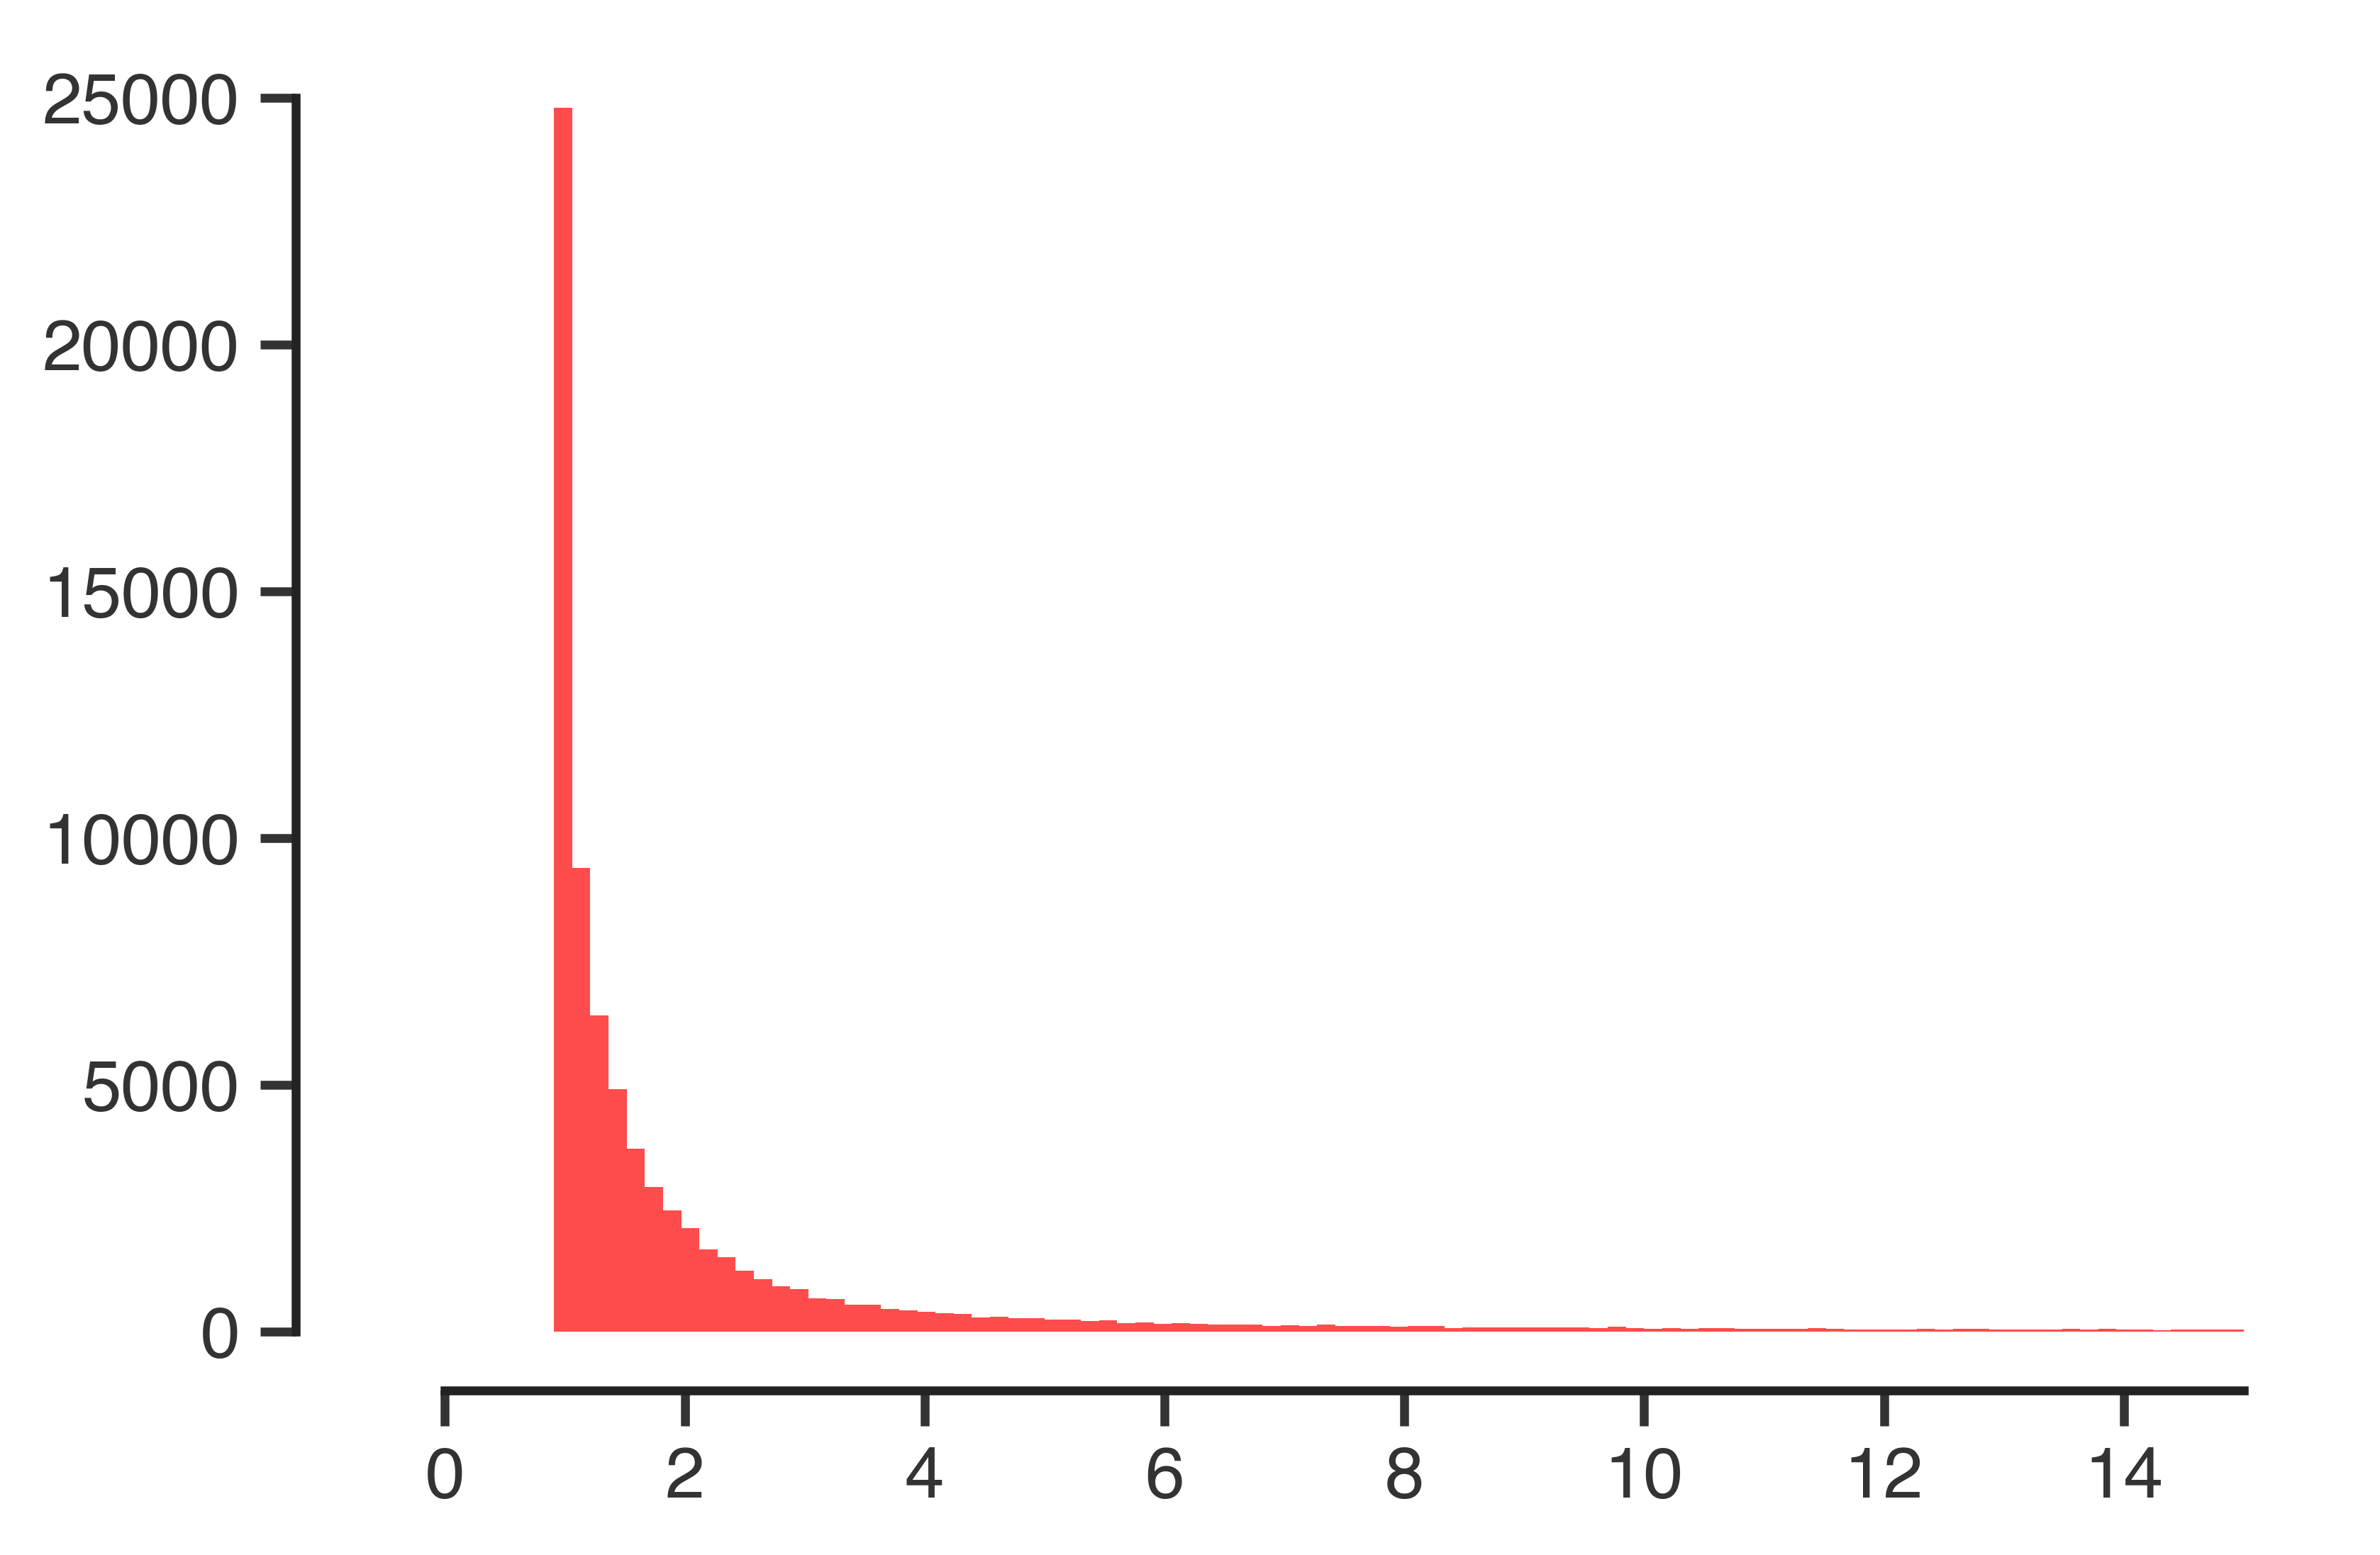

In [45]:
all_nlls = np.array([neg_ll[v] for v in variables]).flatten()

bins = np.linspace(0,15,100)
count, bins = np.histogram(all_nlls, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())

# Sum of log likelihoods (aka product of likelihoods)  
(and max)

In [46]:
sum_neg_ll = collections.defaultdict(list)
max_neg_ll = collections.defaultdict(list)
# fit gaussian to control data for each variable!
# but wait, we don't have to! we already normalized
standard_normal = ss.norm(loc=0., scale=1.0)

for v in variables:
    neg_logpdf = -standard_normal.logpdf(normalized_experimental[v])
    sum_neg_ll[v] = np.sum(neg_logpdf)
    max_neg_ll[v] = np.max(neg_logpdf)

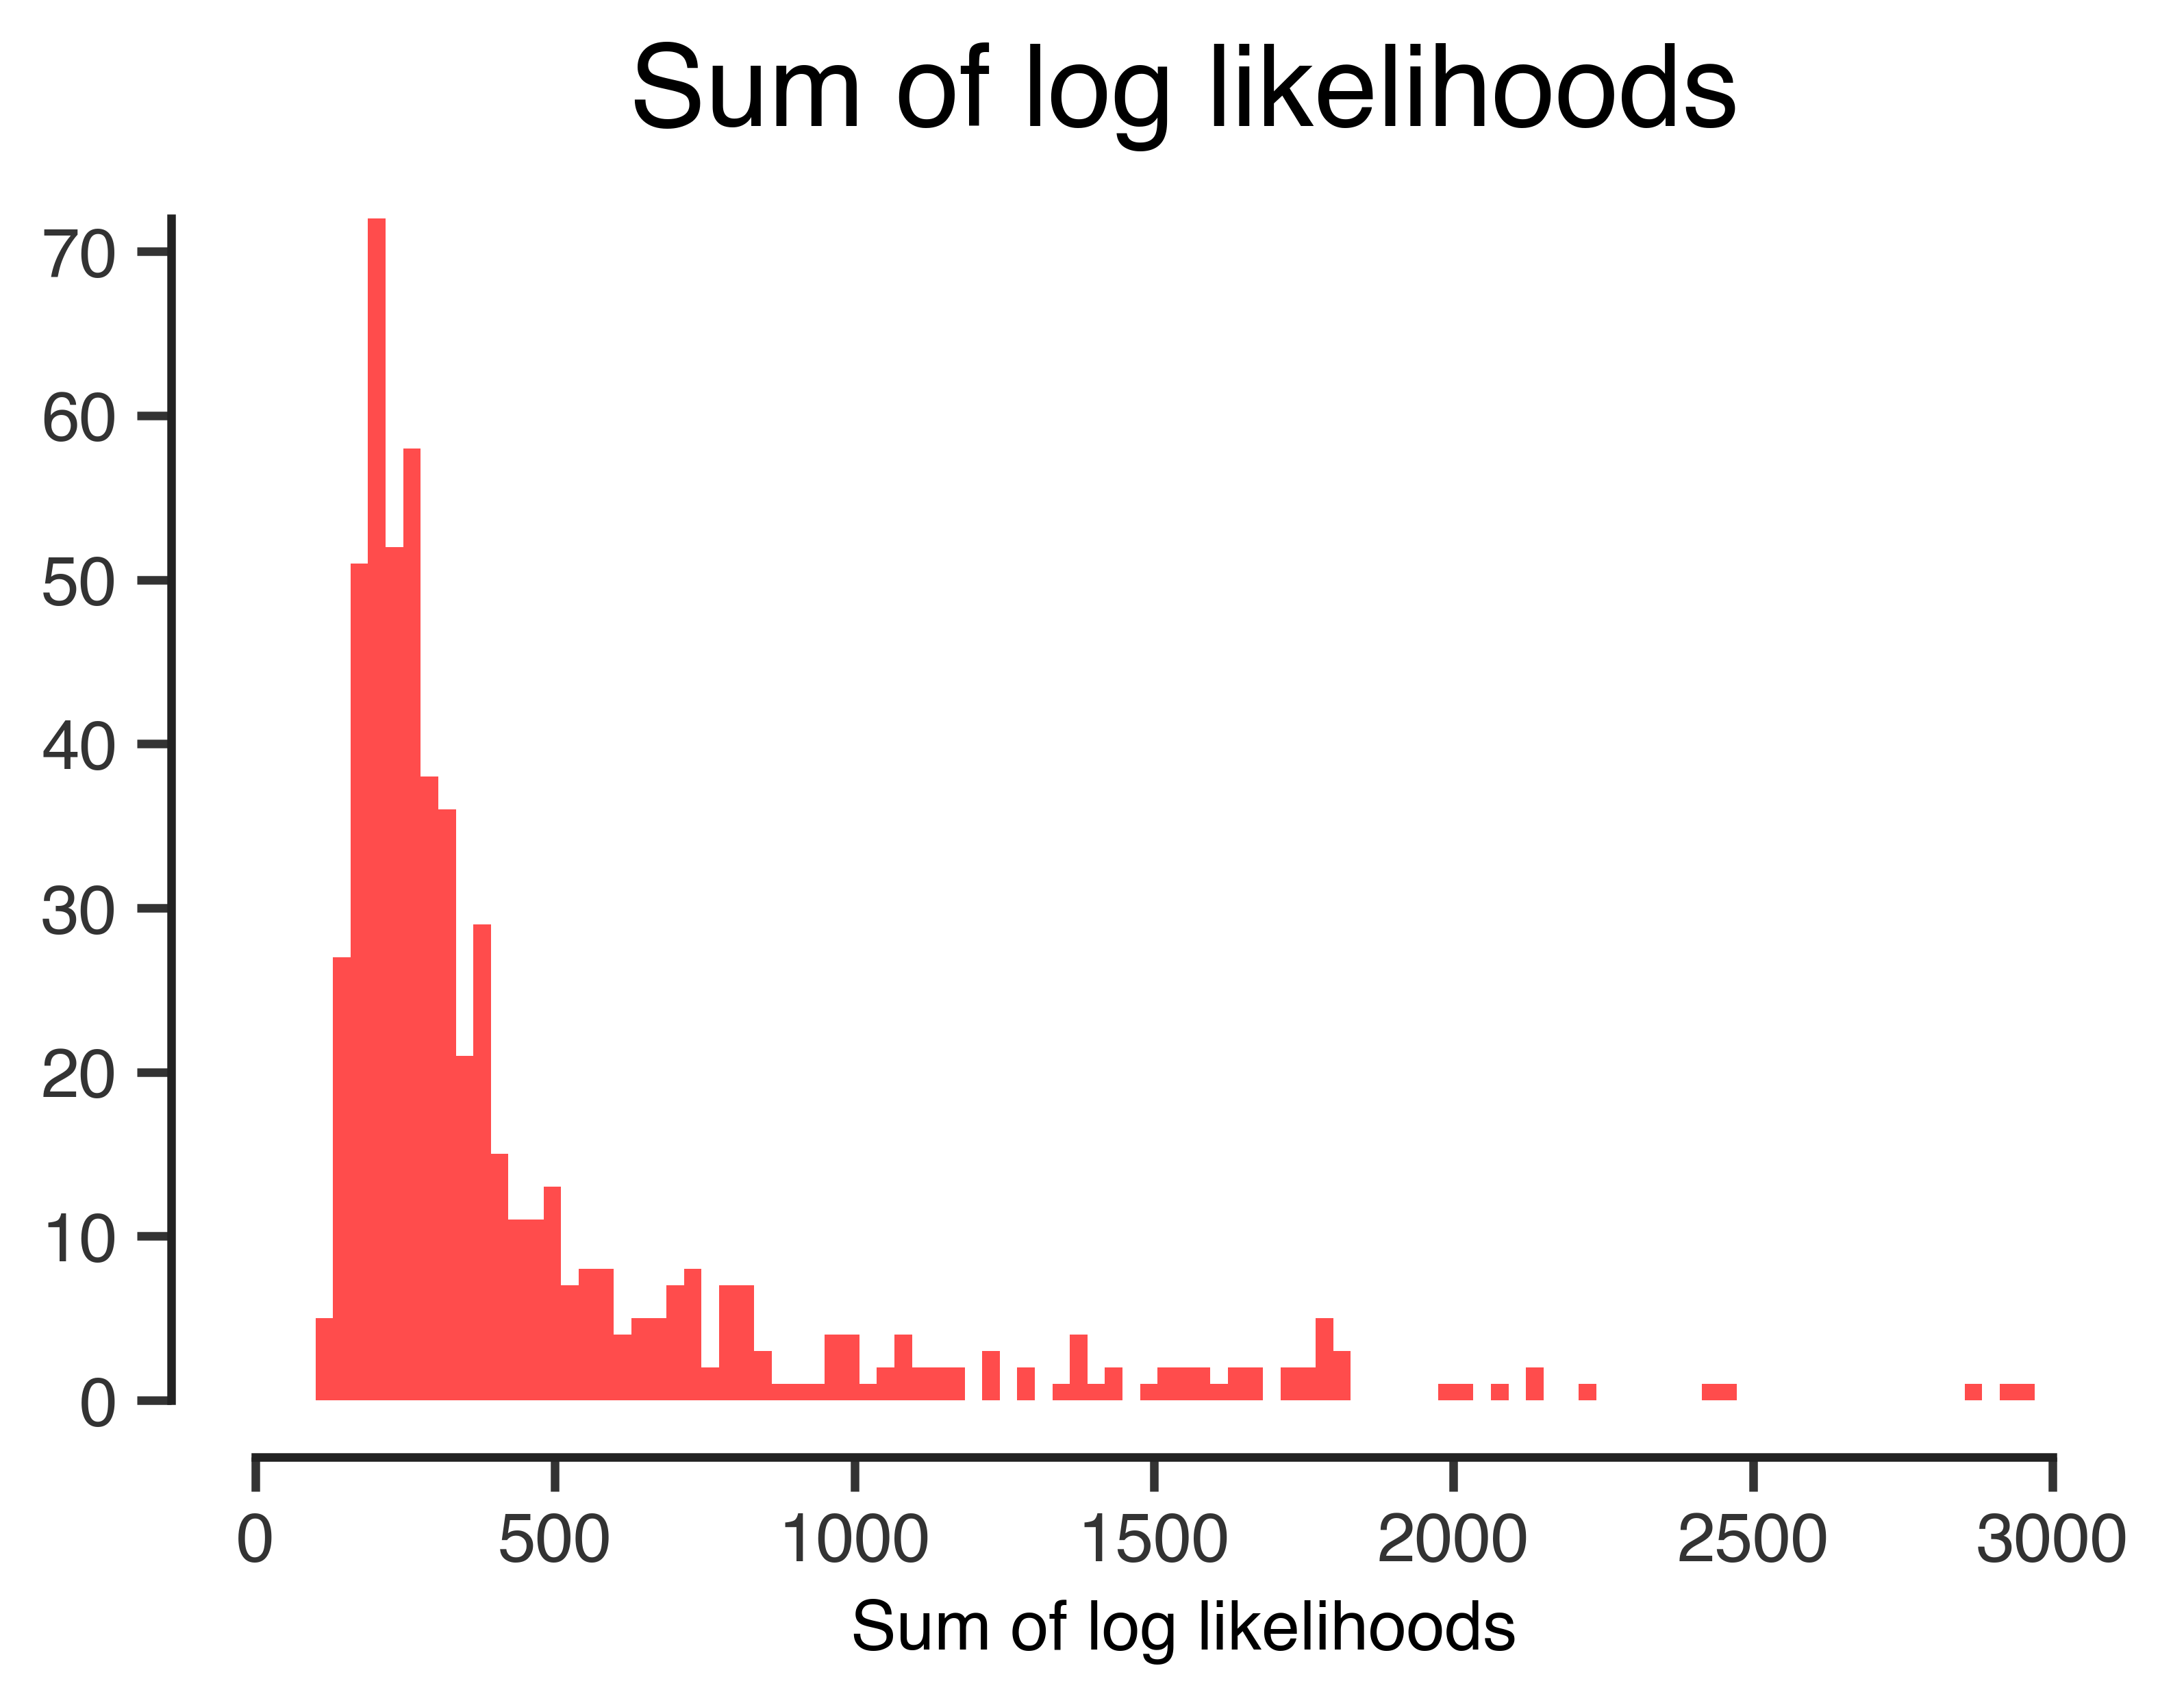

In [47]:
sum_nlls = np.array([sum_neg_ll[v] for v in variables]).flatten()
# max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()


bins = np.linspace(100,3000,100)
count, bins = np.histogram(sum_nlls, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Sum of log likelihoods')
plt.xlabel('Sum of log likelihoods')

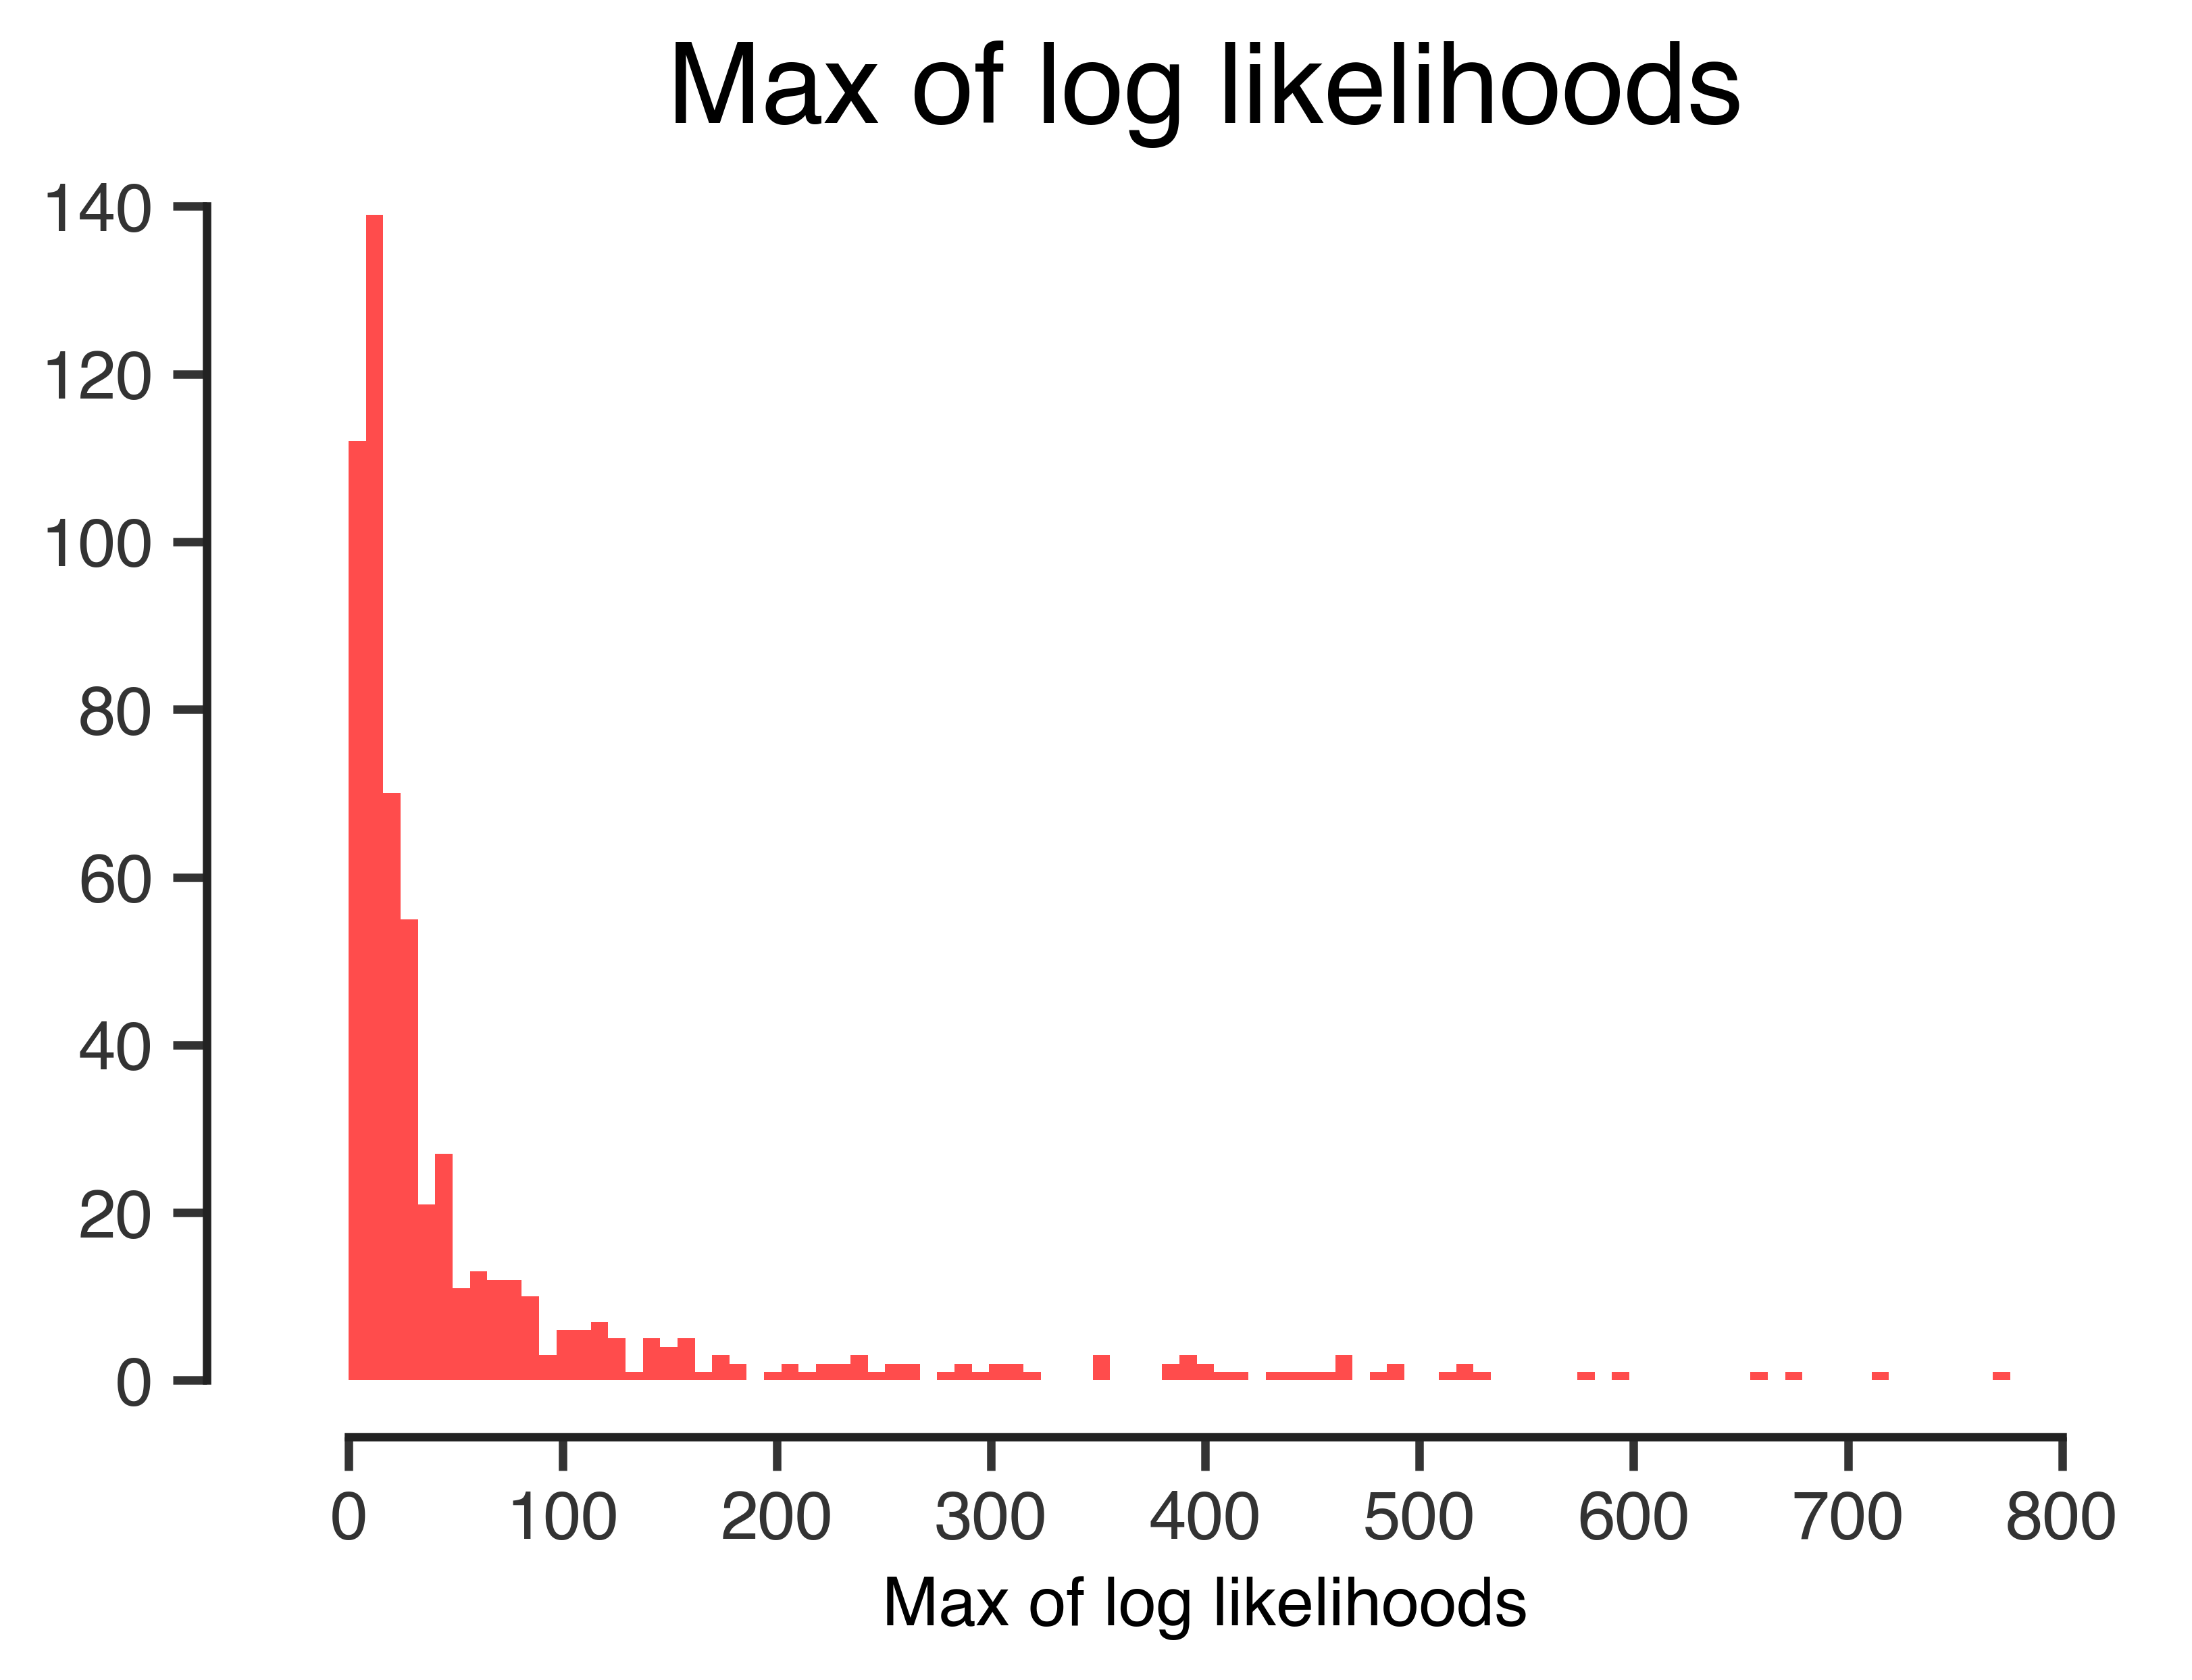

In [48]:
max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()
# max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()


bins = np.linspace(0,800,100)
count, bins = np.histogram(max_nlls, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Max of log likelihoods')
plt.xlabel('Max of log likelihoods')

In [49]:
import operator

In [50]:
least_likely_data = sorted(sum_neg_ll.items(), key=operator.itemgetter(1), reverse=True)

In [51]:
for i in range(10):
    print(least_likely_data[i])

('itaconate', 810230.33516927483)
('ALT', 214907.65286574414)
('IFN-g', 160192.35013916669)
('Erythrocyte-B', 114381.71793760544)
('AST', 59145.876309140127)
('orotate', 39470.331234565077)
('MCP-1', 33171.656903271105)
('methylsuccinate', 28122.900710049842)
('g/d T Cells', 26715.801465181976)
('IL-12P70', 23474.289876918501)


In [52]:
least_likely_max_data = sorted(max_neg_ll.items(), key=operator.itemgetter(1), reverse=True)

In [53]:
for i in range(10):
    print(least_likely_max_data[i])

('ALT', 82133.847392006996)
('itaconate', 80561.748939807425)
('IFN-g', 30139.139566754569)
('AST', 25417.025016032429)
('IL-23', 19815.170565516546)
('IL-2', 16697.116178945191)
('IL-12P70', 11358.393886147958)
('formiminoglutamate', 10472.459249917343)
('Erythrocyte-B', 9100.3874418751966)
('IL-3', 7689.5385224384036)


# Part 2

## Look at distribution of control - is it normal?

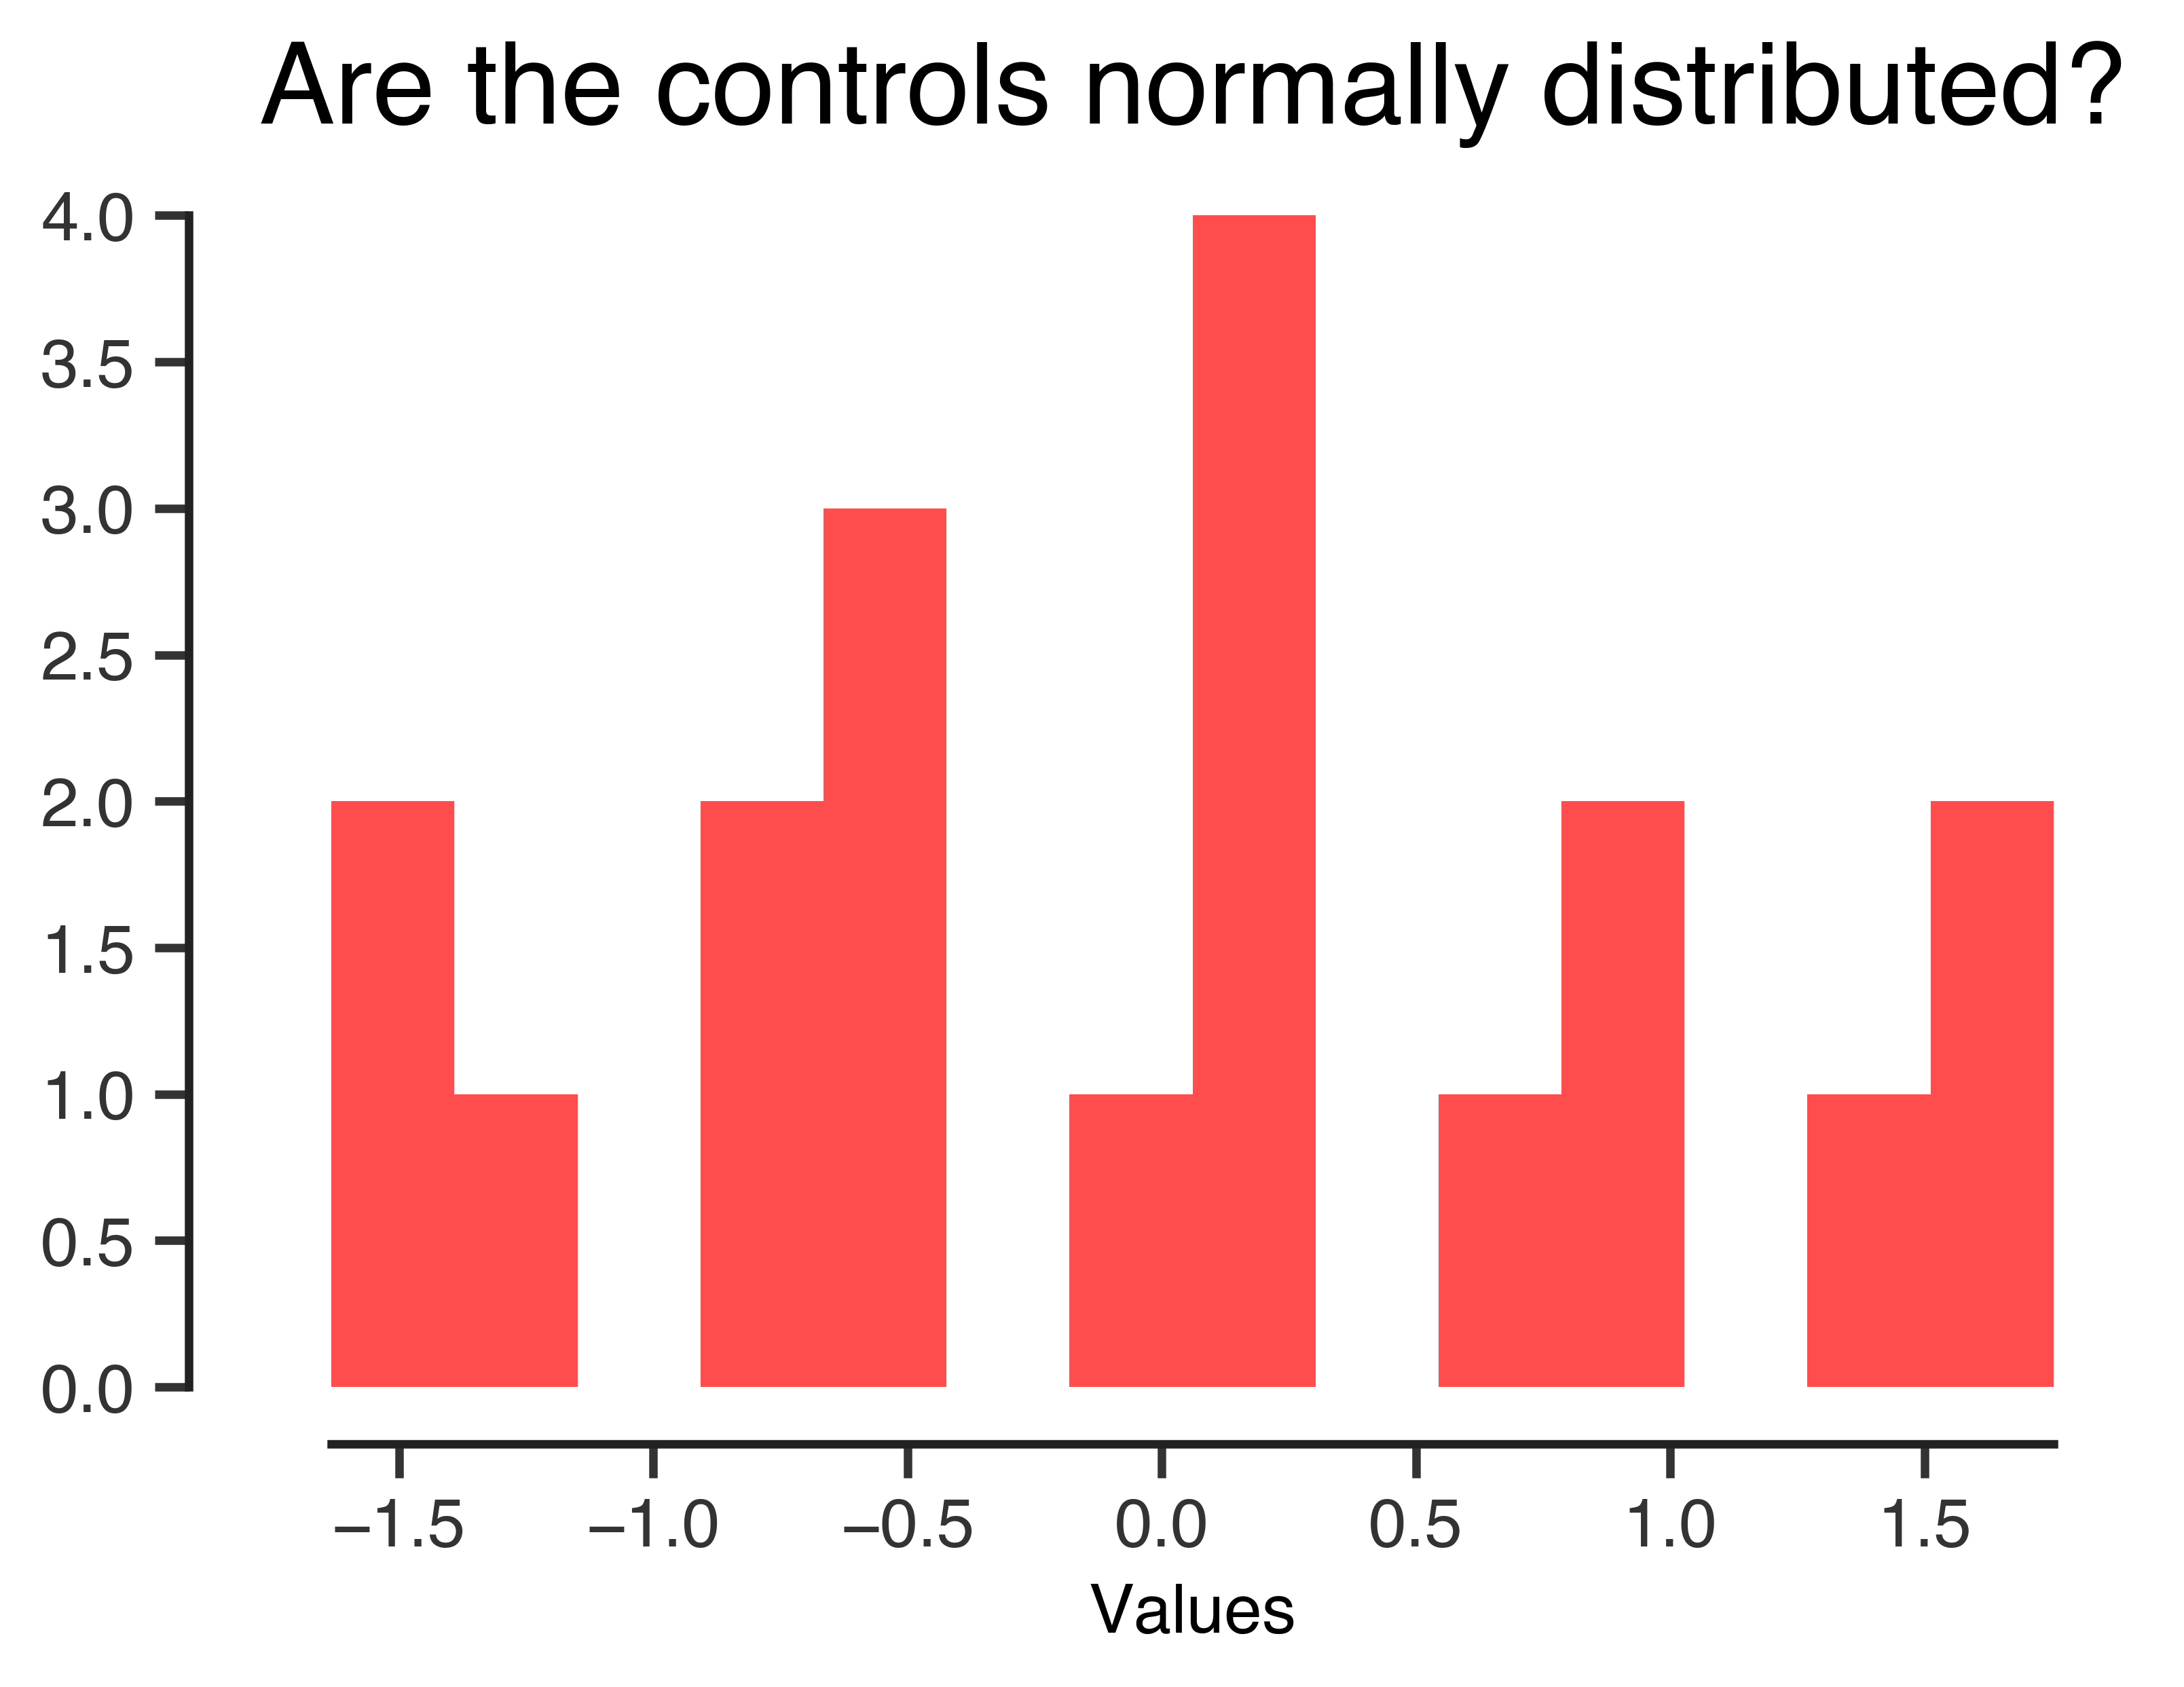

In [54]:
this_var = normalized_control[v]
this_var = this_var[~np.isnan(this_var)]
bins = np.linspace(np.nanmin(this_var),np.nanmax(this_var),15)

count, bins = np.histogram(this_var, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Are the controls normally distributed?')
plt.xlabel('Values')

In [61]:
this_var = normalized_control[v]
this_var = this_var[~np.isnan(this_var)]
this_fit = ss.gamma.fit(this_var)
print(this_fit)

(426.33721972589547, -20.631836995571874, 0.048393224330355977)


In [69]:
ss.gamma.pdf(this_var, *this_fit)

array([ 0.38909239,  0.10586435,  0.39108289,  0.35378424,  0.10586435,
        0.16366586,  0.25674923,  0.17713721,  0.08565318,  0.39809009,
        0.31817153,  0.39180302,  0.35704058,  0.29127229,  0.34559216,
        0.10572524,  0.39657844,  0.29659534,  0.23378167])

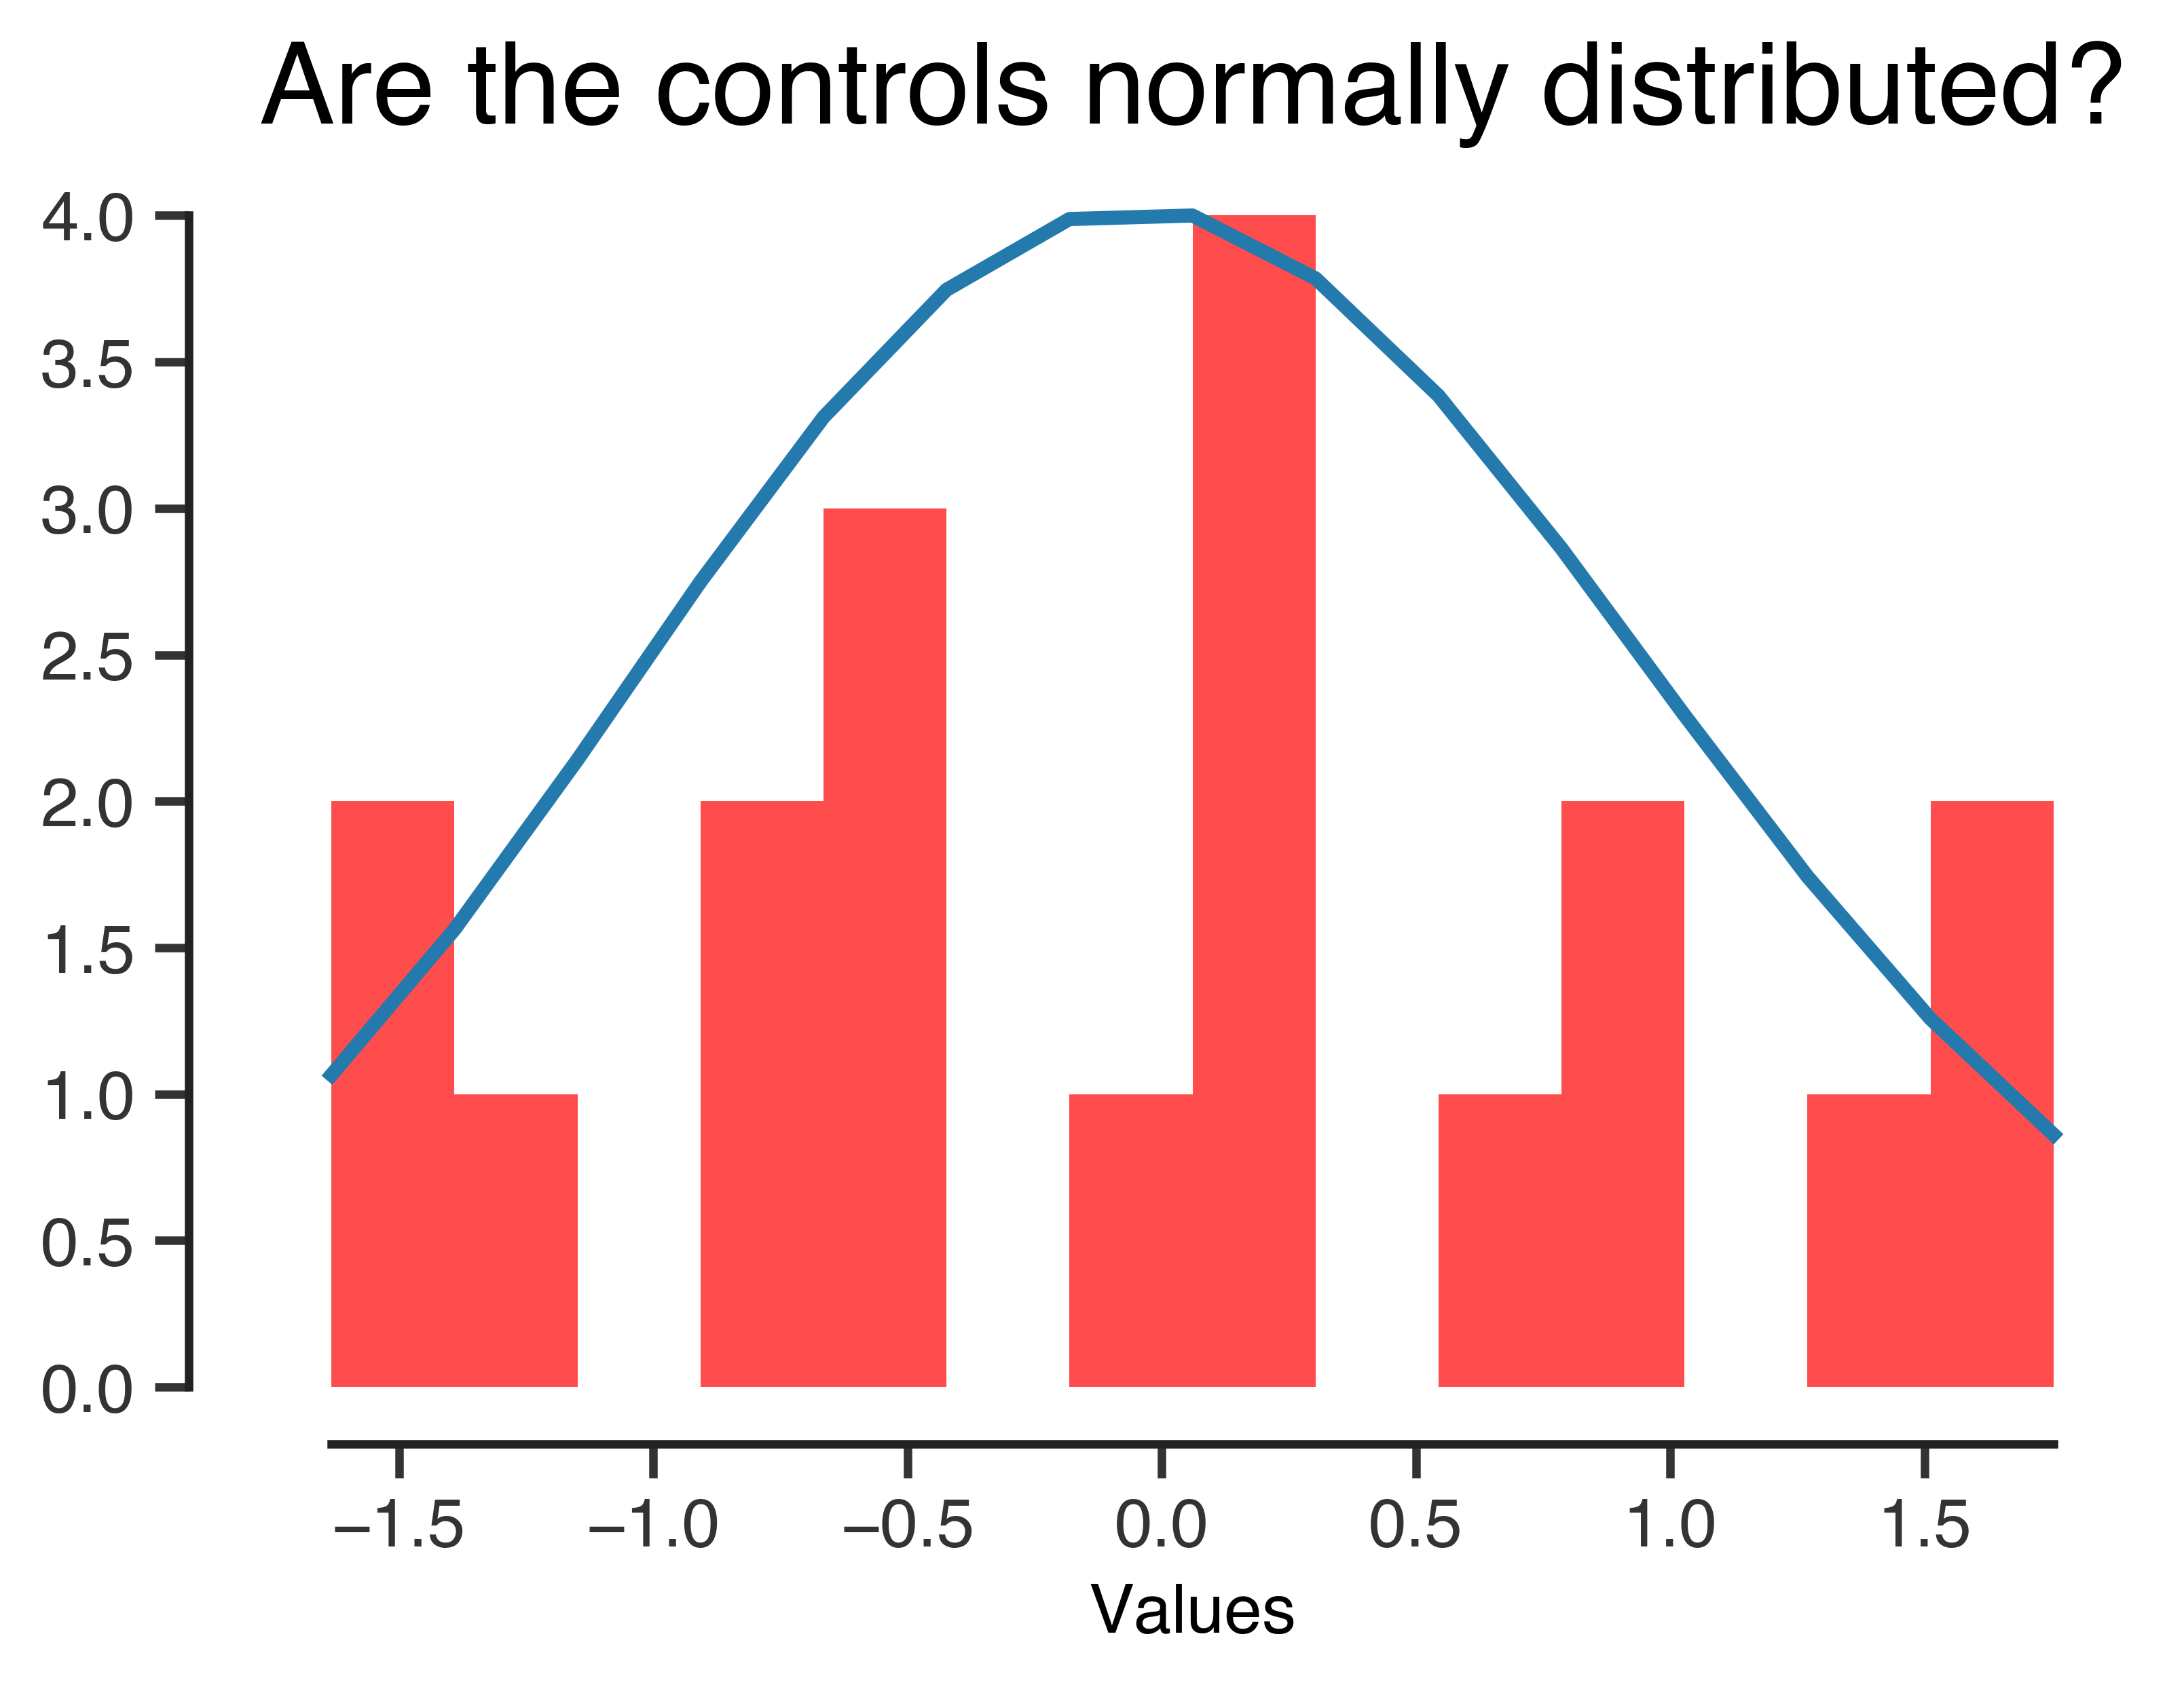

In [71]:
this_var = normalized_control[v]
this_var = this_var[~np.isnan(this_var)]

# fit it!
this_fit = ss.gamma.fit(this_var)
bins = np.linspace(np.nanmin(this_var),np.nanmax(this_var),15)
probs = ss.gamma.pdf(bins, *this_fit)

count, bins = np.histogram(this_var, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Are the controls normally distributed?')
plt.xlabel('Values')

# plt.plot(bins, probs, 'c')
plt.plot(bins, probs*np.max(count)/np.max(probs))

In [72]:
gamma_log_likelihoods = collections.defaultdict(list)
normal_log_likelihoods = collections.defaultdict(list)
for v in variables:
    this_var = normalized_control[v]
    this_var = this_var[~np.isnan(this_var)]
    gamma_fit = ss.gamma.fit(this_var)
    normal_fit = ss.norm.fit(this_var)
    
    gamma_log_likelihoods[v] = ss.gamma.logpdf(this_var, *gamma_fit)
    normal_log_likelihoods[v] = ss.norm.logpdf(this_var, *normal_fit)

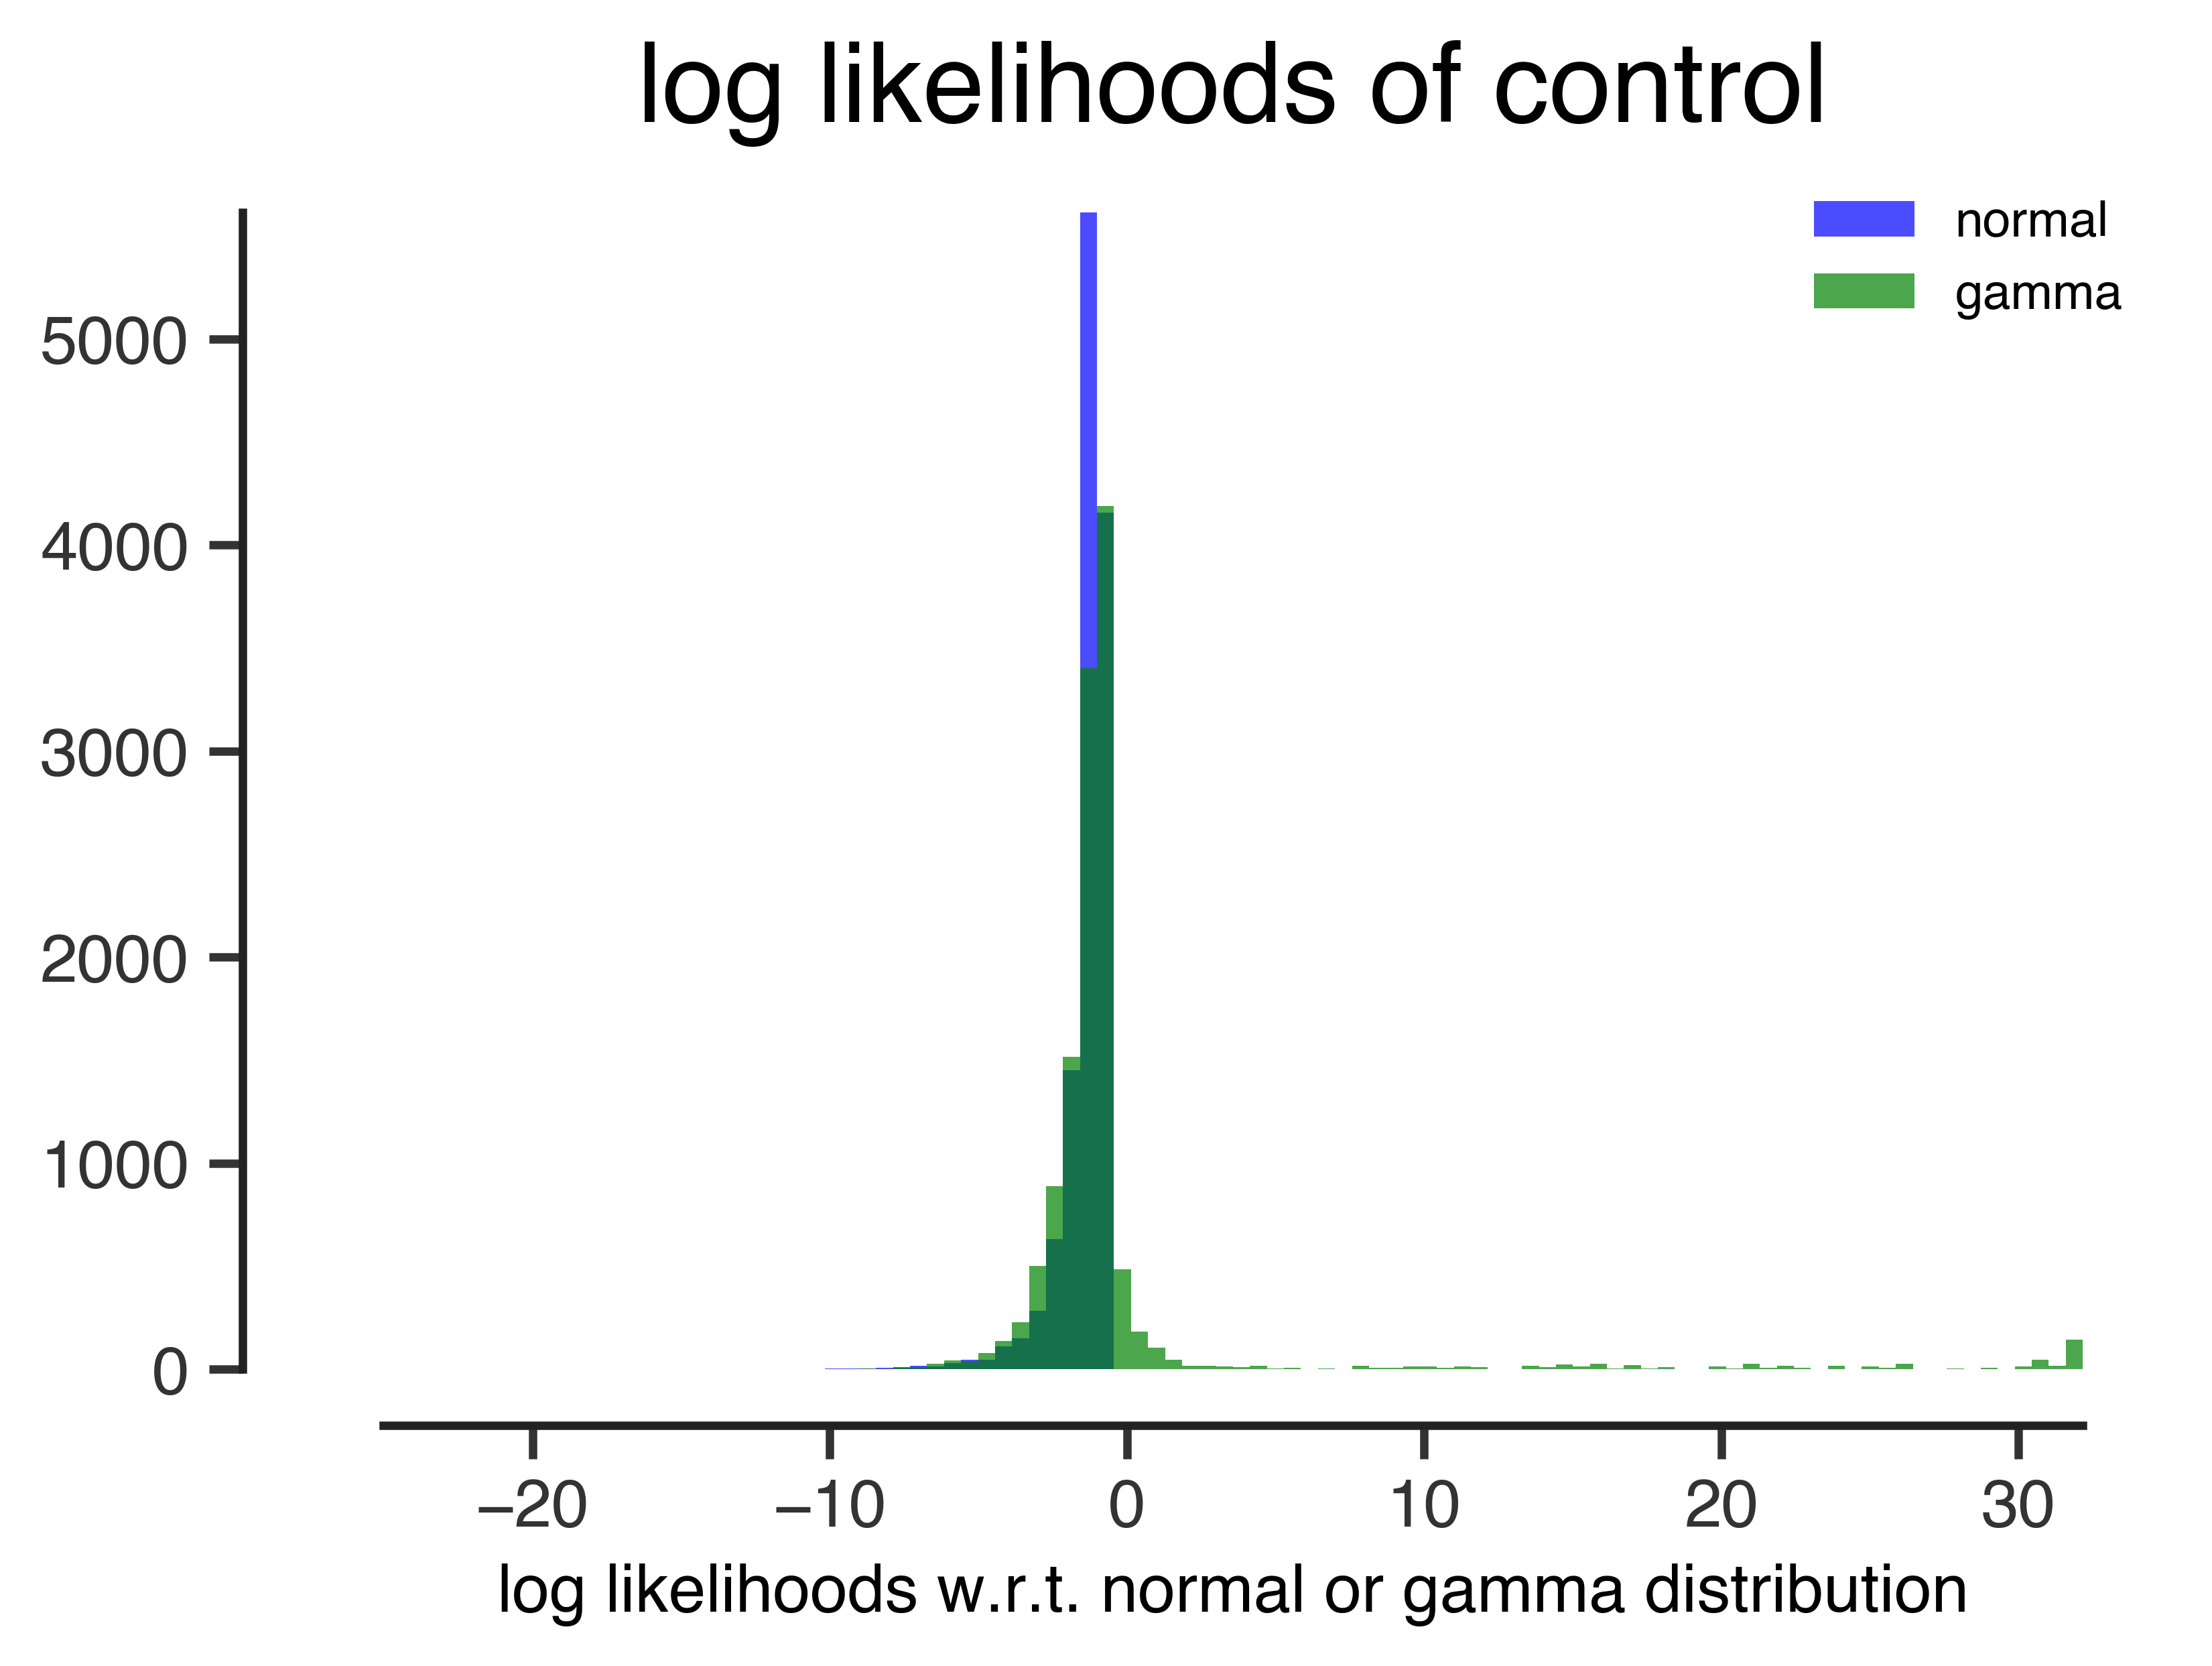

In [89]:
gamma_lls = []
normal_lls = []
for v in variables:
    gamma_lls.extend(gamma_log_likelihoods[v])
    normal_lls.extend(normal_log_likelihoods[v])

# bins = np.linspace(-7,0,100)
gamma_count, bins = np.histogram(gamma_lls, bins=100)
normal_count, bins = np.histogram(normal_lls, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, normal_count, width=bin_width, color='b', alpha=0.7, label='normal')
plt.bar(bins[:-1] + bin_width/2.0, gamma_count, width=bin_width, color='g', alpha=0.7, label='gamma')
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('log likelihoods of control')
plt.xlabel('log likelihoods w.r.t. normal or gamma distribution')
plt.legend(frameon=False, fontsize=9)

In [85]:
print('Gamma distribution has mean %0.2f and median %0.2f log likelihood' %(np.mean(gamma_lls), np.median(gamma_lls)))
print('Normal distribution has mean %0.2f and median %0.2f log likelihood' %(np.mean(normal_lls), np.median(normal_lls)))

Gamma distribution has mean -0.23 and median -1.06 log likelihood
Normal distribution has mean -1.42 and median -1.13 log likelihood


In [86]:
print('Gamma distribution has max %0.2f and min %0.2f log likelihood' %(np.max(gamma_lls), np.min(gamma_lls)))
print('Normal distribution has max %0.2f and min %0.2f log likelihood' %(np.max(normal_lls), np.min(normal_lls)))

Gamma distribution has max 32.16 and min -25.03 log likelihood
Normal distribution has max -0.92 and min -28.92 log likelihood


In [90]:
np.sum(gamma_lls)

-2858.6185480127051

In [91]:
np.sum(normal_lls)

-17847.408870648374

## Print list of experimental variables w.r.t. gamma distribution

In [115]:
gamma_sum_neg_ll = collections.defaultdict(list)
gamma_max_neg_ll = collections.defaultdict(list)
# fit gaussian to control data for each variable!
# but wait, we don't have to! we already normalized
# standard_normal = ss.norm(loc=0., scale=1.0)

for v in variables:
    these_vals = normalized_control[v]
    these_vals = these_vals[~np.isnan(these_vals)]
    this_gamma = ss.gamma.fit(these_vals)
    neg_logpdf = -ss.gamma.logpdf(normalized_experimental[v], *this_gamma)
    gamma_sum_neg_ll[v] = np.sum(neg_logpdf)
    gamma_max_neg_ll[v] = np.max(neg_logpdf)

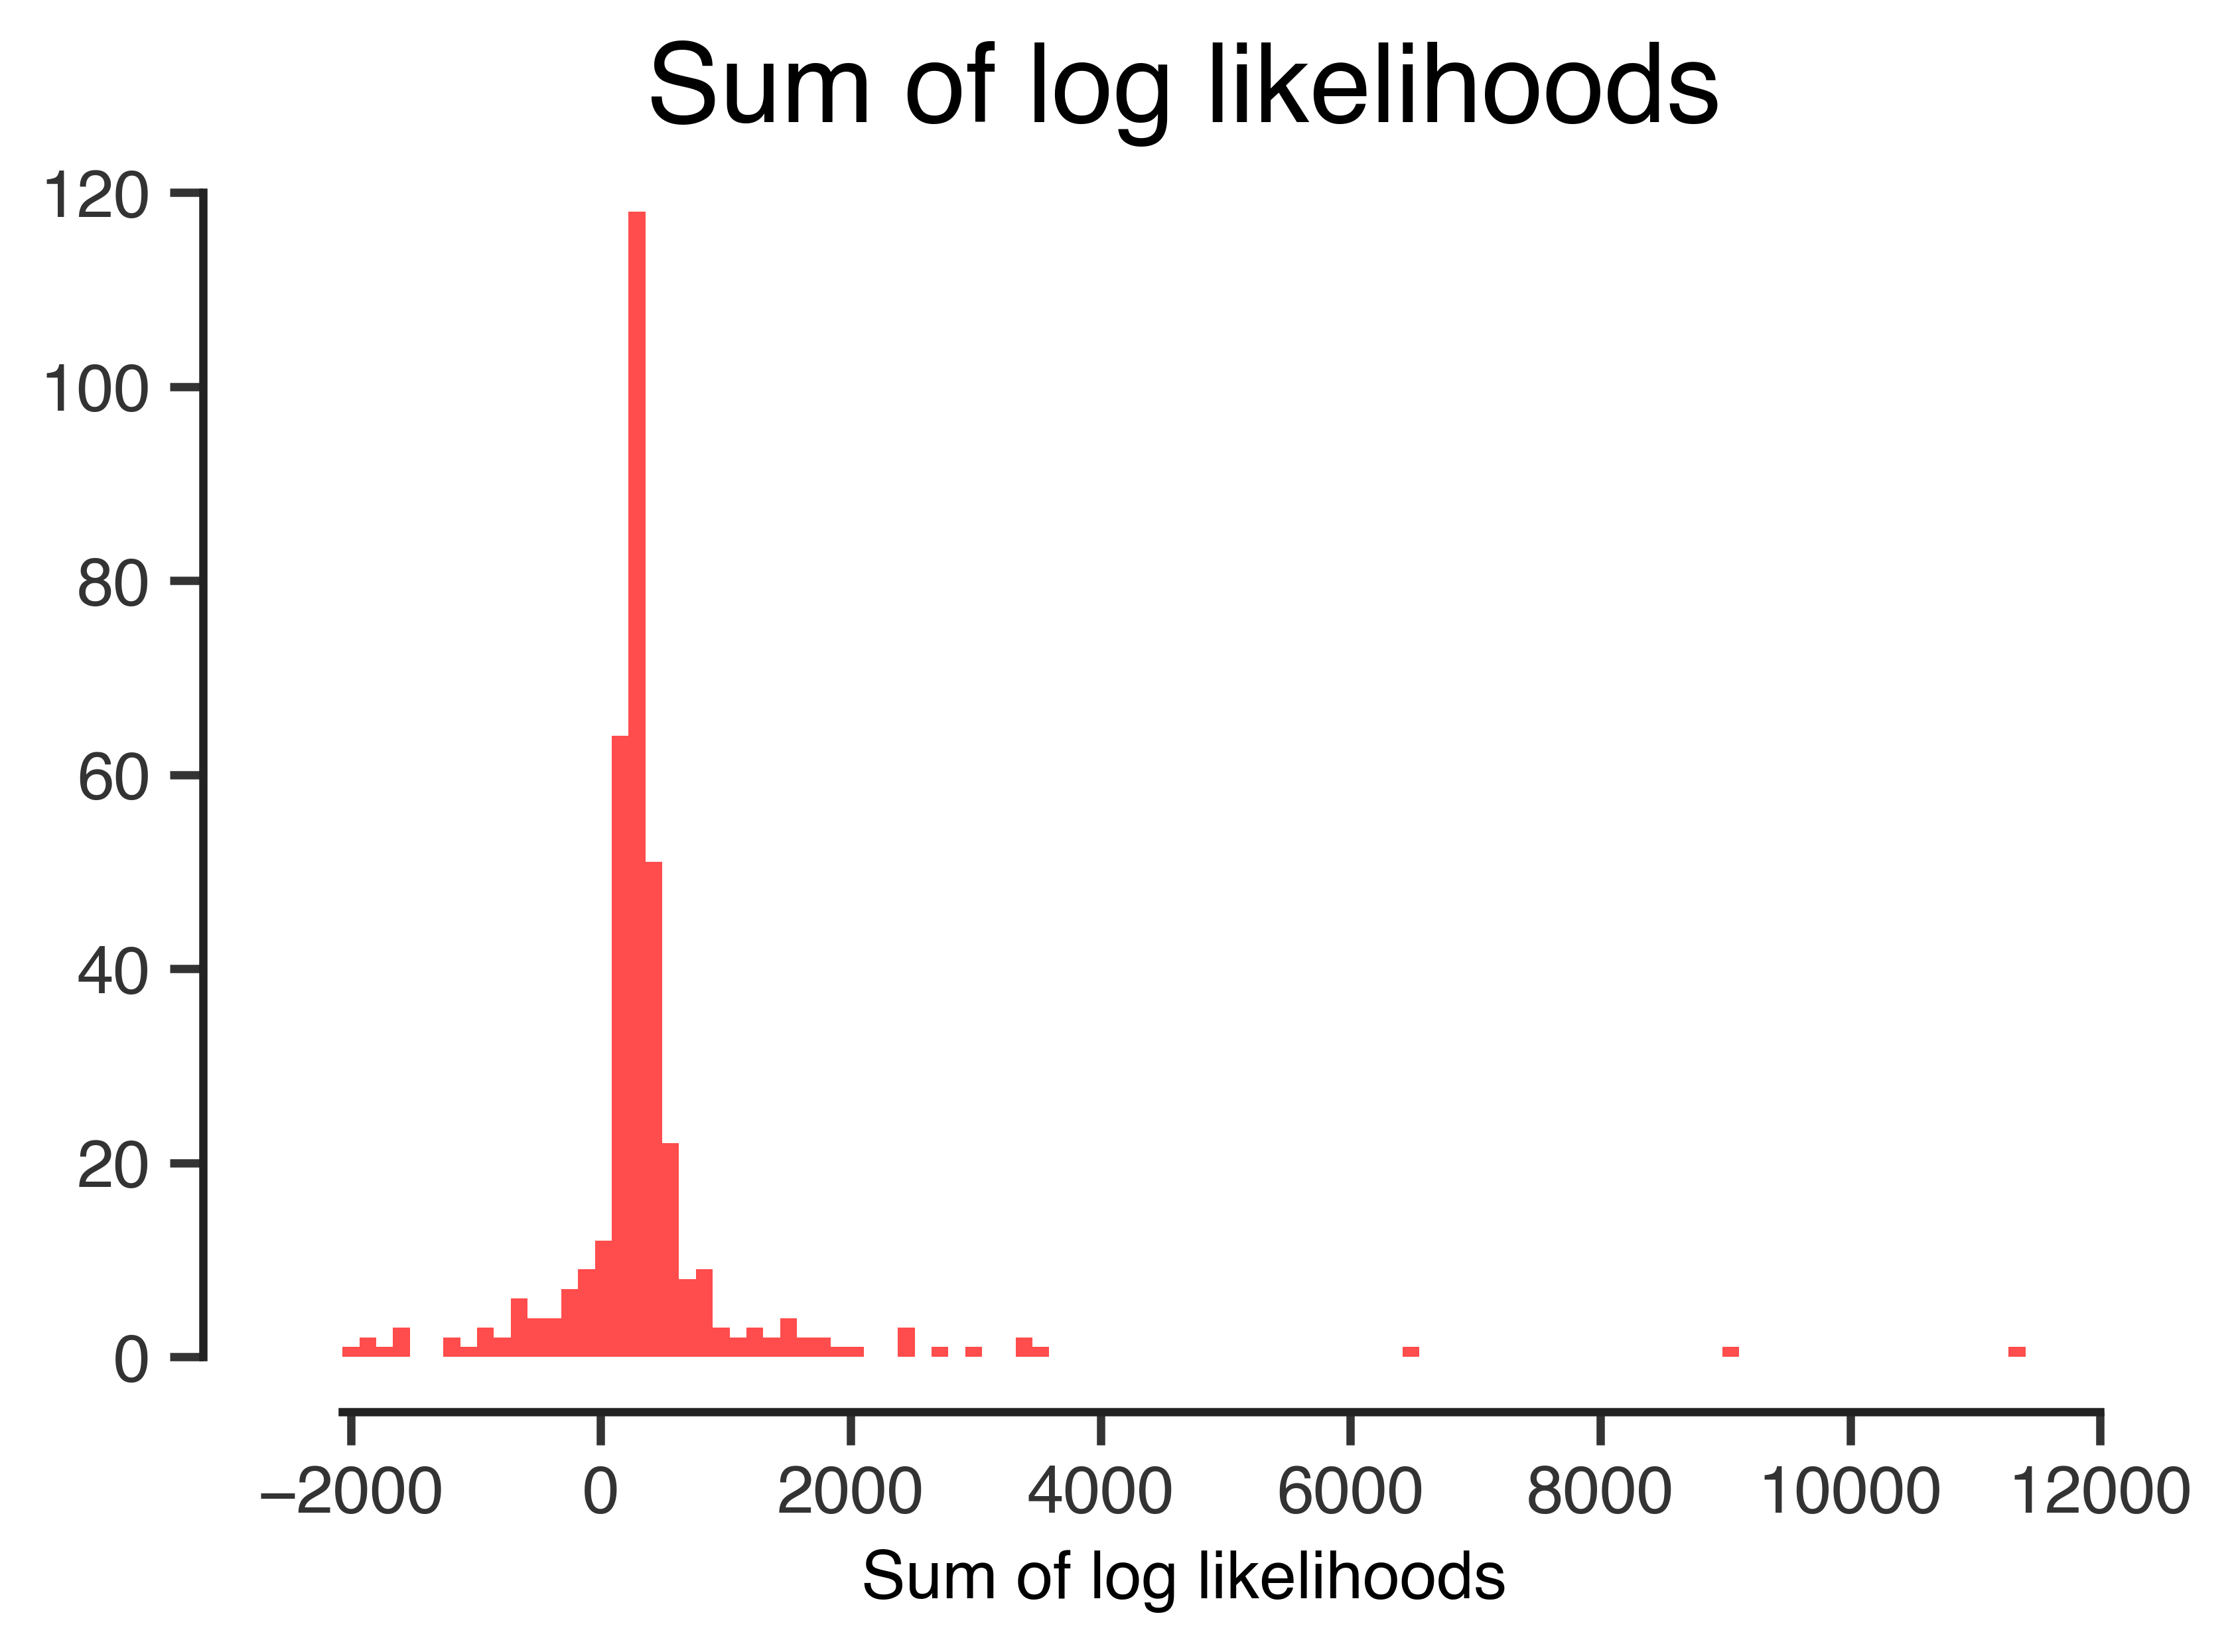

In [116]:
sum_nlls = np.array([gamma_sum_neg_ll[v] for v in variables if np.isfinite(gamma_sum_neg_ll[v])]).flatten()
sum_nlls = sum_nlls[~np.isnan(sum_nlls)]
# max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()


# bins = np.linspace(100,3000,100)
count, bins = np.histogram(sum_nlls, bins=100)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Sum of log likelihoods')
plt.xlabel('Sum of log likelihoods')

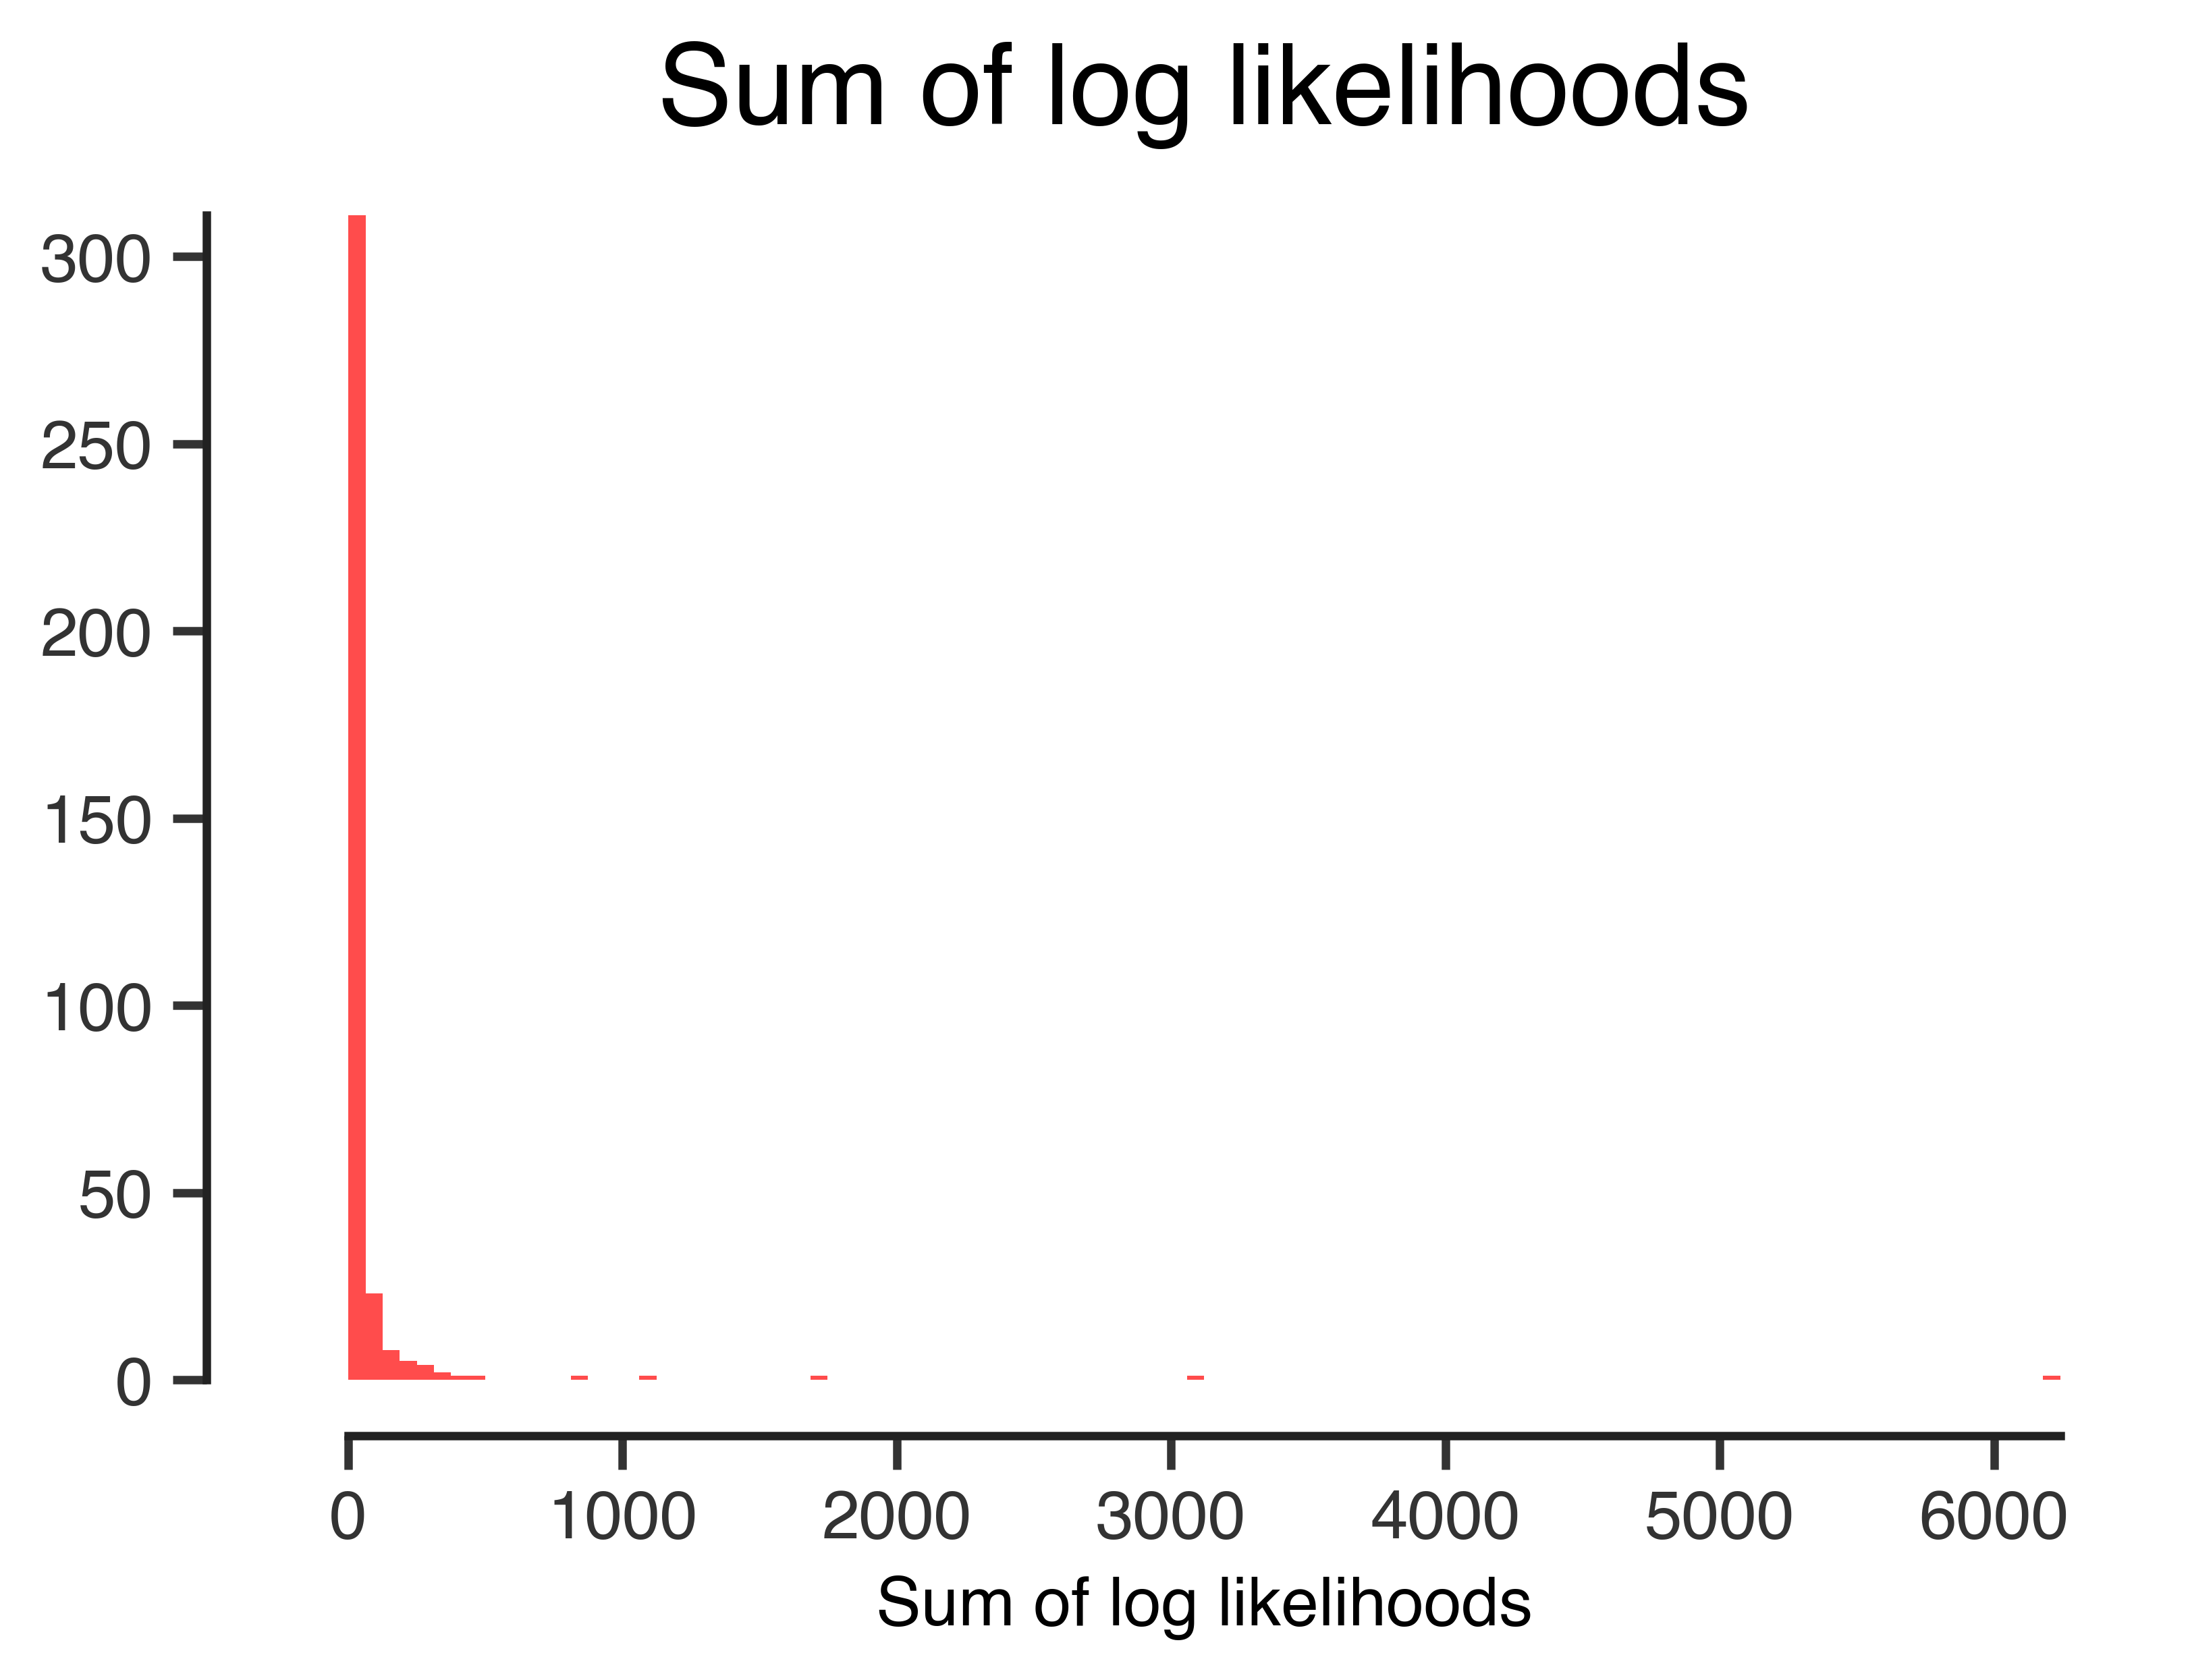

In [118]:
max_nlls = np.array([gamma_max_neg_ll[v] for v in variables if np.isfinite(gamma_max_neg_ll[v])]).flatten()
max_nlls = max_nlls[~np.isnan(max_nlls)]
# max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()


# bins = np.linspace(100,3000,100)
count, bins = np.histogram(max_nlls, bins=100)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Sum of log likelihoods')
plt.xlabel('Sum of log likelihoods')

In [119]:
least_likely_data = sorted(gamma_sum_neg_ll.items(), key=operator.itemgetter(1), reverse=True)
least_likely_data_max = sorted(gamma_max_neg_ll.items(), key=operator.itemgetter(1), reverse=True)

In [120]:
for i in range(10):
    print(least_likely_data[i])

('trimethylamine N-oxide', inf)
('1-oleoylglycerol (18:1)', inf)
('docosahexaenoate (DHA; 22:6n3)', inf)
('2-oxindole-3-acetate', inf)
('gamma-glutamylphenylalanine', inf)
('N-acetylcitrulline', inf)
('IP-10', inf)
('2-hydroxy-3-methylvalerate', inf)
('arachidonoylcarnitine (C20:4)', inf)
('2-oxoadipate', inf)


In [121]:
for i in range(10):
    print(least_likely_data_max[i])

('trimethylamine N-oxide', inf)
('1-oleoylglycerol (18:1)', inf)
('docosahexaenoate (DHA; 22:6n3)', inf)
('2-oxindole-3-acetate', inf)
('gamma-glutamylphenylalanine', inf)
('N-acetylcitrulline', inf)
('IP-10', inf)
('2-hydroxy-3-methylvalerate', inf)
('arachidonoylcarnitine (C20:4)', inf)
('2-oxoadipate', inf)


In [123]:
infinitely_unlikely = []
for variable_name, neg_ll in least_likely_data:
    if ~np.isfinite(gamma_sum_neg_ll[variable_name]):
        print(variable_name)
        infinitely_unlikely.append(variable_name)

trimethylamine N-oxide
1-oleoylglycerol (18:1)
docosahexaenoate (DHA; 22:6n3)
2-oxindole-3-acetate
gamma-glutamylphenylalanine
N-acetylcitrulline
IP-10
2-hydroxy-3-methylvalerate
arachidonoylcarnitine (C20:4)
2-oxoadipate
5-hydroxyindoleacetate
1-(1-enyl-stearoyl)-GPE (P-18:0)*
laurylcarnitine (C12)
linoleoyl-docosahexaenoyl-glycerol (18:2/22:6) [2]*
p-cresol-glucuronide*
4-allylphenol sulfate
gamma-glutamyl-alpha-lysine
IL-18
hypotaurine
formiminoglutamate
1-linoleoyl-GPE (18:2)*
alpha-tocopherol
cystine
1-stearoyl-2-arachidonoyl-GPE (18:0/20:4)
GRO-a
lactate
p-cresol sulfate
methyl glucopyranoside (alpha + beta)
3-hydroxyisobutyrate
dihomo-linolenoylcarnitine (20:3n3 or 6)*
dihydrobiopterin
1-palmitoleoyl-GPC (16:1)*
docosadienoate (22:2n6)
cysteine-glutathione disulfide
histidine
caproate (6:0)
2-linoleoylglycerol (18:2)
10-heptadecenoate (17:1n7)
arginine
decanoylcarnitine (C10)
hexanoylcarnitine (C6)
IL-22
arachidoylcarnitine (C20)*
1-methylhistamine
stearoyl sphingomyelin (d18:1/

In [124]:
len(infinitely_unlikely)

274